In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
warnings.filterwarnings("ignore")

In [3]:
# df = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\After meeting with IOCC\standby utilisation data may'24 to jan'26 with sby to dhp unutilised as well after sick rectification.csv")
# df = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\New folder\final data prepared for standby model\standby utilisation data may'24 to aug'25 with sby to dhp unutilised as well after sick rectification.csv")

df = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\After meeting with IOCC\standby to fly not dhp utilisation data.csv")
iata_mapping = pd.read_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\collective roster\international iata mapping\IATA_Codes_2025_08_20_exhaustive.csv",encoding = 'ISO-8859-1')

In [4]:
iata_mapping.tail()

city_name country_code airport_code   station_type
11434  Zanesville           US          ZZV  International
11435      Mumias           nu          MUM  International
11436      Rajkot           IN          HSR       Domestic
11437       Hosur           IN          ZZZ       Domestic
11438     Ayodhya           IN          AYJ       Domestic

In [5]:
df.tail()

STAFF NUMBER_PLANNED RANK_PLANNED HOME BASE_PLANNED Fleet_PLANNED  \
3267883            81033010.0           CP               BOM          A320   
3267884            81033010.0           CP               BOM          A320   
3267885            81033010.0           CP               BOM          A320   
3267886            81033010.0           CP               BOM          A320   
3267887            81033010.0           CP               BOM          A320   

        ACTIVITY TYPE CODE_PLANNED FLIGHT NUMBER_PLANNED  \
3267883                        FLY                AI2762   
3267884                        FLY                AI2985   
3267885                        FLY                AI2787   
3267886                        FLY                AI2884   
3267887                        FLY                AI2945   

        DEP AIRPORT CODE_PLANNED ARR AIRPORT CODE_PLANNED  \
3267883                      JAI                      DEL   
3267884                      DEL                      BOM   
3267885                      BOM                      COK   
3267886                      COK                      DEL   
3267887                      DEL                      BOM   

        ACTIVITY START DATE TIME_PLANNED ACTIVITY END DATE TIME_PLANNED  \
3267883              2026-01-04 17:05:00     2026-01-04 18:10:00.000000   
3267884              2026-01-04 19:40:00     2026-01-04 22:05:00.000000   
3267885              2026-01-06 06:35:00     2026-01-06 08:35:00.000000   
3267886              2026-01-07 06:05:00     2026-01-07 09:30:00.000000   
3267887              2026-01-07 11:00:00     2026-01-07 13:20:00.000000   

          start_date_PLANNED dep_sector_PLANNED arr_sector_PLANNED  \
3267883  2026-01-04 00:00:00           Domestic           Domestic   
3267884  2026-01-04 00:00:00           Domestic           Domestic   
3267885  2026-01-06 00:00:00           Domestic           Domestic   
3267886  2026-01-07 00:00:00           Domestic           Domestic   
3267887  2026-01-07 00:00:00           Domestic           Domestic   

        sector_PLANNED code_type_PLANNED                        duty_key  \
3267883       Domestic               FLY  81033010_2026-01-04_AI2762_FLY   
3267884       Domestic               FLY  81033010_2026-01-04_AI2985_FLY   
3267885       Domestic               FLY  81033010_2026-01-06_AI2787_FLY   
3267886       Domestic               FLY  81033010_2026-01-07_AI2884_FLY   
3267887       Domestic               FLY  81033010_2026-01-07_AI2945_FLY   

         STAFF NUMBER_FLOWN RANK_FLOWN HOME BASE_FLOWN Fleet_FLOWN  \
3267883          81033010.0         CP             BOM        A320   
3267884          81033010.0         CP             BOM        A320   
3267885          81033010.0         CP             BOM        A320   
3267886          81033010.0         CP             BOM        A320   
3267887          81033010.0         CP             BOM        A320   

        ACTIVITY TYPE CODE_FLOWN FLIGHT NUMBER_FLOWN DEP AIRPORT CODE_FLOWN  \
3267883                      FLY              AI2762                    JAI   
3267884                      FLY              AI2985                    DEL   
3267885                      FLY              AI2787                    BOM   
3267886                      FLY              AI2884                    COK   
3267887                      FLY              AI2945                    DEL   

        ARR AIRPORT CODE_FLOWN ACTIVITY START DATE TIME_FLOWN  \
3267883                    DEL     2026-01-04 17:28:00.000000   
3267884                    BOM     2026-01-04 19:38:00.000000   
3267885                    COK     2026-01-06 06:56:00.000000   
3267886                    DEL     2026-01-07 05:55:00.000000   
3267887                    BOM     2026-01-07 11:12:00.000000   

        ACTIVITY END DATE TIME_FLOWN     start_date_FLOWN dep_sector_FLOWN  \
3267883   2026-01-04 18:40:00.000000  2026-01-04 00:00:00         Domestic   
3267884   2026-01-04 22:01:00.000000  20

In [9]:
df['year_month'].unique()

array(['2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
       '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06',
       '2025-07', '2025-08', '2025-09', '2025-10', '2025-11', '2025-12',
       '2026-01', '2026-02', '2024-06', '2026-03', '2026-04', '2026-05',
       '2026-06', '2026-07'], dtype=object)

In [46]:
# df[df["DEP AIRPORT CODE_FLOWN"]=="ZZZ"]

In [8]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [10]:
sector_mapping = iata_mapping.set_index('airport_code')['station_type'].to_dict()

In [11]:
df['dep_sector_flown'] = df['DEP AIRPORT CODE_FLOWN'].apply(lambda x : sector_mapping.get( x , "Not Found"))
df['arr_sector_flown'] = df['ARR AIRPORT CODE_FLOWN'].apply(lambda x : sector_mapping.get(x , "Not Found"))  
df['dep_sector_plan'] = df['DEP AIRPORT CODE_PLANNED'].apply(lambda x : sector_mapping.get( x , "Not Found"))
df['arr_sector_plan'] = df['ARR AIRPORT CODE_PLANNED'].apply(lambda x : sector_mapping.get(x , "Not Found"))                                     

In [12]:
df['new_sector_FLOWN'] = df.apply( lambda row : "International"
                            if row['dep_sector_flown']=="International" or  row['arr_sector_flown']=='International'                            
                            else "Domestic" if row['dep_sector_flown']=="Domestic" and row['arr_sector_flown']=='Domestic'
                            else "Not Found" if row['dep_sector_flown']=="Not Found" or row['arr_sector_flown']=='Not Found'
                            else "Unassigned" , 
                            axis = 1 )

df['new_sector_PLAN'] = df.apply( lambda row : "International"
                            if row['dep_sector_plan']=="International" or  row['arr_sector_plan']=='International'                            
                            else "Domestic" if row['dep_sector_plan']=="Domestic" and row['arr_sector_plan']=='Domestic'
                            else "Not Found" if row['dep_sector_flown']=="Not Found" or row['arr_sector_flown']=='Not Found'
                            else "Unassigned" ,
                            axis = 1 )

In [13]:
# mask = (df['sector'].isna() & df['new_sector_FLOWN'].isin(['Domestic', 'International']))
# df.loc[mask, 'sector'] = df.loc[mask, 'new_sector_FLOWN']

df['sector'] = df['new_sector_FLOWN'].fillna(df['new_sector_PLAN'])

In [14]:
# mask_new = df['status'] == 'utilised (DEADHEAD)'

# df.loc[mask_new & (df['dhp_utilised'] == 'not utilised'), 'new_status'] = 'not utilised (dhp to dhp)'

In [16]:
df_copy=df.copy()

In [17]:
# df_copy = df_copy[df_copy['start_date'] <= pd.Timestamp(datetime.date(2025, 12, 31))]
# df_copy['year_month'].unique()

In [19]:
df['start_date'] = pd.to_datetime(df['start_date'])
df = df[df['start_date'] >= pd.Timestamp(datetime.date(2024, 6, 1))]

df = df[df['start_date'] <= pd.Timestamp(datetime.date(2025, 12, 31))]

In [22]:
df['Home_base'] = df['HOME BASE_PLANNED'].fillna(df['HOME BASE_FLOWN'])
df['Rank'] = df['RANK_PLANNED'].fillna(df['RANK_FLOWN'])
utilised_combined = df[df["new_status"]=="utilised (combined)"]

In [23]:
df['year_month'].unique()

array(['2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
       '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06',
       '2025-07', '2025-08', '2025-09', '2025-10', '2025-11', '2025-12',
       '2024-06'], dtype=object)

In [ ]:
# df[df['year_month']=='2025-07'].to_csv(r"C:\Users\AshishPandey\Downloads\to check with cm team july 25.csv",index=False)

## Feature Generation

In [24]:
import pandas as pd
import numpy as np
import holidays

# --- Step 1: Date & Initial Prep ---
df['start_date'] = pd.to_datetime(df['start_date'])
df.dropna(subset=['start_date'], inplace=True)
df['date'] = df['start_date'].dt.normalize()

# --- Step 2: Define Grouping Keys ---
# group_cols = ['date', 'Home_base', 'Fleet']
group_cols = ['date', 'Home_base', 'Fleet', 'Rank','sector']
planned_standby = df[df['code_type_PLANNED'] == 'STANDBY']
standby_counts = planned_standby.groupby(group_cols).size().reset_index(name='planned_standby')

# Planned Fly
# group_cols_PLAN = ['date', 'Home_base', 'Fleet', 'Rank','sector_PLAN']
planned_fly = df[df['code_type_PLANNED'] == 'FLY']
fly_counts = planned_fly.groupby(group_cols).size().reset_index(name='planned_fly')

# Actual Standby Used: STANDBY in code_type_x → FLY or DEADHEAD AND TRAVEL in code_type_y
actual_used = df[df['new_status'].isin(['sby to fly and dhd', 'utilised (combined)'])]
actual_used_counts = actual_used.groupby(group_cols).size().reset_index(name='actual_standby_used')

# --- Step 4: Merge and Fill ---
df_final = pd.merge(standby_counts, fly_counts, how='outer', on=group_cols).fillna(0)
df_final = pd.merge(df_final, actual_used_counts, how='outer', on=group_cols).fillna(0)


df_final['day_of_week'] = pd.to_datetime(df_final['date']).dt.dayofweek+1
df_final['weekofyear'] = pd.to_datetime(df_final['date']).dt.isocalendar().week
df_final['month'] = pd.to_datetime(df_final['date']).dt.month
df_final['is_weekend'] = df_final['day_of_week'].isin([6, 7]).astype(int)

# Use 'holidays' package to identify holidays in India
years = pd.to_datetime(df_final['date']).dt.year.unique()
india_holidays = holidays.India(years=years)
df_final['is_holiday'] = df_final['date'].isin(india_holidays).astype(int)


# Prevent divide-by-zero
df_final['planned_standby'] = df_final['planned_standby'].replace(0, np.nan)
df_final['standby_utilization'] = df_final['actual_standby_used'] / df_final['planned_standby']
df_final['standby_utilization'] = df_final['standby_utilization'].fillna(0)
df_final['planned_standby'] = df_final['planned_standby'].fillna(0)
df_final['standby_utilization_per_fly'] = df_final['actual_standby_used'] / df_final['planned_fly']
# df_final['standby_utilization_per_fly'] = df_final['standby_utilization_per_fly'].fillna(0)
df_final['standby_utilization_per_fly'] = df_final['standby_utilization_per_fly'].replace([np.inf, -np.inf], np.nan).fillna(0)
df_final['day_sin'] = np.sin(2 * np.pi * df_final['date'].dt.dayofyear / 365)
df_final['day_cos'] = np.cos(2 * np.pi * df_final['date'].dt.dayofyear / 365)

# --- Step 7: Lag & Rolling Features ---
df_final.sort_values(['Home_base', 'Fleet', 'Rank', 'date','sector'], inplace=True)
grouped = df_final.groupby(['Home_base', 'Fleet', 'Rank','sector'])
# df_final.sort_values(['Home_base', 'Fleet', 'date'], inplace=True)
# grouped = df_final.groupby(['Home_base', 'Fleet'])

df_final['monthly_avg_util'] = grouped['standby_utilization_per_fly'].transform(lambda x: x.rolling(window=30, min_periods=5).mean())
df_final['expanding_mean_util'] = grouped['standby_utilization_per_fly'].transform(lambda x: x.expanding(min_periods=5).mean())
df_final['expanding_std_util'] = grouped['standby_utilization_per_fly'].transform(lambda x: x.expanding(min_periods=5).std())
df_final['biweekly_std_util'] = grouped['standby_utilization_per_fly'].transform(lambda x: x.rolling(window=14, min_periods=5).std())

df_final['lag_util_1d'] = grouped['standby_utilization'].shift(1)
df_final['lag_util_3d'] = grouped['standby_utilization'].shift(3)
df_final['lag_util_7d'] = grouped['standby_utilization'].shift(7)
df_final['rolling_util_7d'] = grouped['standby_utilization'].transform(lambda x: x.rolling(7).mean())
df_final['rolling_std_7d'] = grouped['standby_utilization'].transform(lambda x: x.rolling(7).std())
df_final['rolling_util_3d'] = grouped['standby_utilization'].transform(lambda x: x.rolling(3).mean())
df_final['rolling_std_3d'] = grouped['standby_utilization'].transform(lambda x: x.rolling(3).std())

df_final['day_of_month'] = df_final['date'].dt.day

# Compute average standby utilization per fly for each day of the month across all months
avg_by_day_of_month = df_final.groupby('day_of_month')['standby_utilization_per_fly'].mean().rename('avg_util_by_day_of_month')

# Map this average back to the original dataframe
df_final['avg_util_by_day_of_month'] = df_final['day_of_month'].map(avg_by_day_of_month)


# Rename for output consistency #'date', 'Home_base', 'Fleet', 'Rank'
df_final.rename(columns={
    'Home_base': 'base',
    'Fleet': 'fleet',
    'Rank': 'rank'
}, inplace=True)


final_cols = [
    'date', 'base', 'fleet', 'rank', 'sector',
    'is_holiday', 'day_of_week', 'weekofyear', 'month', 'is_weekend',
    'planned_fly', 'planned_standby', 'actual_standby_used',
    'standby_utilization', 'standby_utilization_per_fly',
    'lag_util_1d', 'lag_util_3d', 'lag_util_7d',
    'rolling_util_3d', 'rolling_std_3d',
    'rolling_util_7d', 'rolling_std_7d',
    'expanding_mean_util', 'expanding_std_util',
    'monthly_avg_util', 'biweekly_std_util',
    'day_sin', 'day_cos','avg_util_by_day_of_month'
]

df_final = df_final[final_cols]

# --- Step 6.1: Add Base Load Factor ---
# Calculate total STANDBY per base (across all dates)
base_totals = df_final.groupby('base')['planned_standby'].sum().reset_index(name='base_total_standby')

# Calculate overall total STANDBY
overall_total = base_totals['base_total_standby'].sum()

# Calculate base load factor
base_totals['base_load_factor'] = base_totals['base_total_standby'] / overall_total

# Merge back to main dataframe
df_final = df_final.merge(base_totals[['base', 'base_load_factor']], on='base', how='left')


In [25]:
df_final = df_final[df_final['sector'].isin(['International','Domestic'])]

In [26]:
df_final[np.isinf(df_final['standby_utilization_per_fly'])]

Empty DataFrame
Columns: [date, base, fleet, rank, sector, is_holiday, day_of_week, weekofyear, month, is_weekend, planned_fly, planned_standby, actual_standby_used, standby_utilization, standby_utilization_per_fly, lag_util_1d, lag_util_3d, lag_util_7d, rolling_util_3d, rolling_std_3d, rolling_util_7d, rolling_std_7d, expanding_mean_util, expanding_std_util, monthly_avg_util, biweekly_std_util, day_sin, day_cos, avg_util_by_day_of_month, base_load_factor]
Index: []

In [27]:
# df_final['avg_util_by_day_of_month'].unique()
df_final.head()

date base fleet rank         sector  is_holiday  day_of_week  \
43619 2025-01-13  TRV  A350   CP  International           0            1   
43620 2025-01-20  TRV  A350   CP       Domestic           0            1   
43621 2025-01-21  TRV  A350   CP  International           0            2   
43622 2025-01-22  TRV  A350   CP  International           0            3   
43623 2025-01-31  TRV  A350   CP  International           0            5   

       weekofyear  month  is_weekend  planned_fly  planned_standby  \
43619           3      1           0          1.0              0.0   
43620           4      1           0          0.0              1.0   
43621           4      1           0          1.0              0.0   
43622           4      1           0          1.0              0.0   
43623           5      1           0          1.0              0.0   

       actual_standby_used  standby_utilization  standby_utilization_per_fly  \
43619                  0.0                  0.0                          0.0   
43620                  0.0                  0.0                          0.0   
43621                  0.0                  0.0                          0.0   
43622                  0.0                  0.0                          0.0   
43623                  0.0                  0.0                          0.0   

       lag_util_1d  lag_util_3d  lag_util_7d  rolling_util_3d  rolling_std_3d  \
43619          0.0          0.0          0.0              0.0             0.0   
43620          0.0          0.0          0.0              0.0             0.0   
43621          0.0          0.0          0.0              0.0             0.0   
43622          0.0          0.0          0.0              0.0             0.0   
43623          0.0          0.0          0.0              0.0             0.0   

       rolling_util_7d  rolling_std_7d  expanding_mean_util  \
43619              0.0             0.0                  0.0   
43620              0.0             0.0                  0.0   
43621              0.0             0.0                  0.0   
43622              0.0             0.0                  0.0   
43623              0.0             0.0                  0.0   

       expanding_std_util  monthly_avg_util  biweekly_std_util   day_sin  \
43619                 0.0               0.0                0.0  0.221922   
43620                 0.0               0.0                0.0  0.337523   
43621                 0.0               0.0                0.0  0.353676   
43622                 0.0               0.0                0.0  0.369725   
43623                 0.0               0.0                0.0  0.508671   

        day_cos  avg_util_by_day_of_month  base_load_factor  
43619  0.975065                  0.065495          0.000172  
43620  0.941317                  0.061458          0.000172  
43621  0.935368                  0.070573          0.000172  
43622  0.929141                  0.069234          0.000172  
43623  0.860961                  0.095228          0.000172

In [29]:
df_final['date'].dt.to_period('M').unique()

<PeriodArray>
['2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
 '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06', '2025-07',
 '2025-08', '2025-09', '2025-10', '2025-11', '2025-12']
Length: 19, dtype: period[M]

## ARIMA Model

In [125]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

# # --- Approach 1: Manual d from ADF with fixed p,q ---

# def compute_features_sarima(df):
#     df = df.copy()
#     df = df.sort_values('date')
#     df['standby_utilization_per_fly'] = df['standby_utilization_per_fly'].fillna(method='ffill').fillna(0)
#     return df

# def adf_test(series, max_diff=3, significance_level=0.05):
#     d = 0
#     test_series = series.copy()
#     while d <= max_diff:
#         adf_result = adfuller(test_series, autolag='AIC')
#         pvalue = adf_result[1]
#         used_lag = adf_result[2]
#         print(f'[ADF] Differencing order {d}, p-value={pvalue:.4f}, lag length={used_lag}')
#         if pvalue < significance_level:
#             return d
#         else:
#             test_series = test_series.diff().dropna()
#             d += 1
#     return max_diff

# # Fixed SARIMA params except d which will be determined by ADF
# sarima_order_base = (1, 0, 1)
# seasonal_order = (1, 2, 2, 30)

# def generate_forecast_compare_adf(df_final):
#     ml_df = df_final[df_final['base'].isin(['BOM', 'DEL'])].copy()
#     ml_df = ml_df.dropna(subset=['standby_utilization_per_fly'])
#     ml_df = ml_df.sort_values('date')

#     forecasts_all = []
#     group_keys = ['fleet', 'rank', 'sector']
#     grouped = ml_df.groupby(group_keys)

#     for (fleet, rank, sector), group_data in tqdm(grouped, desc='Manual ADF differencing'):
#         for base in ['DEL', 'BOM']:
#             base_group = group_data[group_data['base'] == base].copy()
#             base_group = base_group.dropna(subset=['standby_utilization_per_fly']).sort_values('date')
#             if len(base_group) < 50:
#                 continue

#             sarima_data = compute_features_sarima(base_group)
#             series = sarima_data.set_index('date')['standby_utilization_per_fly']

#             d = adf_test(series)
#             sarima_order = (sarima_order_base[0], d, sarima_order_base[2])

#             start_forecast_date = series.index[-30]
#             end_date = series.index[-1]
#             forecast_length = (end_date - start_forecast_date).days + 1

#             try:
#                 model = SARIMAX(series[:start_forecast_date], order=sarima_order, seasonal_order=seasonal_order,
#                                 enforce_stationarity=False, enforce_invertibility=False)
#                 sarima_fit = model.fit(disp=False)

#                 forecast = sarima_fit.get_forecast(steps=forecast_length)
#                 forecast_index = pd.date_range(start_forecast_date, periods=forecast_length)
#                 forecast_vals = forecast.predicted_mean.values

#                 forecast_df = pd.DataFrame({
#                     'date': forecast_index,
#                     'forecasted_utilization': forecast_vals,
#                     'base': base,
#                     'fleet': fleet,
#                     'rank': rank,
#                     'sector': sector,
#                     'model': 'SARIMA_ADF'
#                 })

#                 actual_df = sarima_data[(sarima_data['date'] >= start_forecast_date) & (sarima_data['date'] <= end_date)][['date', 'standby_utilization_per_fly']]
#                 actual_df = actual_df.rename(columns={'standby_utilization_per_fly': 'actual_utilization'})

#                 merged_df = pd.merge(forecast_df, actual_df, on='date', how='inner')
#                 forecasts_all.append(merged_df)

#             except Exception as e:
#                 print(f"Error fitting SARIMA_ADF for {fleet}-{rank}-{sector}-{base}: {str(e)}")
#                 continue

#     if forecasts_all:
#         return pd.concat(forecasts_all, ignore_index=True)
#     else:
#         return pd.DataFrame()

# --- Approach 2: Auto-ARIMA for full (p,d,q) and seasonal order selection ---

def find_optimal_sarima_order(series, seasonal=True, m=30):
    model = pm.auto_arima(series, start_p=0, start_q=0,
                          max_p=5, max_q=5,
                          start_P=0, start_Q=0,
                          max_P=2, max_Q=2,
                          d=None, D=None,
                          seasonal=seasonal,
                          m=m,
                          information_criterion='aic',
                          stepwise=True,
                          suppress_warnings=True,
                          error_action='ignore')
    print(f'[Auto-ARIMA] Selected order: {model.order}, seasonal_order: {model.seasonal_order}')
    return model.order, model.seasonal_order

def generate_forecast_compare_autoarima(df_final):
    ml_df = df_final[df_final['base'].isin(['BOM', 'DEL'])].copy()
    ml_df = ml_df.dropna(subset=['standby_utilization_per_fly'])
    ml_df = ml_df.sort_values('date')

    forecasts_all = []
    group_keys = ['fleet', 'rank', 'sector']
    grouped = ml_df.groupby(group_keys)

    for (fleet, rank, sector), group_data in tqdm(grouped, desc='Auto-ARIMA'):
        for base in ['DEL', 'BOM']:
            base_group = group_data[group_data['base'] == base].copy()
            base_group = base_group.dropna(subset=['standby_utilization_per_fly']).sort_values('date')
            if len(base_group) < 50:
                continue

            sarima_data = compute_features_sarima(base_group)
            series = sarima_data.set_index('date')['standby_utilization_per_fly']

            start_forecast_date = series.index[-30]
            end_date = series.index[-1]
            forecast_length = (end_date - start_forecast_date).days + 1

            try:
                order, seasonal_order = find_optimal_sarima_order(series[:start_forecast_date])

                model = SARIMAX(series[:start_forecast_date], order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                sarima_fit = model.fit(disp=False)

                forecast = sarima_fit.get_forecast(steps=forecast_length)
                forecast_index = pd.date_range(start_forecast_date, periods=forecast_length)
                forecast_vals = forecast.predicted_mean.values

                forecast_df = pd.DataFrame({
                    'date': forecast_index,
                    'forecasted_utilization': forecast_vals,
                    'base': base,
                    'fleet': fleet,
                    'rank': rank,
                    'sector': sector,
                    'model': 'SARIMA_AUTO'
                })

                actual_df = sarima_data[(sarima_data['date'] >= start_forecast_date) & (sarima_data['date'] <= end_date)][['date', 'standby_utilization_per_fly']]
                actual_df = actual_df.rename(columns={'standby_utilization_per_fly': 'actual_utilization'})

                merged_df = pd.merge(forecast_df, actual_df, on='date', how='inner')
                forecasts_all.append(merged_df)

            except Exception as e:
                print(f"Error fitting SARIMA_AUTO for {fleet}-{rank}-{sector}-{base}: {str(e)}")
                continue

    if forecasts_all:
        return pd.concat(forecasts_all, ignore_index=True)
    else:
        return pd.DataFrame()

# --- Usage example ---

# Load your DataFrame as df_final, then call either:

# For manual differencing d:
# comparison_df_adf = generate_forecast_compare_adf(df_final)

# For automated full SARIMA order selection:
comparison_df_auto = generate_forecast_compare_autoarima(df_final)


ModuleNotFoundError: No module named 'pmdarima'

## Integrated sarima model using rolling forecasts and features 

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")

def compute_features_sarima(df):
    df = df.copy()
    df = df.sort_values('date')
    df['standby_utilization_per_fly'] = df['standby_utilization_per_fly'].fillna(method='ffill').fillna(0)
    return df

def adf_test(series, max_diff=3, significance_level=0.05):
    d = 0
    test_series = series.copy()
    while d <= max_diff:
        adf_result = adfuller(test_series, autolag='AIC')
        pvalue = adf_result[1]
        if pvalue < significance_level:
            return d
        else:
            test_series = test_series.diff().dropna()
            d += 1
    return max_diff

def sarima_grid_search(series, seasonal_period=30, max_order=2):
    best_score = float('inf')
    best_params = None

    p = d = q = range(0, max_order + 1)
    P = D = Q = range(0, max_order + 1)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(P, D, Q))

    train = series[:-30]
    test = series[-30:]

    for order in pdq:
        for seasonal_order in seasonal_pdq:
            try:
                model = SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order + (seasonal_period,),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                results = model.fit(disp=False)
                forecast = results.get_forecast(steps=len(test)).predicted_mean
                error = mean_squared_error(test, forecast)

                if error < best_score:
                    best_score = error
                    best_params = (order, seasonal_order)

            except Exception:
                continue

    return best_params

def generate_rolling_forecast(df_final, forecast_horizon=30, min_train_size=60, step_size=15):
    ml_df = df_final[df_final['base'].isin(['BOM', 'DEL'])].copy()
    ml_df = ml_df.dropna(subset=['standby_utilization_per_fly'])
    ml_df = ml_df.sort_values('date')

    forecasts_all = []
    group_keys = ['fleet', 'rank', 'sector']
    grouped = ml_df.groupby(group_keys)

    for (fleet, rank, sector), group_data in tqdm(grouped):
        print(f"\nRolling Forecast: Fleet={fleet}, Rank={rank}, Sector={sector}")
        for base in ['DEL', 'BOM']:
            base_group = group_data[group_data['base'] == base].copy()
            base_group = base_group.dropna(subset=['standby_utilization_per_fly']).sort_values('date')
            if len(base_group) < min_train_size + forecast_horizon:
                continue

            sarima_data = compute_features_sarima(base_group)
            series = sarima_data.set_index('date')['standby_utilization_per_fly']

            if series.isna().any() or np.isinf(series).any():
                series = series.fillna(0)
                series[series == np.inf] = 0
                series[series == -np.inf] = 0

            # train_series = series[:start]
            # d = adf_test(train_series)

            for start in range(min_train_size, len(series) - forecast_horizon, step_size):
                train_series = series[:start]
                test_series = series[start:start + forecast_horizon]
            
                # Run ADF test only on training data
                d = adf_test(train_series)
            
                best_order, best_seasonal_order = sarima_grid_search(train_series, seasonal_period=30, max_order=2)
                print(f"Best SARIMA for {fleet}-{rank}-{sector}-{base} at index {start}: {best_order}, Seasonal: {best_seasonal_order}")

                try:
                    model = SARIMAX(train_series,
                                    order=best_order,
                                    seasonal_order=best_seasonal_order + (30,),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
                    sarima_fit = model.fit(disp=False)

                    forecast = sarima_fit.get_forecast(steps=forecast_horizon)
                    forecast_index = test_series.index
                    forecast_vals = forecast.predicted_mean.values

                    forecast_df = pd.DataFrame({
                        'date': forecast_index,
                        'forecasted_utilization': forecast_vals,
                        'actual_utilization': test_series.values,
                        'base': base,
                        'fleet': fleet,
                        'rank': rank,
                        'sector': sector,
                        'model': 'SARIMA'
                    })

                    forecasts_all.append(forecast_df)

                except Exception as e:
                    print(f"Error at rolling index {start} for {fleet}-{rank}-{sector}-{base}: {str(e)}")
                    continue

    if forecasts_all:
        return pd.concat(forecasts_all, ignore_index=True)
    else:
        return pd.DataFrame()

In [39]:
comparison_df = generate_rolling_forecast(df_final)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]


Rolling Forecast: Fleet=A320, Rank=CP, Sector=Domestic


  0%|                                                                                           | 0/16 [04:30<?, ?it/s]


KeyboardInterrupt: 

## SARIMA model

In [35]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")


def compute_features_sarima(df):
    df = df.copy()
    df = df.sort_values('date')
    df['standby_utilization_per_fly'] = df['standby_utilization_per_fly'].fillna(method='ffill').fillna(0)
    return df



def adf_test(series, max_diff=3, significance_level=0.05):
    d = 0
    test_series = series.copy()
    while d <= max_diff:
        adf_result = adfuller(test_series, autolag='AIC')
        pvalue = adf_result[1]
        used_lag = adf_result[2]  # This is the lag length used
        print(f'Differencing order {d}, ADF test used lag length: {used_lag}')
        if pvalue < significance_level:
            return d
        else:
            test_series = test_series.diff().dropna()
            d += 1
    return max_diff

# Fixed parameters for SARIMA except d which is decided dynamically
sarima_order_base = (1, 0, 1)
seasonal_order = (2, 1, 1, 30)


def generate_forecast_compare(df_final):
    ml_df = df_final[df_final['base'].isin(['BOM', 'DEL'])].copy()
    ml_df = ml_df.dropna(subset=['standby_utilization_per_fly'])
    ml_df = ml_df.sort_values('date')

    forecasts_all = []
    group_keys = ['fleet', 'rank', 'sector']
    grouped = ml_df.groupby(group_keys)

    # for (fleet, rank, sector), group_data in tqdm(grouped):
    for (fleet, rank, sector), group_data in tqdm(grouped):
        print("\n")
        print(f"{fleet},{rank},{sector}")
        for base in ['DEL', 'BOM']:
            base_group = group_data[group_data['base'] == base].copy()
            base_group = base_group.dropna(subset=['standby_utilization_per_fly']).sort_values('date')
            if len(base_group) < 50:
                continue

            sarima_data = compute_features_sarima(base_group)
            series = sarima_data.set_index('date')['standby_utilization_per_fly']
            # print(series.tail())
            print("Checking if group has nan or inf value")
            print(series.isna().any() or np.isinf(series).any())

            if series.isna().any() or np.isinf(series).any():
                series = series.fillna(0)
                series[series == np.inf] = 0
                series[series == -np.inf] = 0
                print("After converting nan values")
                print(series.isna().any() or np.isinf(series).any())


            # Determine differencing order d dynamically from ADF test
            train_series = series[:-30]
            d = adf_test(train_series)
            # Define SARIMA order with dynamic d
            sarima_order = (sarima_order_base[0], d, sarima_order_base[2])

            start_forecast_date = series.index[-30]
            end_date = series.index[-1]
            forecast_length = (end_date - start_forecast_date).days + 1

            try:
                # Fit SARIMA with dynamic differencing order
                model = SARIMAX(series[:start_forecast_date], order=sarima_order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                sarima_fit = model.fit(disp=False)

                forecast = sarima_fit.get_forecast(steps=forecast_length)
                forecast_index = pd.date_range(start_forecast_date, periods=forecast_length)
                forecast_vals = forecast.predicted_mean.values

                forecast_df = pd.DataFrame({
                    'date': forecast_index,
                    'forecasted_utilization': forecast_vals,
                    'base': base,
                    'fleet': fleet,
                    'rank': rank,
                    'sector': sector,
                    'model': 'SARIMA'
                })

                actual_df = sarima_data[(sarima_data['date'] >= start_forecast_date) & (sarima_data['date'] <= end_date)][['date', 'standby_utilization_per_fly']]
                actual_df = actual_df.rename(columns={'standby_utilization_per_fly': 'actual_utilization'})

                merged_df = pd.merge(forecast_df, actual_df, on='date', how='inner')
                forecasts_all.append(merged_df)

            except Exception as e:
                print(f"Error fitting SARIMA for {fleet}-{rank}-{sector}-{base}: {str(e)}")
                continue

    if forecasts_all:
        return pd.concat(forecasts_all, ignore_index=True)
    else:
        return pd.DataFrame()


# Usage example:
comparison_df = generate_forecast_compare(df_final)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]



A320,CP,Domestic
Checking if group has nan or inf value
False
Differencing order 0, ADF test used lag length: 8


  0%|                                                                                           | 0/16 [00:11<?, ?it/s]


KeyboardInterrupt: 

In [32]:
comparison_df

date  forecasted_utilization base fleet rank         sector   model  \
0   2025-08-02                0.033189  DEL  A320   CP       Domestic  SARIMA   
1   2025-08-03                0.039923  DEL  A320   CP       Domestic  SARIMA   
2   2025-08-04                0.036742  DEL  A320   CP       Domestic  SARIMA   
3   2025-08-05                0.028007  DEL  A320   CP       Domestic  SARIMA   
4   2025-08-06                0.032305  DEL  A320   CP       Domestic  SARIMA   
..         ...                     ...  ...   ...  ...            ...     ...   
955 2025-08-27                0.180699  BOM  B787   FO  International  SARIMA   
956 2025-08-28                0.240352  BOM  B787   FO  International  SARIMA   
957 2025-08-29                0.197599  BOM  B787   FO  International  SARIMA   
958 2025-08-30                0.212605  BOM  B787   FO  International  SARIMA   
959 2025-08-31                0.181492  BOM  B787   FO  International  SARIMA   

     actual_utilization  
0              0.028053  
1              0.046713  
2              0.027586  
3              0.039855  
4              0.048263  
..                  ...  
955            0.400000  
956            0.200000  
957            0.000000  
958            0.071429  
959            0.000000  

[960 rows x 8 columns]

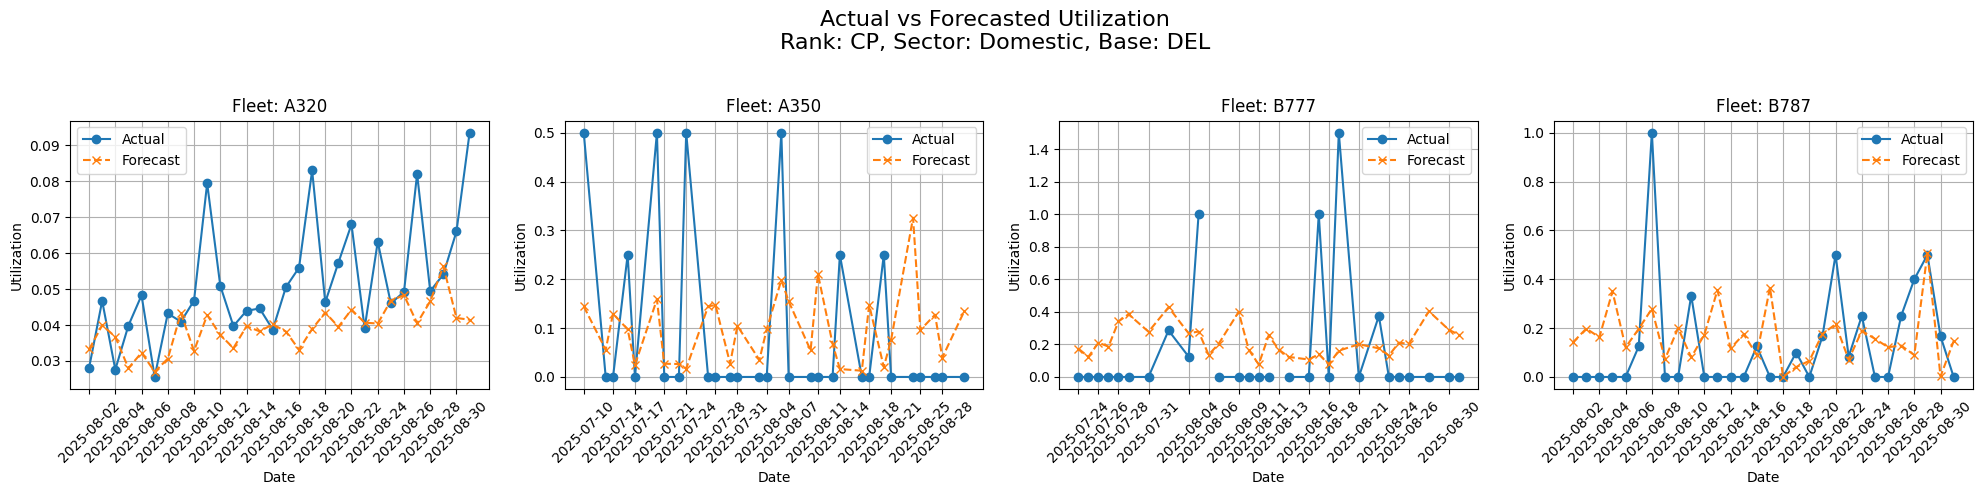

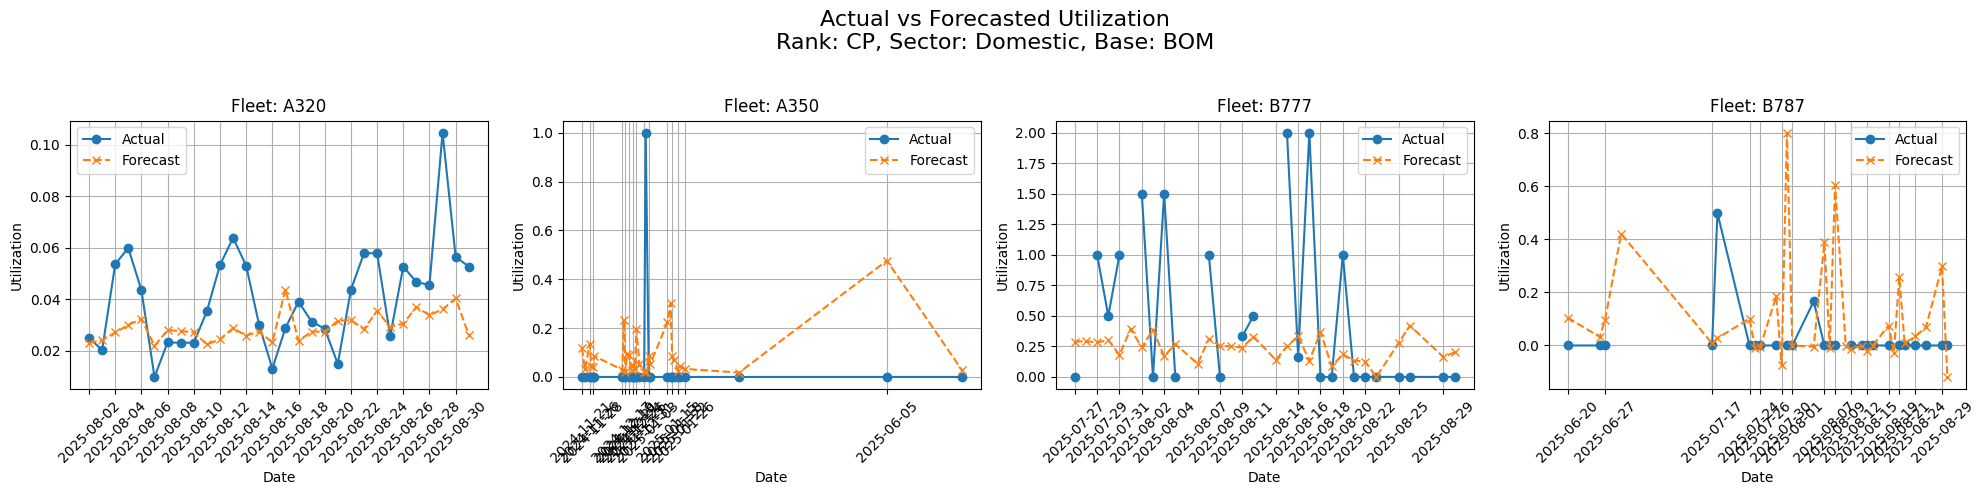

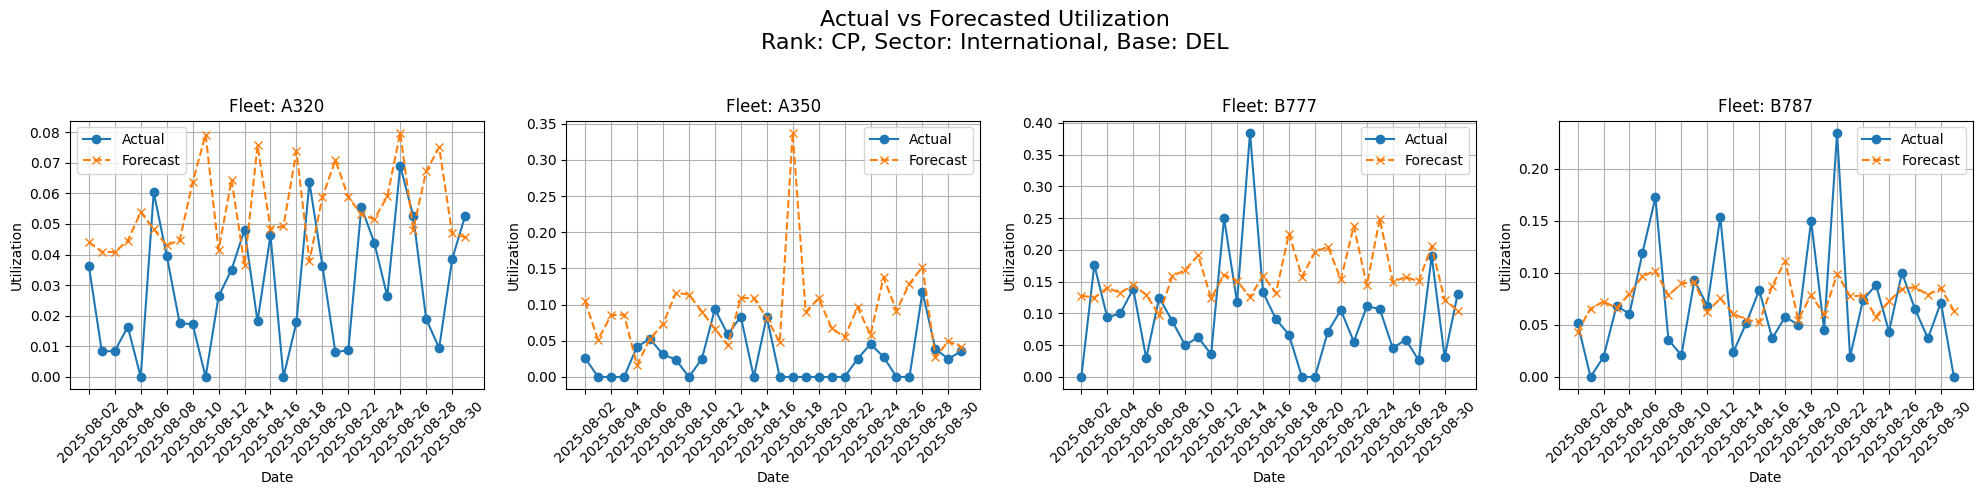

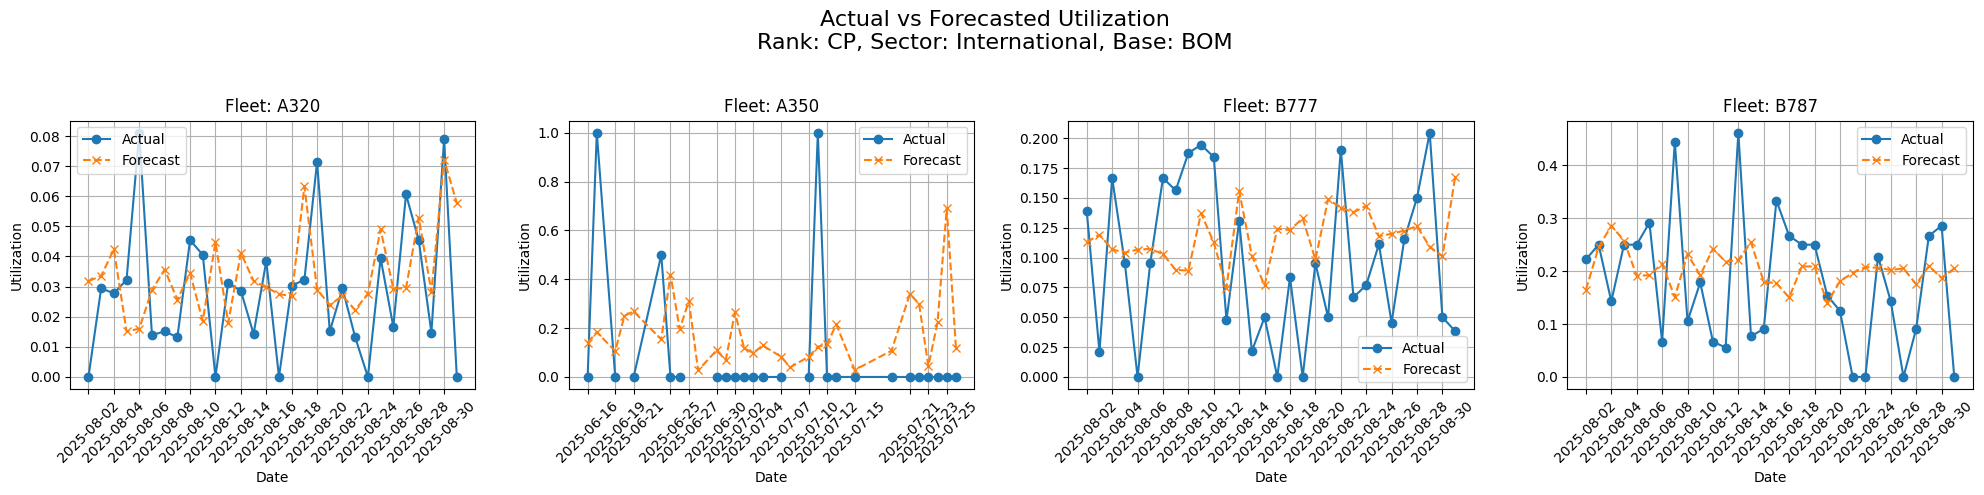

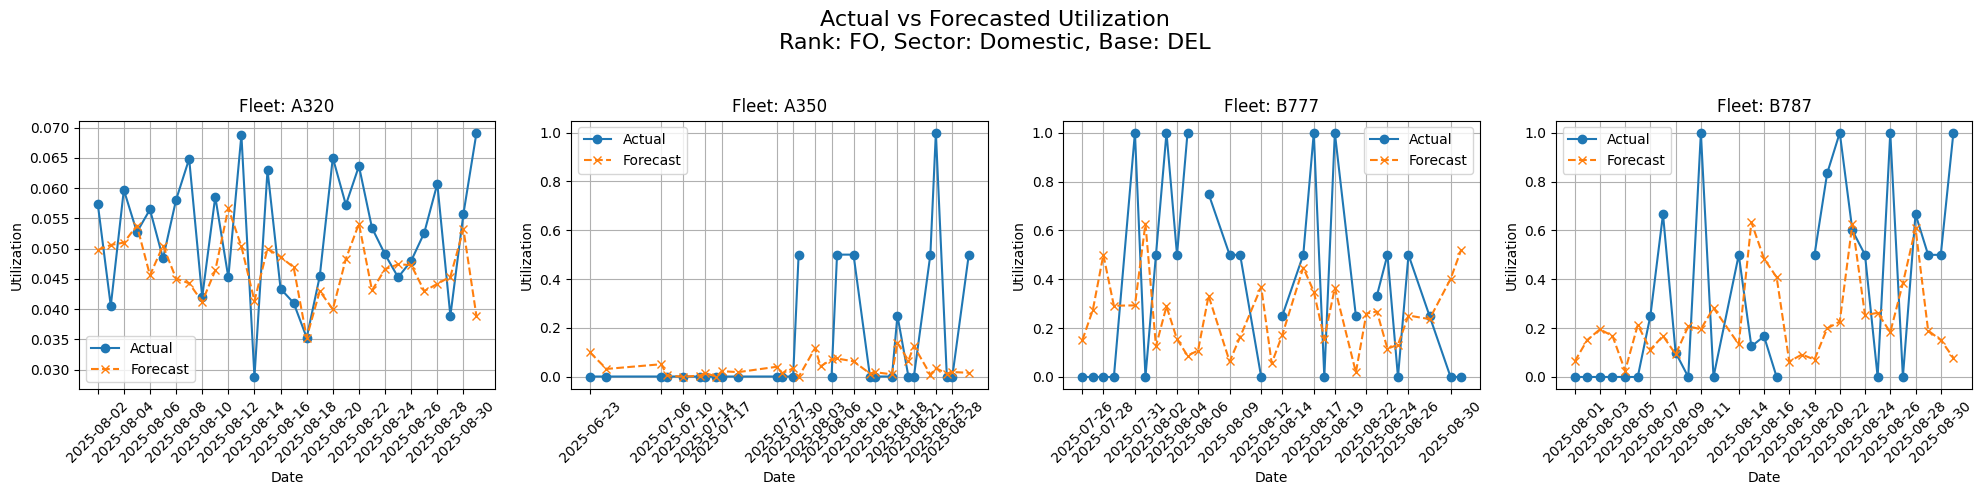

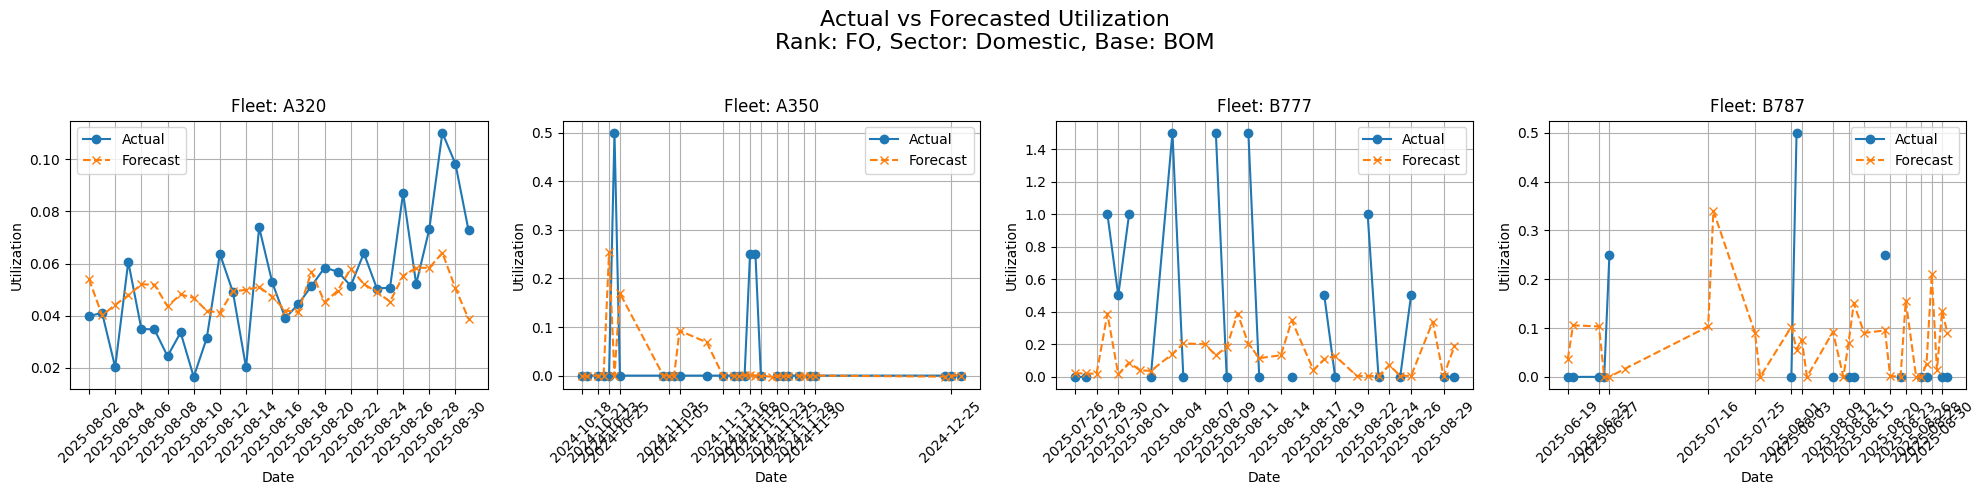

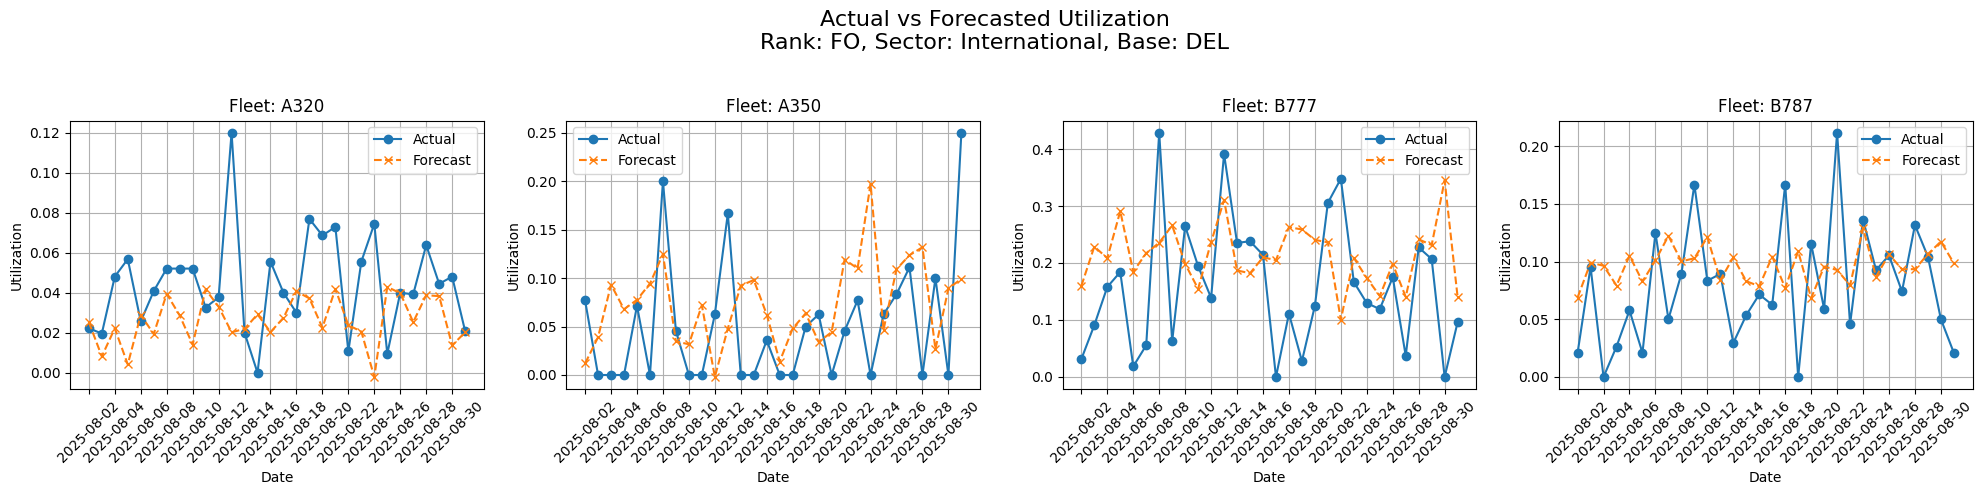

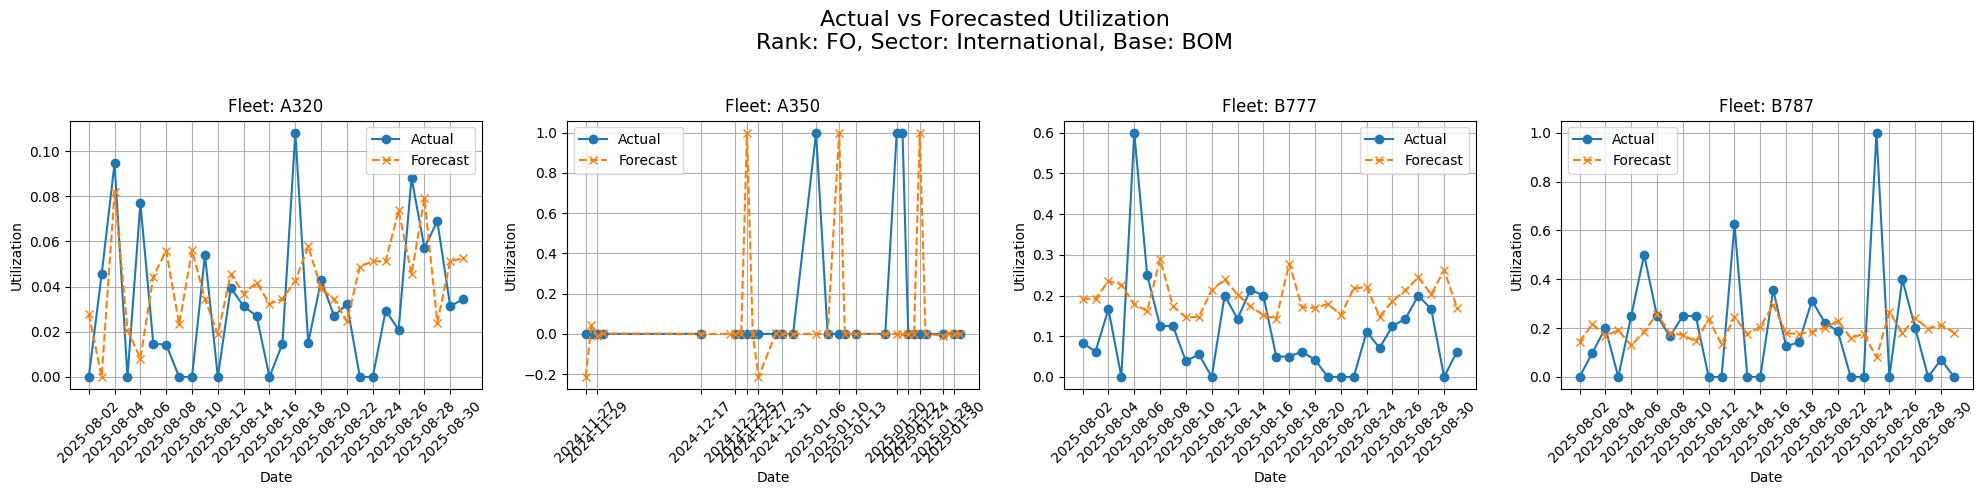

In [33]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# def plot_fleets_side_by_side_with_independent_scales(comparison_df):
#     # unique combinations of rank, sector, base
#     group_combos = comparison_df[['rank', 'sector', 'base']].drop_duplicates()

#     for _, combo in group_combos.iterrows():
#         rank = combo['rank']
#         sector = combo['sector']
#         base = combo['base']

#         # filter data for this combo across all fleets
#         combo_df = comparison_df[
#             (comparison_df['rank'] == rank) &
#             (comparison_df['sector'] == sector) &
#             (comparison_df['base'] == base)
#         ]

#         fleets = combo_df['fleet'].unique()
#         n_fleets = len(fleets)

#         # Create subplots without shared y-axis for independent scaling
#         fig, axes = plt.subplots(nrows=1, ncols=n_fleets, figsize=(5*n_fleets, 5), sharey=False)

#         if n_fleets == 1:
#             axes = [axes]  # Make iterable when single subplot

#         for ax, fleet in zip(axes, fleets):
#             fleet_df = combo_df[combo_df['fleet'] == fleet].sort_values('date')
#             ax.plot(fleet_df['date'], fleet_df['actual_utilization'], label='Actual', marker='o')
#             ax.plot(fleet_df['date'], fleet_df['forecasted_utilization'], label='Forecast', marker='x', linestyle='--')
#             ax.set_title(f'Fleet: {fleet}')
#             ax.set_xlabel('Date')
#             ax.set_ylabel('Utilization')
#             ax.tick_params(axis='x', rotation=45)
#             ax.grid(True)
#             ax.legend()

#             # Set alternate date ticks on x-axis
#             all_dates = fleet_df['date'].sort_values().unique()
#             # Select every second date for ticks
#             alternate_ticks = all_dates[::2]
#             ax.set_xticks(alternate_ticks)
#             # Format the date labels nicely
#             ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#         fig.suptitle(f'Actual vs Forecasted Utilization\nRank: {rank}, Sector: {sector}, Base: {base}', fontsize=16)
#         plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for title
#         plt.show()

# # Usage:
# plot_fleets_side_by_side_with_independent_scales(comparison_df)


import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_fleets_side_by_side_with_independent_scales(comparison_df, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # unique combinations of rank, sector, base
    group_combos = comparison_df[['rank', 'sector', 'base']].drop_duplicates()

    for _, combo in group_combos.iterrows():
        rank = combo['rank']
        sector = combo['sector']
        base = combo['base']

        # filter data for this combo across all fleets
        combo_df = comparison_df[
            (comparison_df['rank'] == rank) &
            (comparison_df['sector'] == sector) &
            (comparison_df['base'] == base)
        ]

        fleets = combo_df['fleet'].unique()
        n_fleets = len(fleets)

        # Create subplots without shared y-axis for independent scaling
        fig, axes = plt.subplots(nrows=1, ncols=n_fleets, figsize=(5*n_fleets, 5), sharey=False)

        if n_fleets == 1:
            axes = [axes]  # Make iterable when single subplot

        for ax, fleet in zip(axes, fleets):
            fleet_df = combo_df[combo_df['fleet'] == fleet].sort_values('date')
            ax.plot(fleet_df['date'], fleet_df['actual_utilization'], label='Actual', marker='o')
            ax.plot(fleet_df['date'], fleet_df['forecasted_utilization'], label='Forecast', marker='x', linestyle='--')
            ax.set_title(f'Fleet: {fleet}')
            ax.set_xlabel('Date')
            ax.set_ylabel('Utilization')
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True)
            ax.legend()

            # Set alternate date ticks on x-axis
            all_dates = fleet_df['date'].sort_values().unique()
            alternate_ticks = all_dates[::2]
            ax.set_xticks(alternate_ticks)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        fig.suptitle(f'Actual vs Forecasted Utilization\nRank: {rank}, Sector: {sector}, Base: {base}', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Save the figure
        filename = f"utilization_rank_{rank}_sector_{sector}_base_{base}.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath)
        # plt.close(fig)  # Close the figure to free memory
        plt.show()

# Usage:
output_folder = r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\plots\sarima output\iteration 6"  # Replace with your desired folder path
plot_fleets_side_by_side_with_independent_scales(comparison_df, output_folder)

## ERROR Summary for SARIMA

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

def sarima_error_summary(df, group_cols):
    summary_list = []

    grouped = df.groupby(group_cols)

    for group_keys, group_df in grouped:
        metrics = {
            'fleet': group_keys[0],
            'base': group_keys[1],
            'rank': group_keys[2],
            'sector': group_keys[3]
        }

        actual = group_df["actual_utilization"]
        forecast = group_df["forecasted_utilization"]

        abs_error = np.abs(forecast - actual)
        perc_error = abs_error / actual.replace(0, np.nan)

        metrics['sarima_RMSE'] = np.sqrt(np.mean((forecast - actual) ** 2))
        metrics['sarima_MAP'] = np.mean(np.abs(forecast))
        metrics['sarima_MAPE'] = np.mean(perc_error) * 100
        metrics['sarima_StdDev'] = np.std(abs_error)
        metrics['sarima_mae'] = mean_absolute_error(actual, forecast)
        metrics['sarima_r2'] = r2_score(actual, forecast)

        summary_list.append(metrics)

    return pd.DataFrame(summary_list)

In [ ]:
error_summary_grouped = sarima_error_summary(comparison_df, ['fleet', 'base', 'rank', 'sector'])

## Without actual new

In [31]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# --- Feature and Model Setup ---
features = [
    'is_holiday', 'day_of_week', 'weekofyear', 'month', 'is_weekend',
    'lag_util_1d', 'lag_util_3d', 'lag_util_7d',
    'rolling_util_3d', 'rolling_std_3d',
    'rolling_util_7d', 'rolling_std_7d',
    # Exclude actual_standby_used because future unknown
    'base_load_factor',
    'monthly_avg_util', 'biweekly_std_util',
    'day_sin', 'day_cos','avg_util_by_day_of_month',
    'expanding_mean_util', 'expanding_std_util'
]

model_classes = {
    'XGBoost': XGBRegressor(
        n_estimators=300, max_depth=6, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        reg_alpha=0.1, reg_lambda=1.0,
        objective='reg:squarederror', random_state=42
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=300, max_depth=5,
        min_samples_split=5, min_samples_leaf=2,
        max_features='sqrt', random_state=42
    ),
    'SVM': SVR(kernel='rbf', C=10.0, epsilon=0.05, gamma='scale'),
    # 'KNN': KNeighborsRegressor(n_neighbors=4, weights='distance', p=2)
    'KNN': KNeighborsRegressor(n_neighbors=10, weights='distance', p=2)
}


def compute_features(df):
    df = df.copy()
    df['lag_util_1d'] = df['standby_utilization_per_fly'].shift(1)
    df['lag_util_3d'] = df['standby_utilization_per_fly'].shift(3)
    df['lag_util_7d'] = df['standby_utilization_per_fly'].shift(7)
    df['rolling_util_7d'] = df['standby_utilization_per_fly'].rolling(7).mean()
    df['rolling_std_7d'] = df['standby_utilization_per_fly'].rolling(7).std()
    df['monthly_avg_util'] = df['standby_utilization_per_fly'].transform(lambda x: x.rolling(window=30, min_periods=5).mean())
    df['expanding_mean_util'] = df['standby_utilization_per_fly'].transform(lambda x: x.expanding(min_periods=5).mean())
    df['expanding_std_util'] = df['standby_utilization_per_fly'].transform(lambda x: x.expanding(min_periods=5).std())
    df['biweekly_std_util'] = df['standby_utilization_per_fly'].transform(lambda x: x.rolling(window=14, min_periods=5).std())
    df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.dayofyear / 365)
    df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.dayofyear / 365)
    df_final['day_of_month'] = df_final['date'].dt.day

# Compute average standby utilization per fly for each day of the month across all months
    avg_by_day_of_month = df_final.groupby('day_of_month')['standby_utilization_per_fly'].mean().rename('avg_util_by_day_of_month')
    # print("Average by day of the month",avg_by_day_of_month)

# Map this average back to the original dataframe
    df_final['avg_util_by_day_of_month'] = df_final['day_of_month'].map(avg_by_day_of_month)
    

    df[features] = df[features].replace([np.inf, -np.inf], np.nan)
    df[features] = df[features].fillna(method='ffill').fillna(0)
    df[features] = df[features].clip(-1e6, 1e6)
    return df

def generate_recursive_forecast(df_final, forecast_days=45):
    ml_df = df_final[df_final['base'].isin(['BOM', 'DEL'])].copy()
    ml_df = ml_df.dropna(subset=['standby_utilization_per_fly'])
    ml_df = ml_df.sort_values('date')

    forecasts_all = []

    # Group by fleet, rank, sector to process each segment independently
    group_keys = ['fleet', 'rank', 'sector']
    grouped = ml_df.groupby(group_keys)

    for (fleet, rank, sector), group_data in tqdm(grouped, desc="Processing fleet-rank-sector groups"):
        for base in ['DEL', 'BOM']:
            base_group = group_data[group_data['base'] == base].copy()
            base_group = base_group.dropna(subset=['standby_utilization_per_fly']).sort_values('date')

            if len(base_group) < 50:
                # Skip if not enough data to train reliably
                continue

            # Compute features on historical data
            train_data = compute_features(base_group)
            X_train = train_data[features].apply(pd.to_numeric, errors='coerce').fillna(0)
            y_train = train_data['standby_utilization_per_fly'].replace([np.inf, -np.inf], np.nan).dropna()
            valid_idx = y_train.index
            X_train = X_train.loc[valid_idx]
            y_train = y_train.loc[valid_idx]

            if len(X_train) == 0 or len(y_train) == 0:
                continue

            for model_name, model_class in model_classes.items():
                model = model_class
                model.fit(X_train, y_train)

                historical = train_data.copy()
                predictions, forecast_dates = [], []

                last_date = historical['date'].max() - pd.Timedelta(days=45)

                # Use last known static features forward-filled or fixed
                last_base_load_factor = historical['base_load_factor'].iloc[-1] if 'base_load_factor' in historical.columns else np.nan
                # rank and sector come from group keys and assumed constant
                last_rank = rank
                last_sector = sector

                # for day_offset in tqdm(range(1, forecast_days + 1), desc=f"Forecasting {forecast_days} days for {fleet}-{rank}-{sector}-{base} with {model_name}"):
                for day_offset in range(1, forecast_days + 1):
                    pred_date = last_date + pd.Timedelta(days=day_offset)

                    new_row = pd.DataFrame({
                        'date': [pred_date],
                        'standby_utilization_per_fly': [np.nan],
                        # 'base_load_factor': [last_base_load_factor],
                        'base': [base],
                        'fleet': [fleet],
                        'rank': [last_rank],
                        'sector': [last_sector]
                    })

                    new_row['day_of_month'] = pred_date.day
                    new_row['day_sin'] = np.sin(2 * np.pi * pred_date.timetuple().tm_yday / 365)
                    new_row['day_cos'] = np.cos(2 * np.pi * pred_date.timetuple().tm_yday / 365)
                    new_row['is_weekend'] = int(pred_date.weekday() >= 5)
                    new_row['day_of_week'] = pred_date.weekday() + 1
                    new_row['weekofyear'] = pred_date.isocalendar().week
                    new_row['month'] = pred_date.month
                    new_row['is_holiday'] = int(pred_date in india_holidays)  # if holiday logic is available
                    new_row['avg_util_by_day_of_month'] = avg_by_day_of_month.get(pred_date.day, 0)                    

                    historical = pd.concat([historical, new_row], ignore_index=True)
                    historical = compute_features(historical)

                    X_input = historical[features].iloc[-1].values.reshape(1, -1)
                    X_input = np.nan_to_num(X_input, nan=0.0, posinf=0.0, neginf=0.0)
                    X_input = np.clip(X_input, -1e6, 1e6)
                    # print(

                    pred = model.predict(X_input)[0]
                    historical.at[historical.index[-1], 'standby_utilization_per_fly'] = pred

                    predictions.append(pred)
                    forecast_dates.append(pred_date)

                forecast_df = pd.DataFrame({
                    'date': forecast_dates,
                    'forecasted_utilization': predictions,
                    'base': base,
                    'fleet': fleet,
                    'rank': last_rank,
                    'sector': last_sector,
                    'model': model_name,
                    # 'base_load_factor': last_base_load_factor
                })

                forecasts_all.append(forecast_df)

    return pd.concat(forecasts_all, ignore_index=True)

# Usage:
# df_final = pd.read_csv("your_input.csv")
forecast_output_df = generate_recursive_forecast(df_final, forecast_days=45)
# forecast_output_df.to_csv("recursive_forecast_30days_by_group.csv", index=False)


Processing fleet-rank-sector groups: 100%|█████████████████████████████████████████████| 16/16 [16:19<00:00, 61.20s/it]


In [34]:
forecast_output_df.tail()

date  forecasted_utilization base fleet rank         sector model
5755 2025-12-27                0.138127  BOM  B787   FO  International   KNN
5756 2025-12-28                0.119018  BOM  B787   FO  International   KNN
5757 2025-12-29                0.098925  BOM  B787   FO  International   KNN
5758 2025-12-30                0.138655  BOM  B787   FO  International   KNN
5759 2025-12-31                0.033522  BOM  B787   FO  International   KNN

In [35]:
last_date = df_final['date'].max() - pd.Timedelta(days=45)
forecast_horizon_end = last_date + pd.Timedelta(days=45)

# Filter actual data for the period covering prediction horizon
actual_subset = df_final[df_final['date'].between(last_date, forecast_horizon_end)]

# Merge on columns: date, base, fleet, rank, sector
merged_df = pd.merge(
    actual_subset,
    forecast_output_df,
    on=['date', 'base', 'fleet', 'rank', 'sector'],
    how='inner',  # keep both actual and forecast data
    suffixes=('_actual', '_forecast')
)

In [36]:
merged_df = merged_df[merged_df['model'].notna()]

In [37]:
merged_df

date base fleet rank         sector  is_holiday  day_of_week  \
0    2025-11-17  BOM  A320   CP       Domestic           0            1   
1    2025-11-17  BOM  A320   CP       Domestic           0            1   
2    2025-11-17  BOM  A320   CP       Domestic           0            1   
3    2025-11-17  BOM  A320   CP       Domestic           0            1   
4    2025-11-17  BOM  A320   CP  International           0            1   
...         ...  ...   ...  ...            ...         ...          ...   
4339 2025-12-31  DEL  B787   FO       Domestic           0            3   
4340 2025-12-31  DEL  B787   FO  International           0            3   
4341 2025-12-31  DEL  B787   FO  International           0            3   
4342 2025-12-31  DEL  B787   FO  International           0            3   
4343 2025-12-31  DEL  B787   FO  International           0            3   

      weekofyear  month  is_weekend  planned_fly  planned_standby  \
0             47     11           0        113.0              6.0   
1             47     11           0        113.0              6.0   
2             47     11           0        113.0              6.0   
3             47     11           0        113.0              6.0   
4             47     11           0         22.0              0.0   
...          ...    ...         ...          ...              ...   
4339           1     12           0          0.0              1.0   
4340           1     12           0         24.0              0.0   
4341           1     12           0         24.0              0.0   
4342           1     12           0         24.0              0.0   
4343           1     12           0         24.0              0.0   

      actual_standby_used  standby_utilization  standby_utilization_per_fly  \
0                     5.0             0.833333                     0.044248   
1                     5.0             0.833333                     0.044248   
2                     5.0             0.833333                     0.044248   
3                     5.0             0.833333                     0.044248   
4                     0.0             0.000000                     0.000000   
...                   ...                  ...                          ...   
4339                  2.0             2.000000                     0.000000   
4340                  3.0             0.000000                     0.125000   
4341                  3.0             0.000000                     0.125000   
4342                  3.0             0.000000                     0.125000   
4343                  3.0             0.000000                     0.125000   

      lag_util_1d  lag_util_3d  lag_util_7d  rolling_util_3d  rolling_std_3d  \
0        0.333333     1.333333     0.333333         0.805556        0.458964   
1        0.333333     1.333333     0.333333         0.805556        0.458964   
2        0.333333     1.333333     0.333333         0.805556        0.458964   
3        0.333333     1.333333     0.333333         0.805556        0.458964   
4        0.000000     2.000000     0.000000         0.000000        0.000000   
...           ...          ...          ...              ...             ...   
4339     0.000000     0.000000     0.000000         0.666667        1.154701   
4340     0.000000     9.000000     0.000000         0.000000        0.000000   
4341     0.000000     9.000000     0.000000         0.000000        0.000000   
4342     0.000000     9.000000     0.000000         0.000000        0.000000   
4343     0.000000     9.000000     0.000000         0.000000        0.000000   

      rolling_util_7d  rolling_std_7d  expanding_mean_util  \
0            0.803571        0.464824             0.039074   
1            0.803571        0.464824             0.039074   
2            0.803571        0.464824             0.039074   
3            0.803571        0.464824             0.039074   
4            0.285714        0.755929             0.036503   

In [38]:
merged_df.loc[merged_df['forecasted_utilization']<0 , 'forecasted_utilization'] = 0

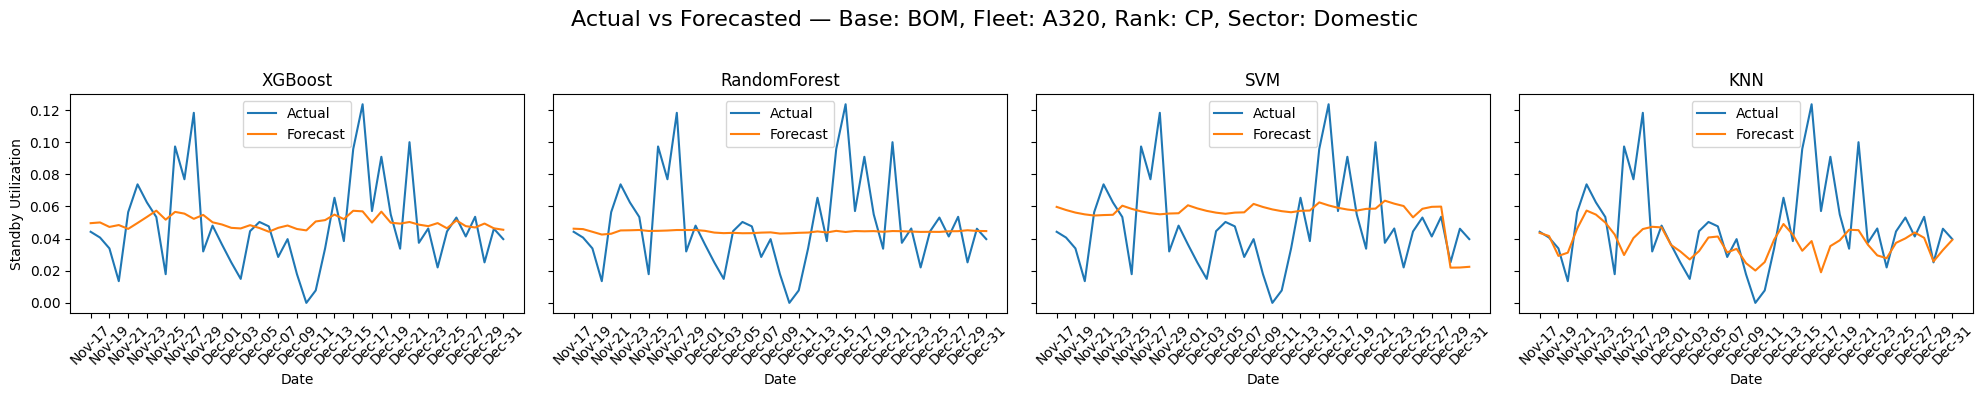

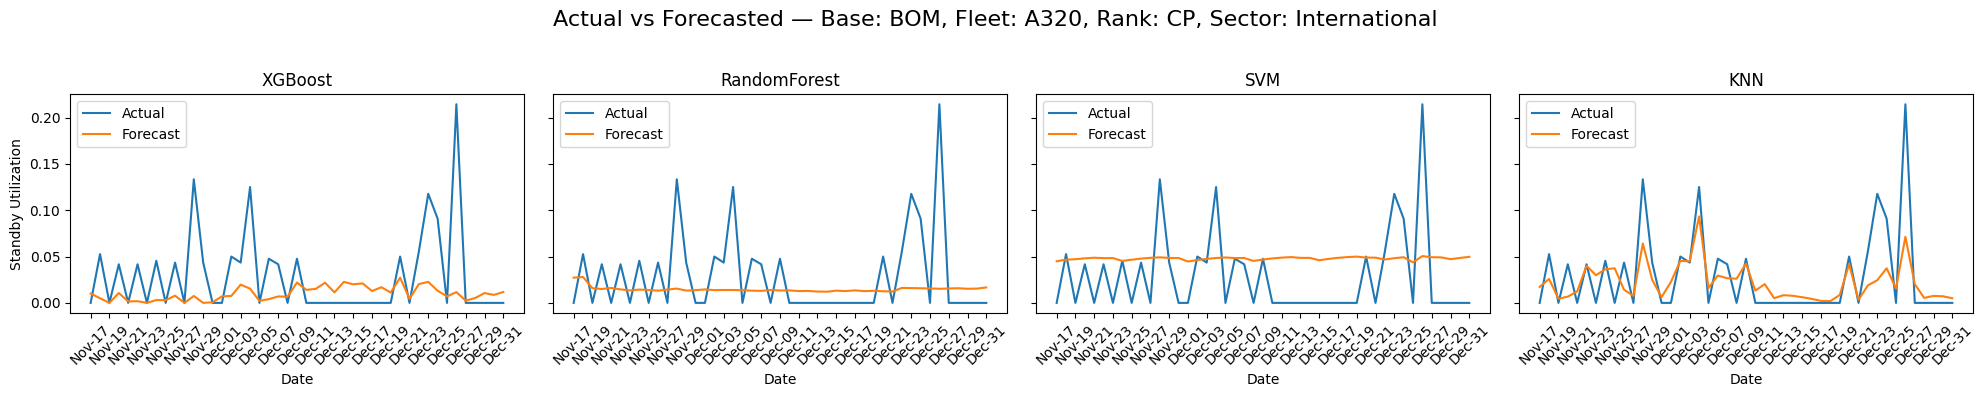

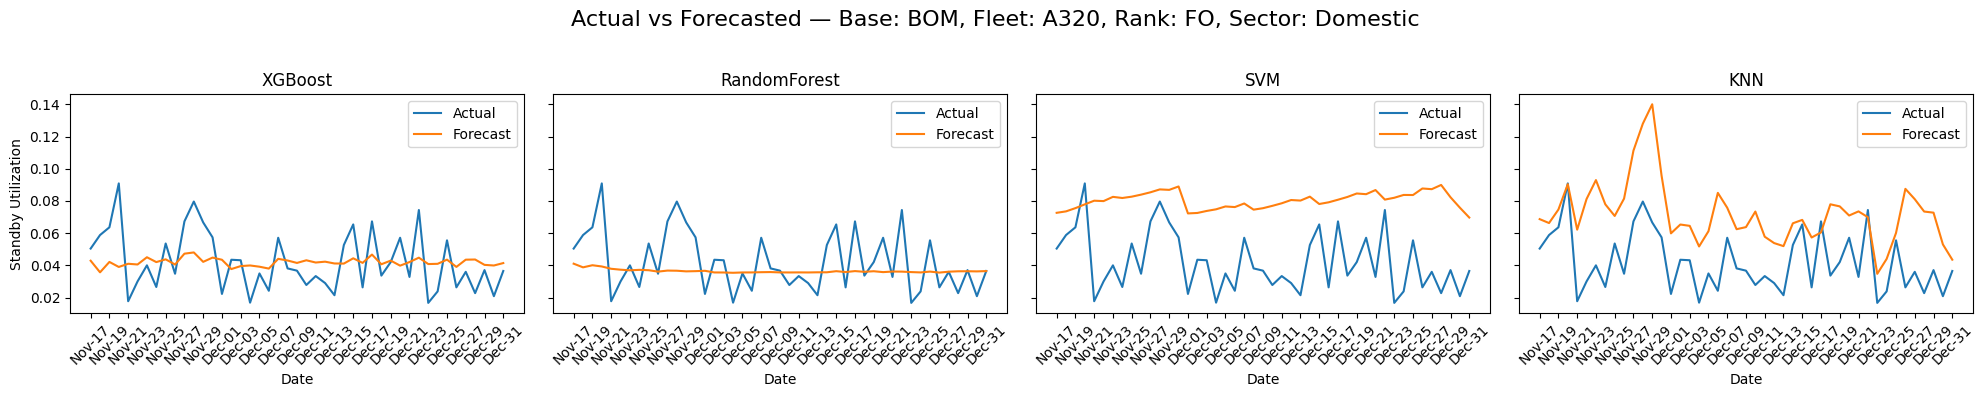

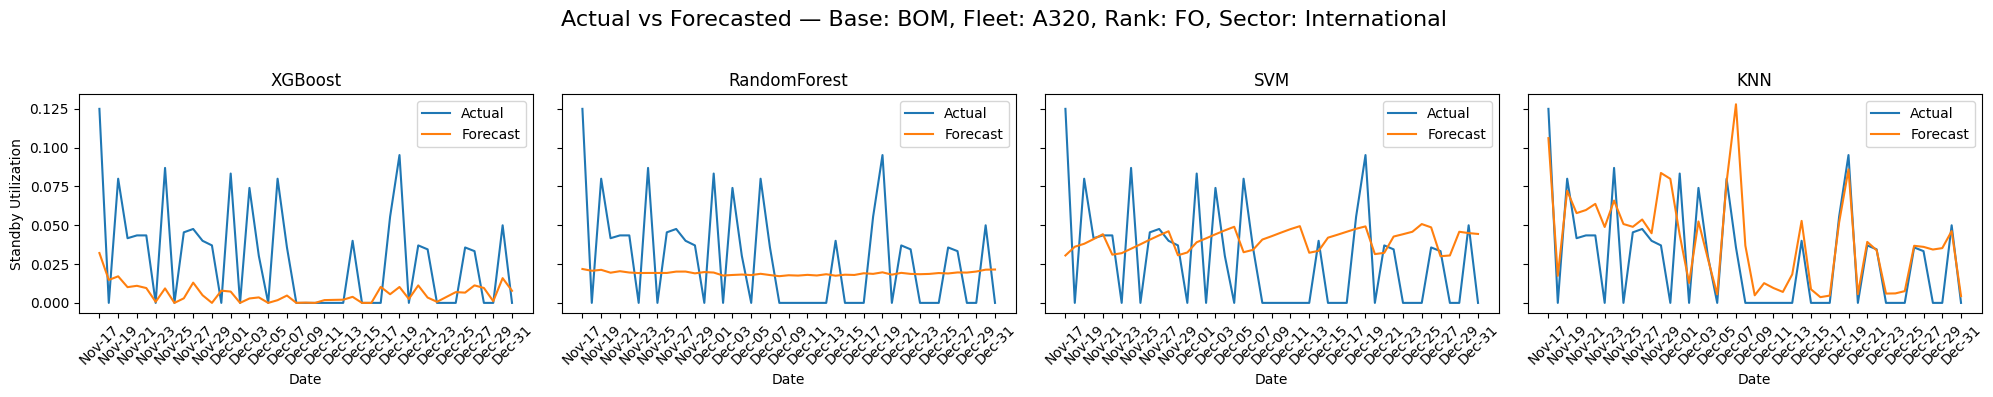

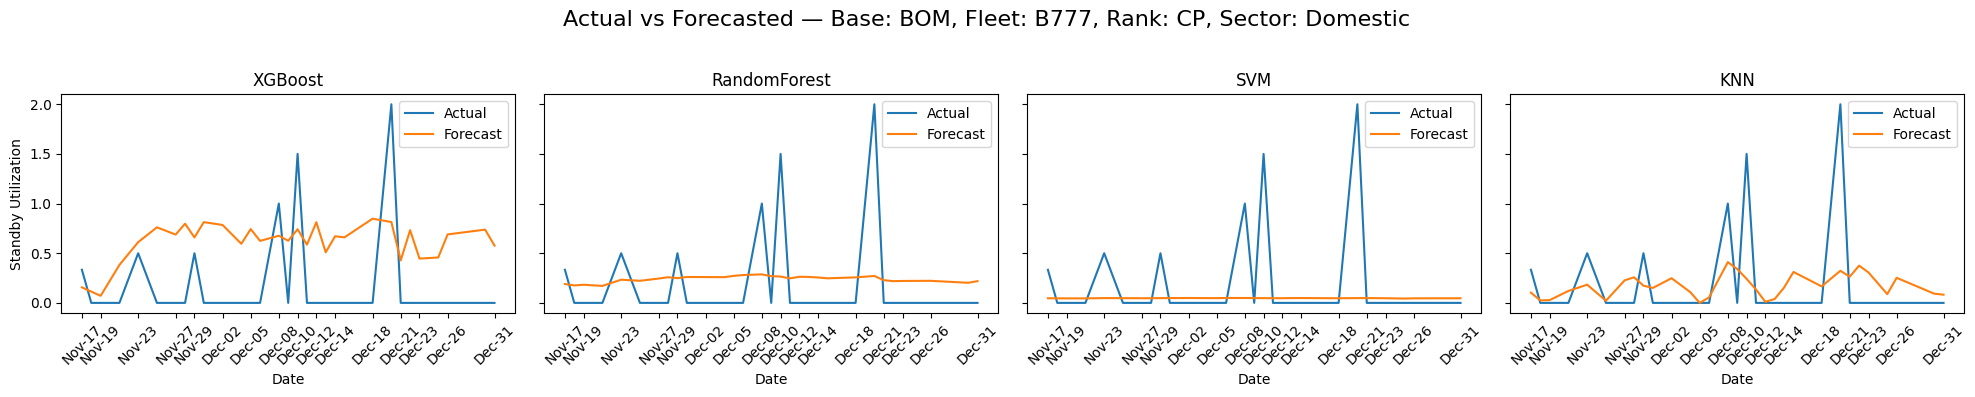

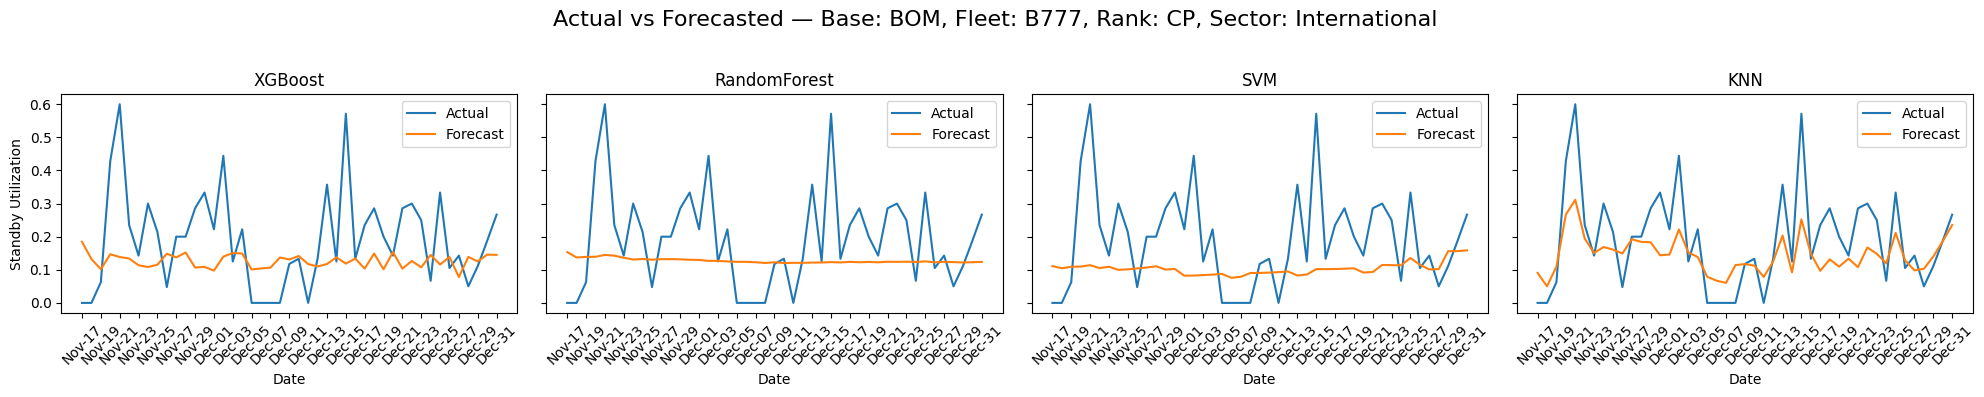

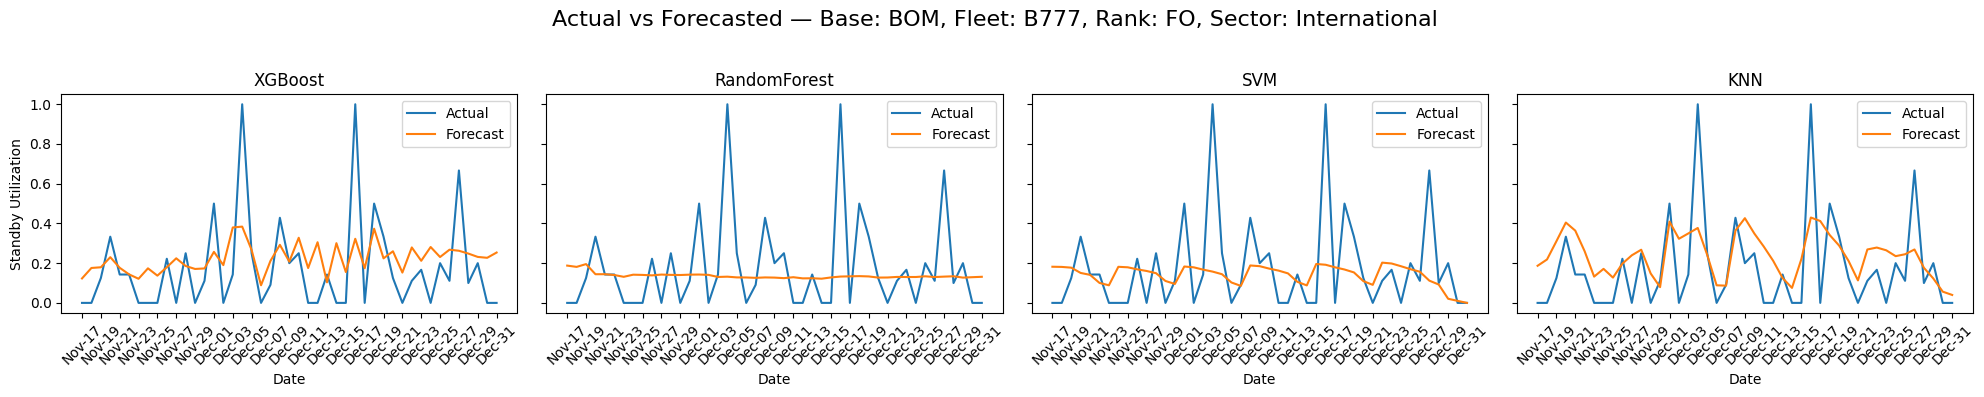

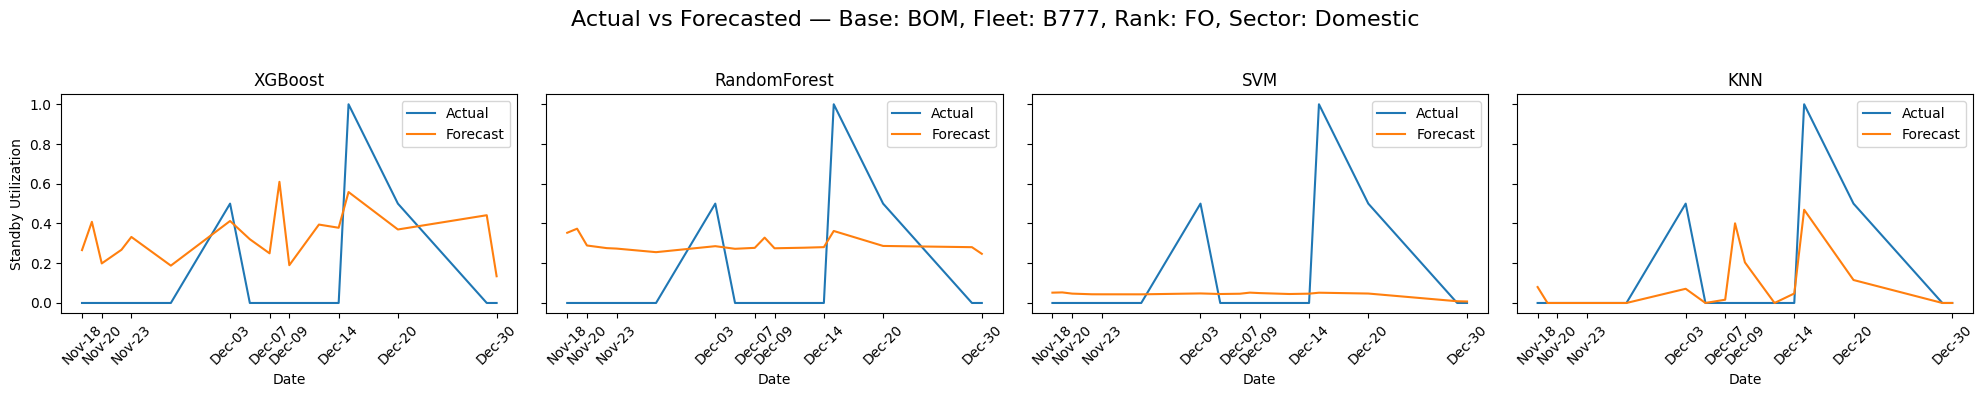

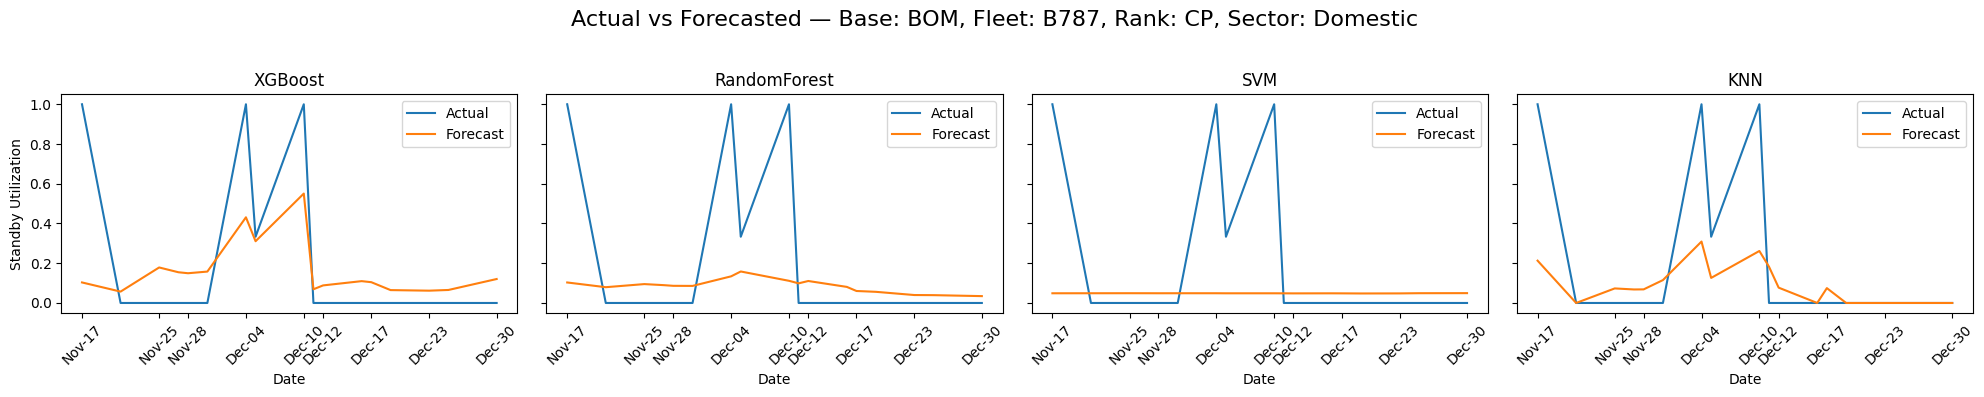

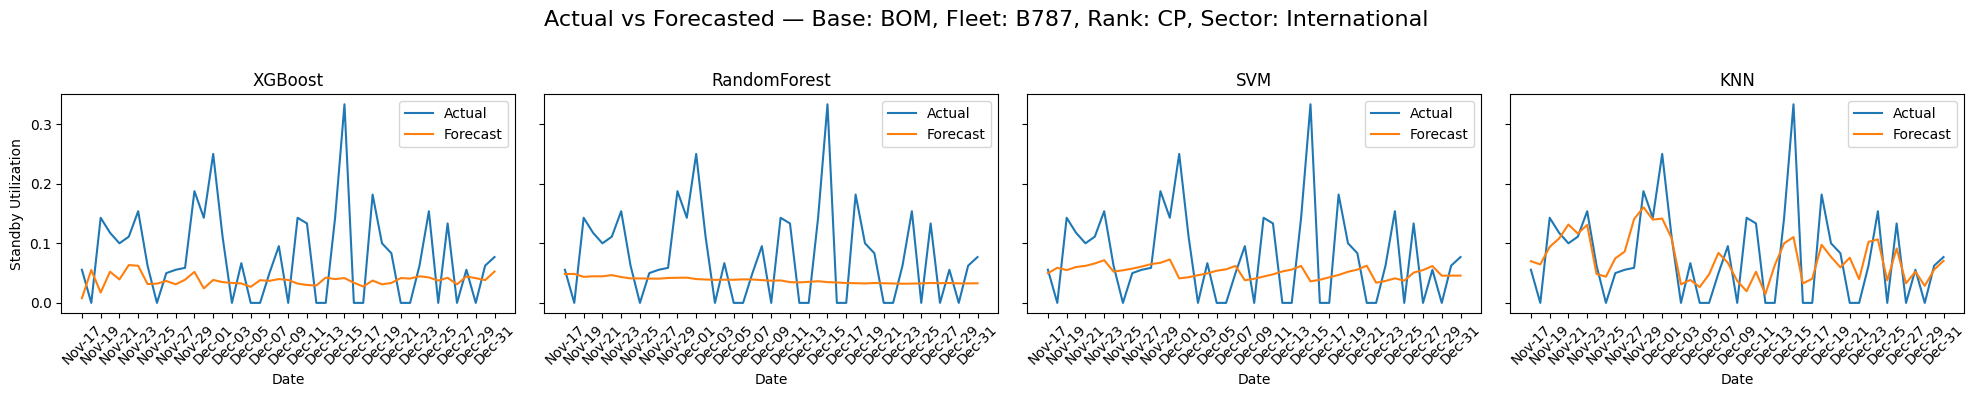

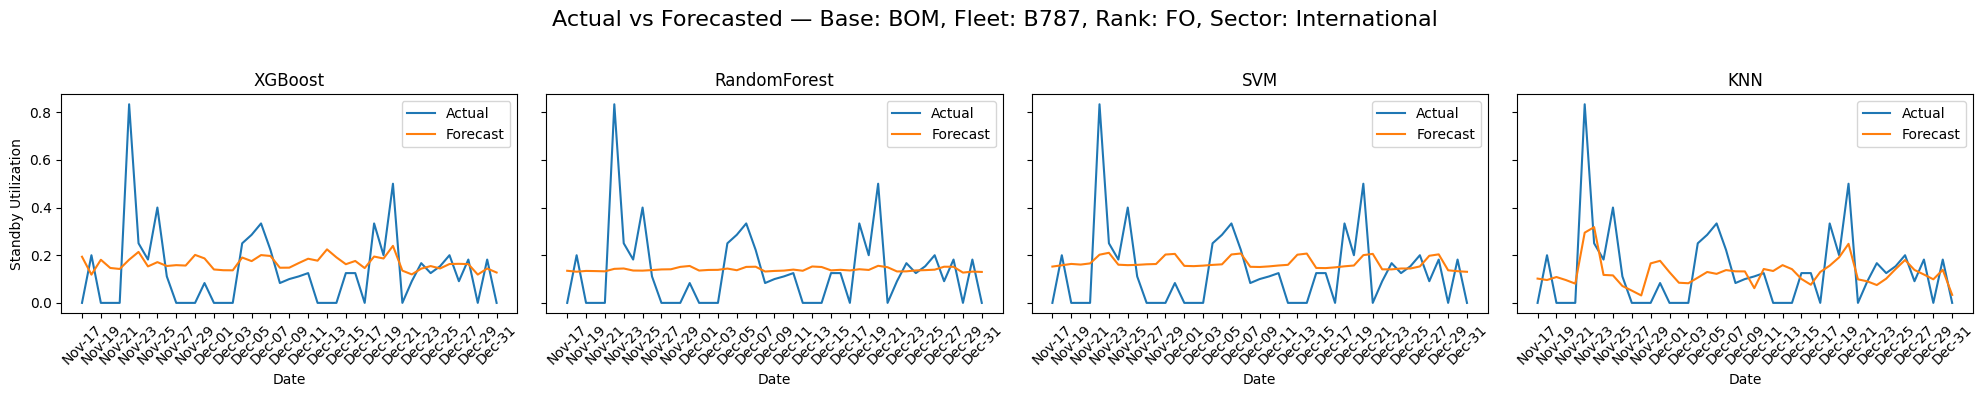

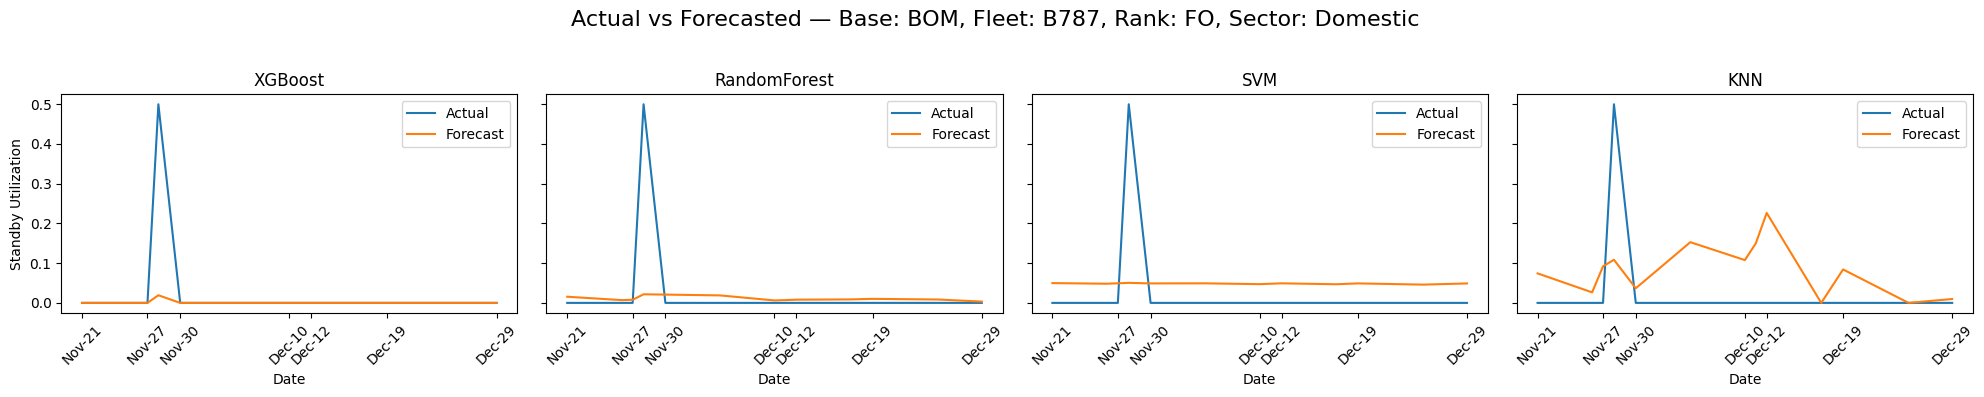

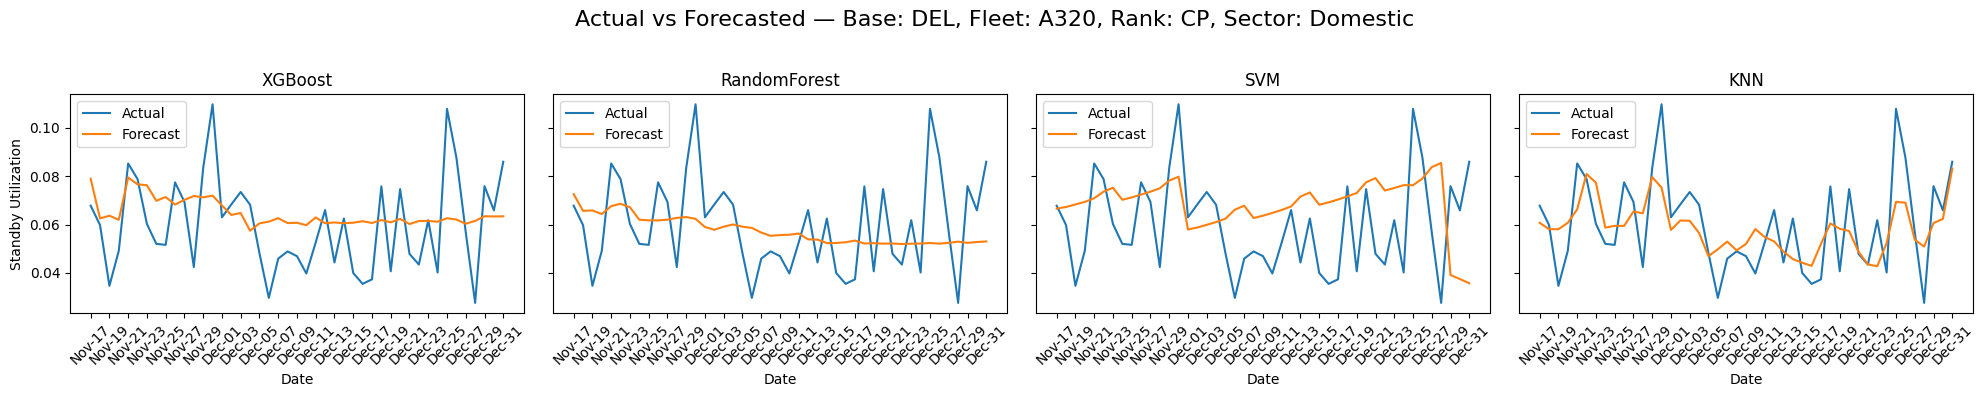

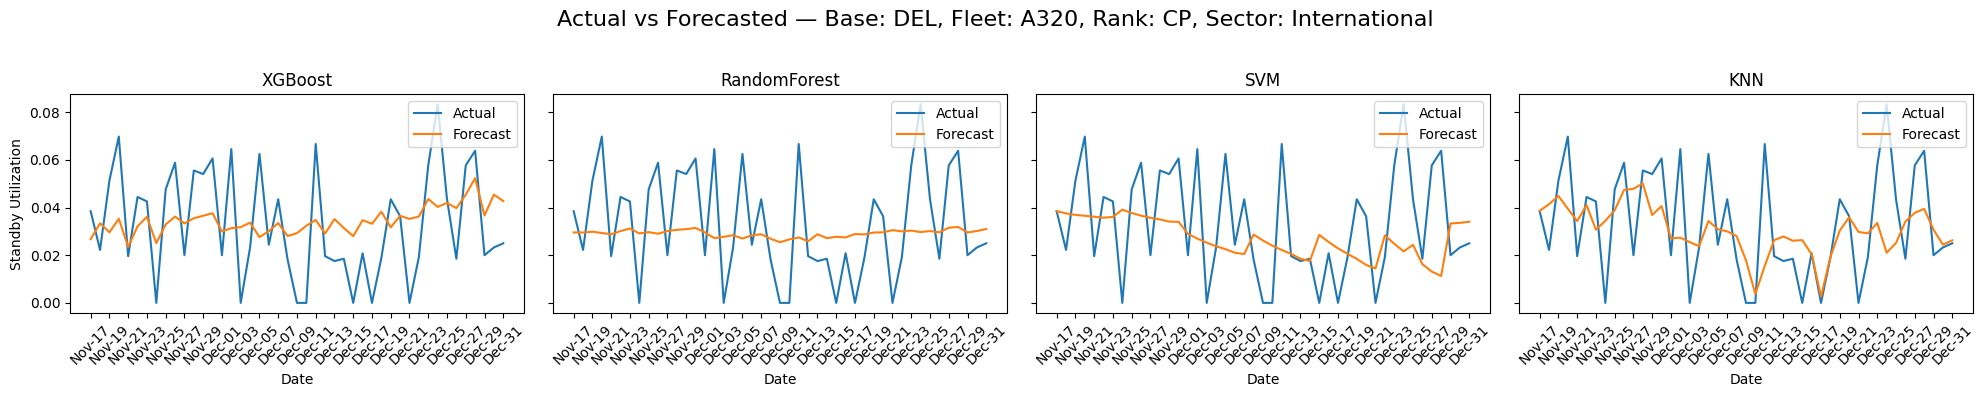

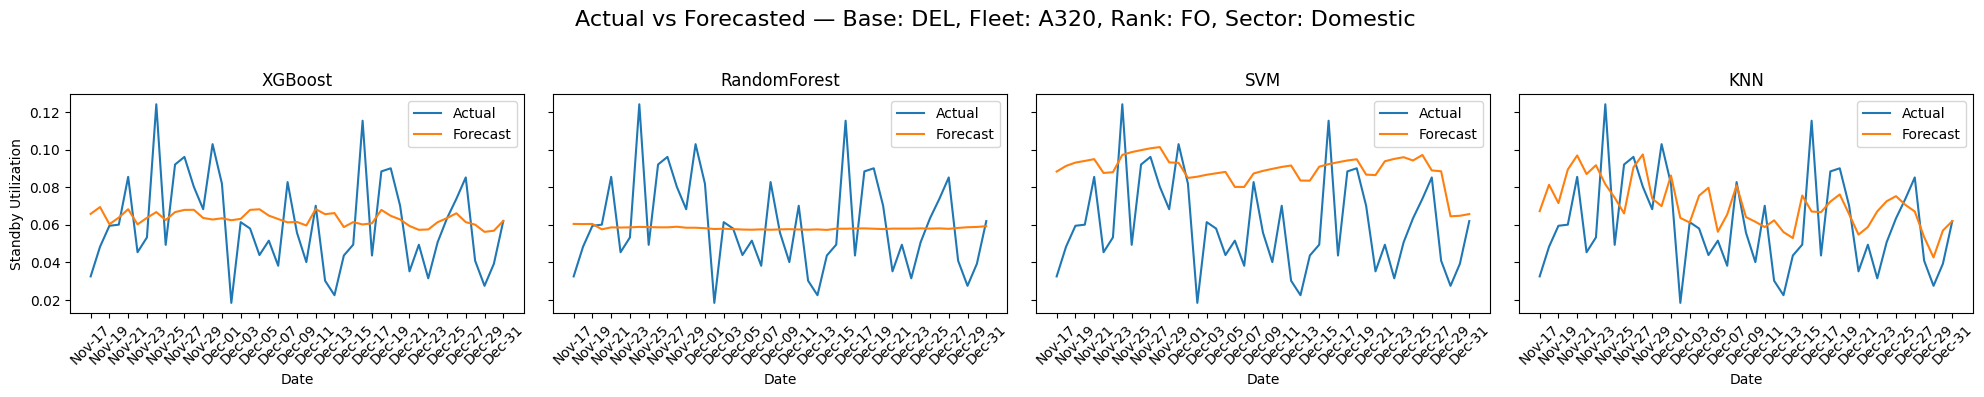

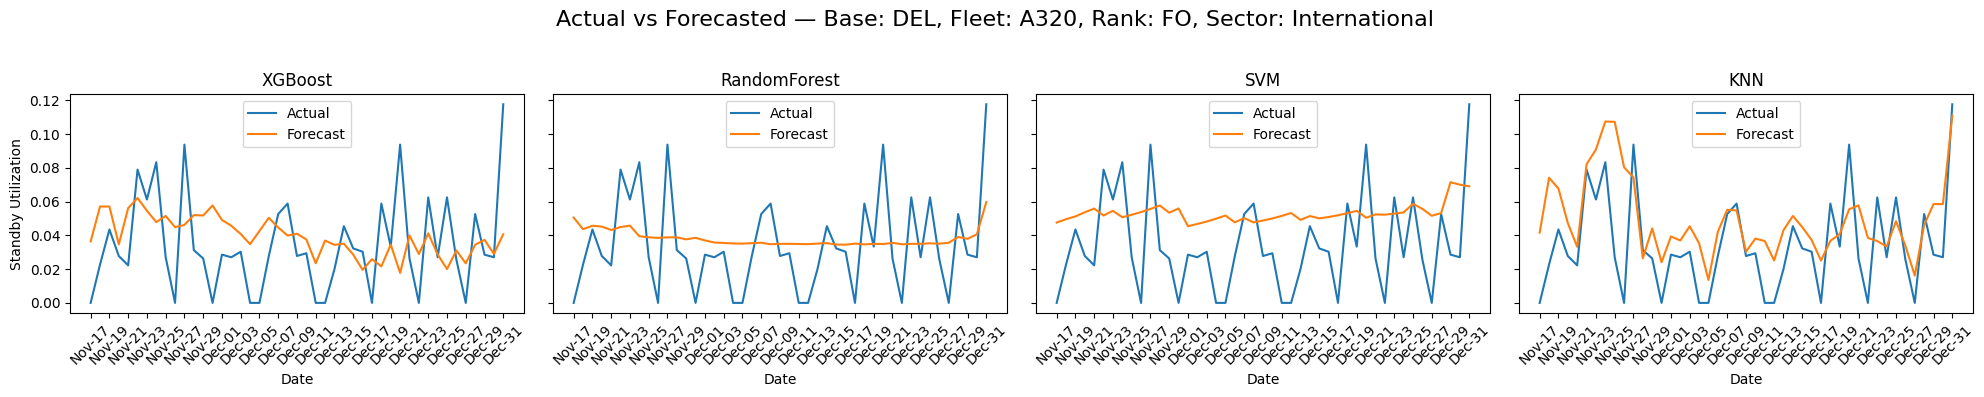

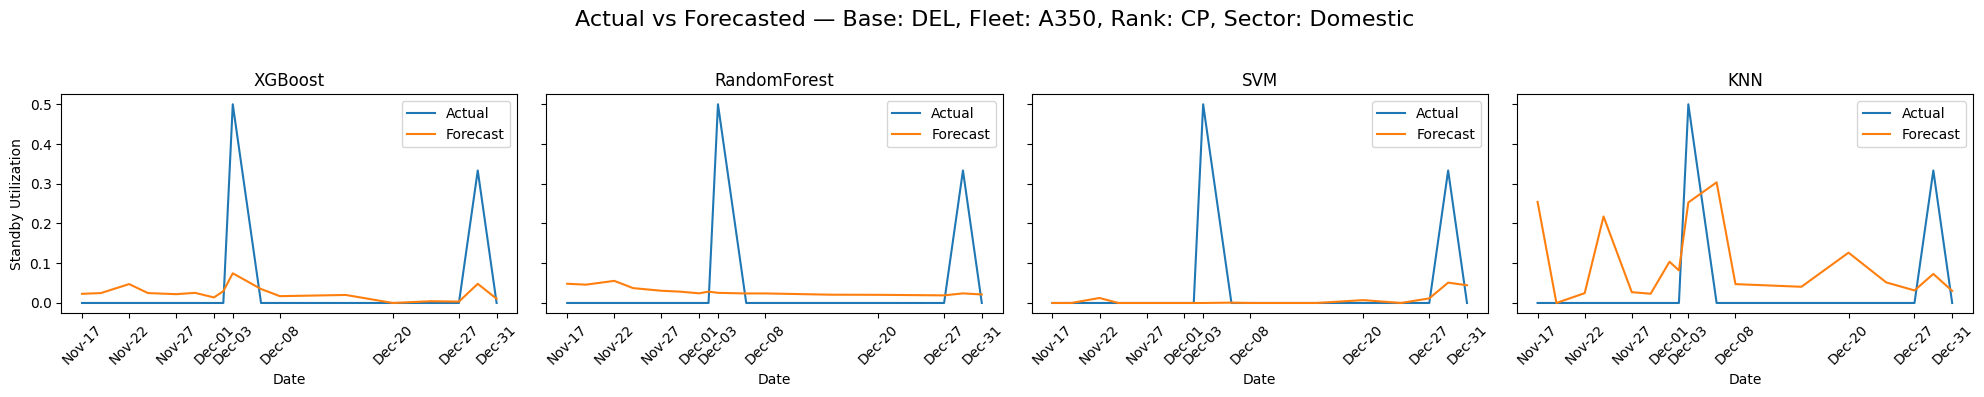

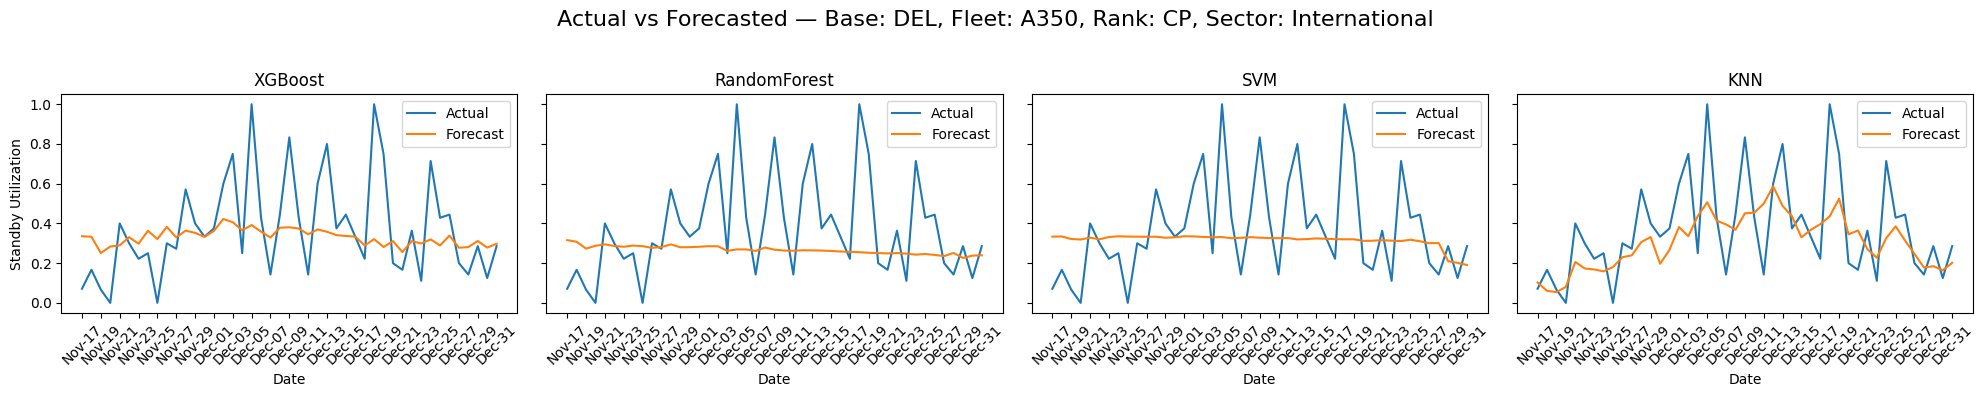

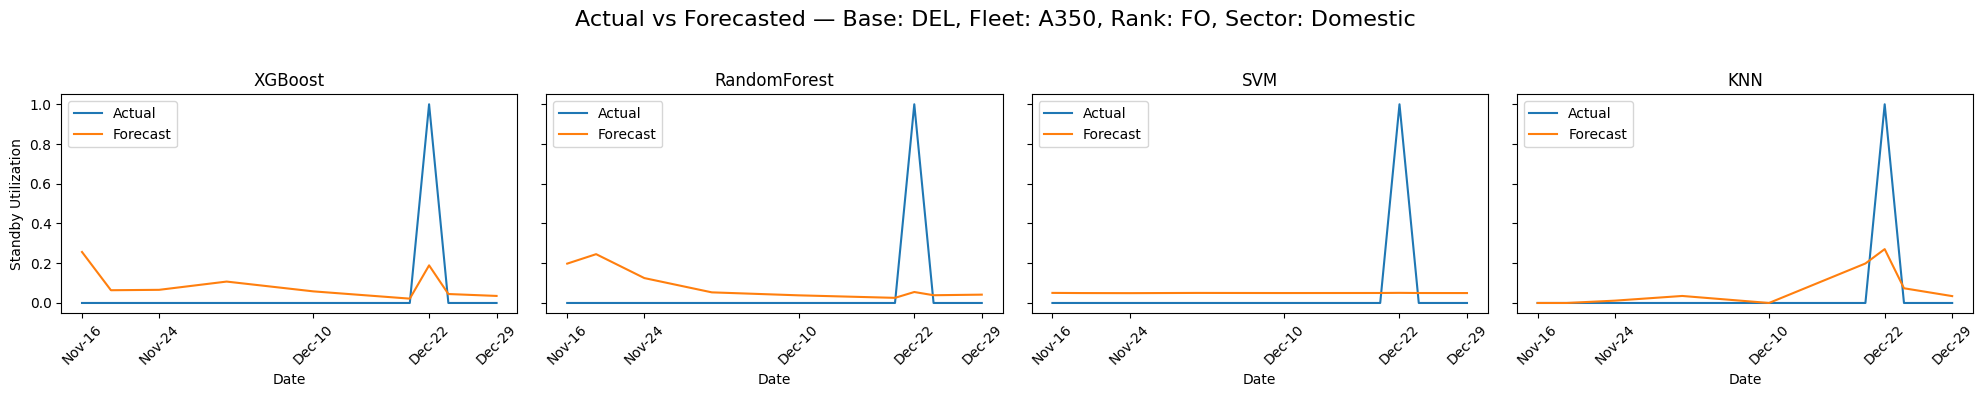

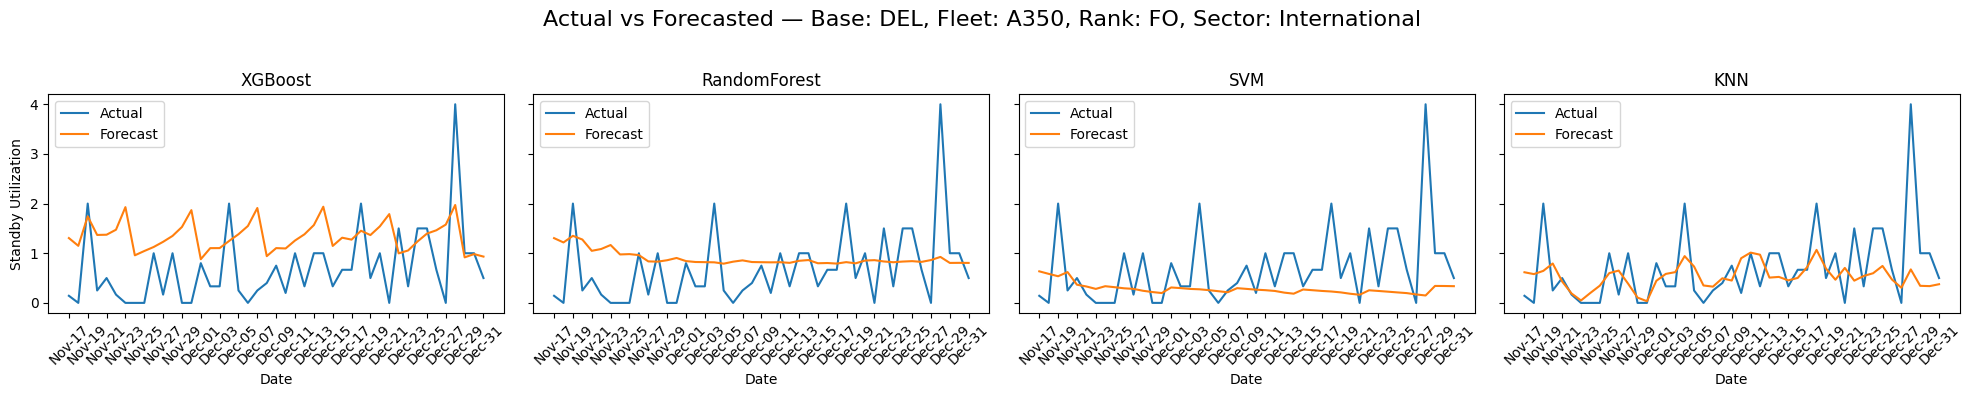

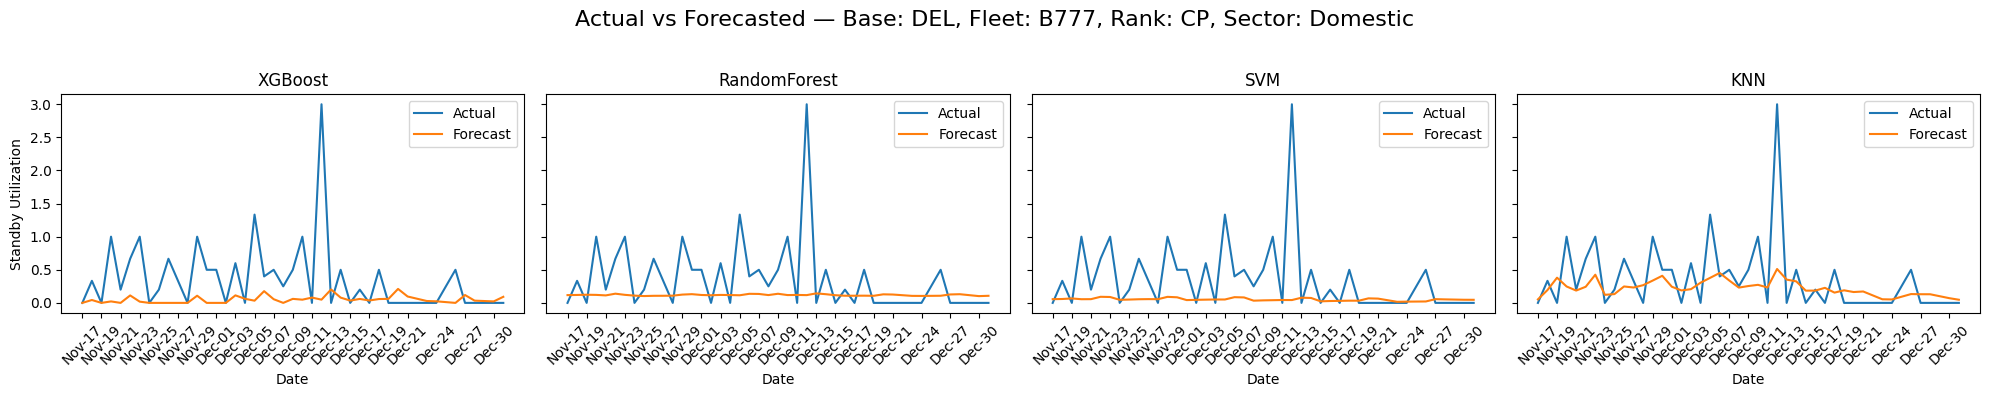

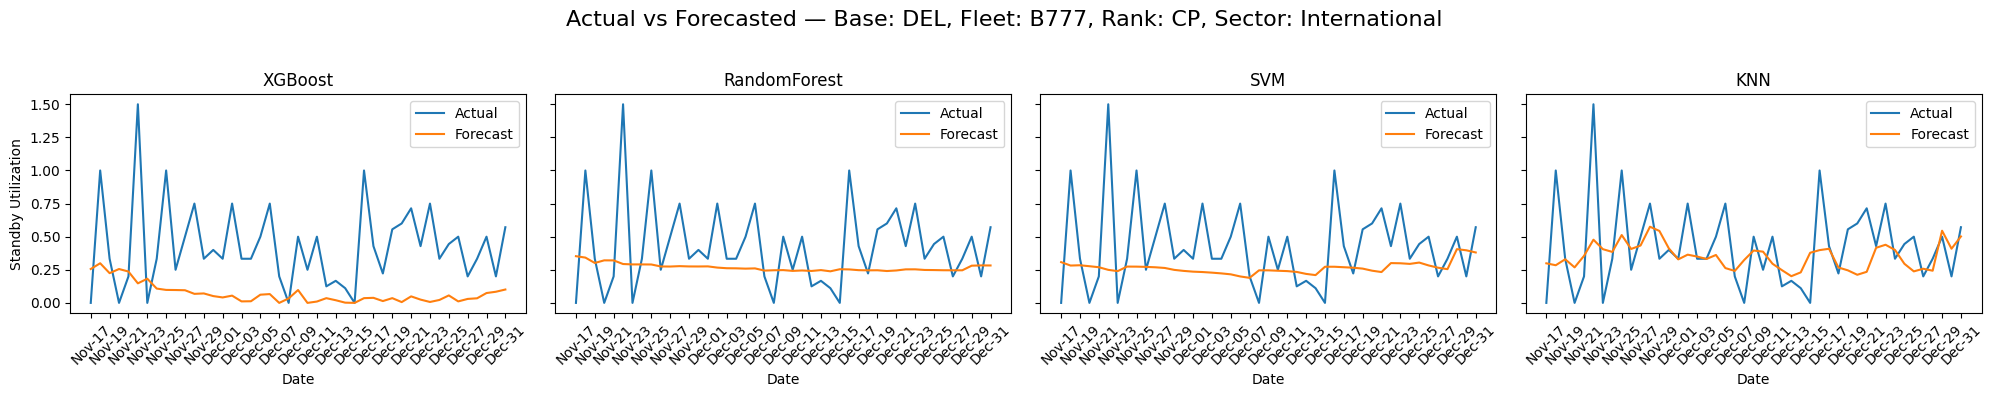

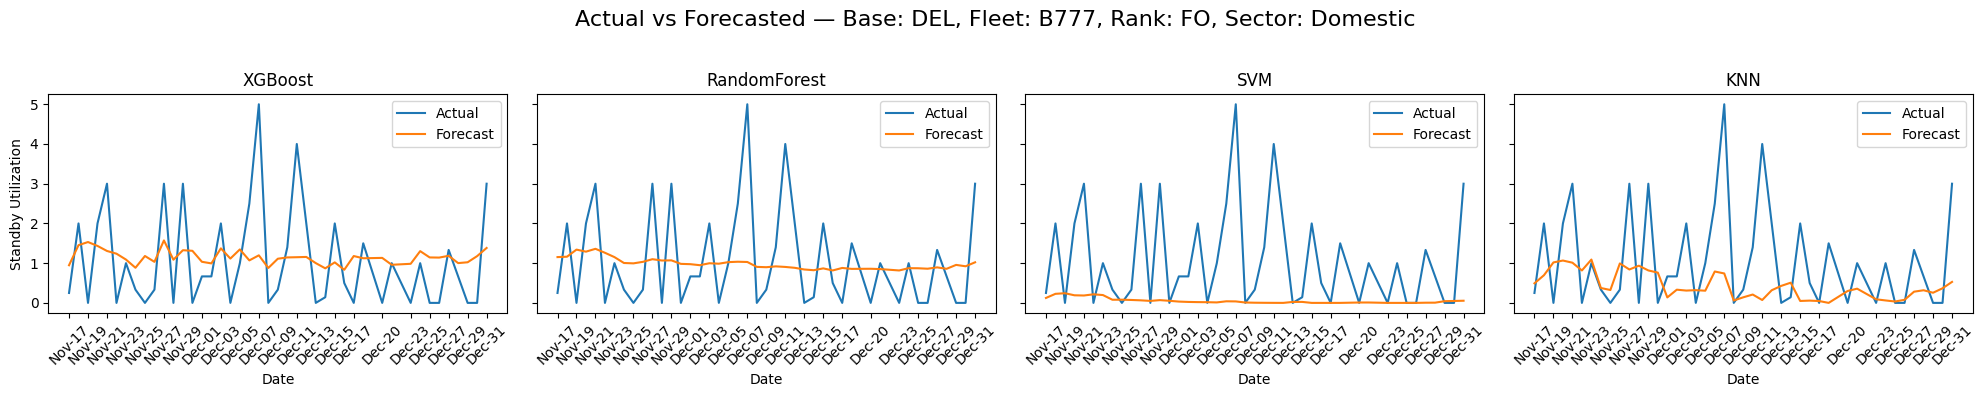

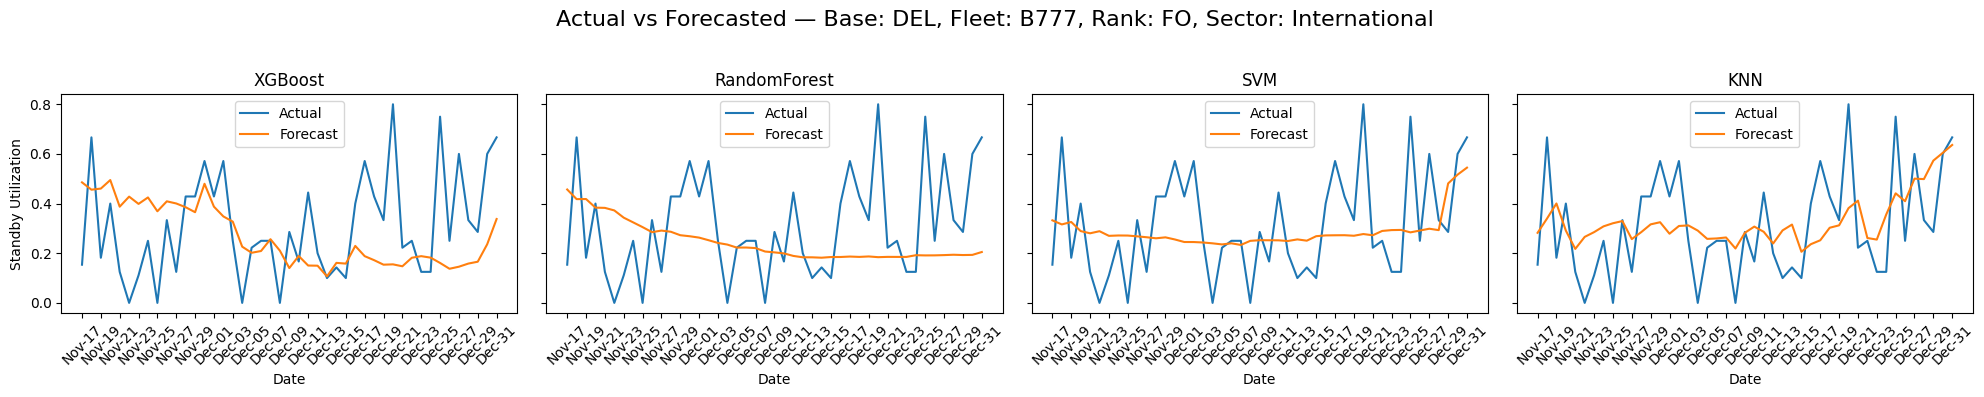

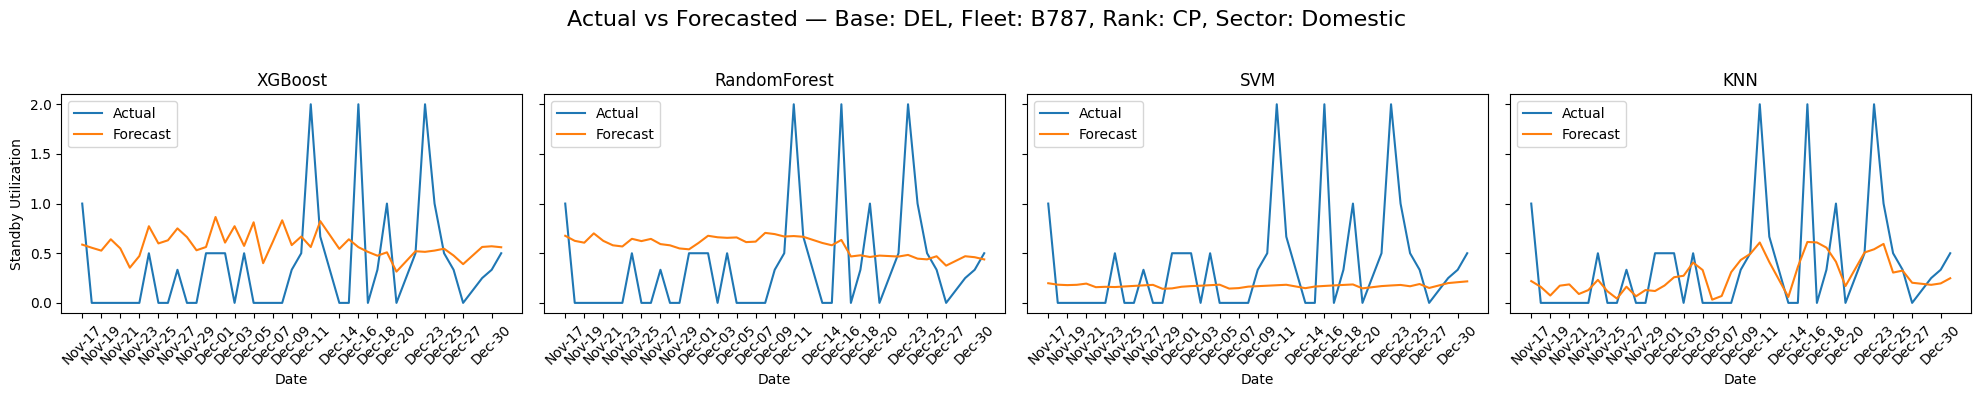

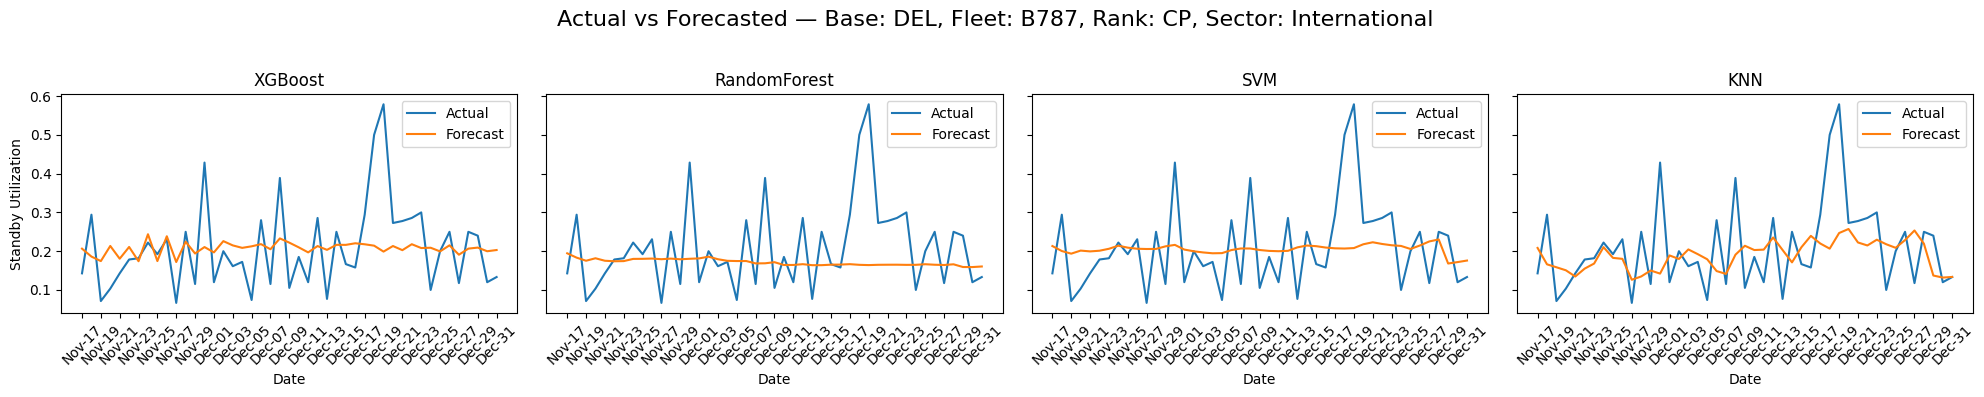

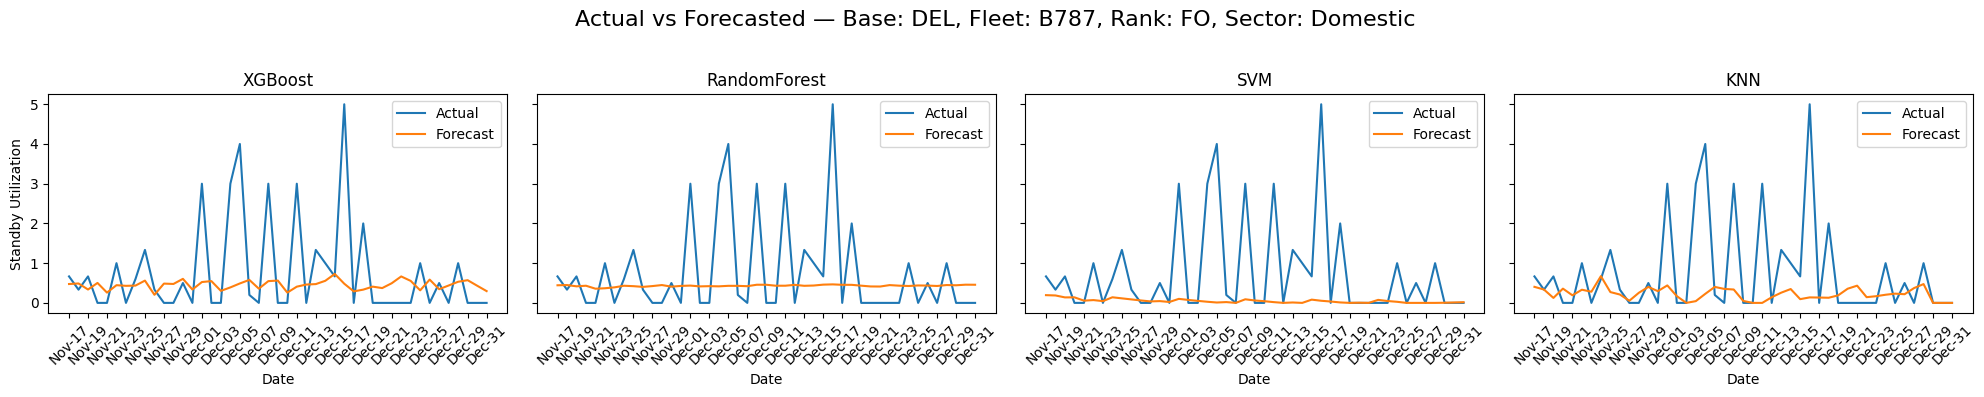

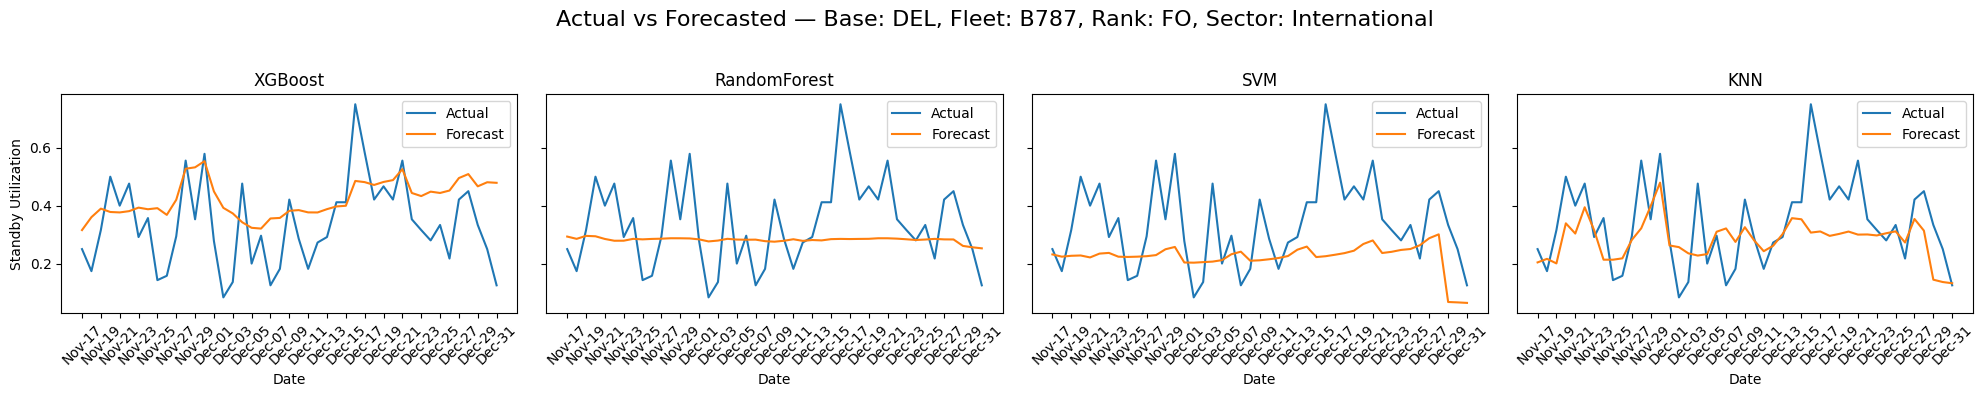

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_forecast_vs_actual(df, output_folder='forecast_plots'):
    os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist
    combinations = df[['base', 'fleet', 'rank', 'sector']].drop_duplicates()

    for _, row in combinations.iterrows():
        base = row['base']
        fleet = row['fleet']
        rank = row['rank']
        sector = row['sector']

        subset = df[(df['base'] == base) & (df['fleet'] == fleet) & (df['rank'] == rank) & (df['sector'] == sector)]
        models = subset['model'].unique()

        if len(models) == 0 or subset.empty:
            continue

        fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 4), sharey=True)
        fig.suptitle(f"Actual vs Forecasted — Base: {base}, Fleet: {fleet}, Rank: {rank}, Sector: {sector}", fontsize=16)

        if len(models) == 1:
            axes = [axes]

        for ax, model in zip(axes, models):
            model_data = subset[subset['model'] == model].sort_values('date')
            dates = pd.to_datetime(model_data['date'].unique())
            alternate_dates = dates[::2]
            alternate_labels = alternate_dates.strftime('%b-%d')

            sns.lineplot(data=model_data, x='date', y='standby_utilization_per_fly', ax=ax, label='Actual')
            sns.lineplot(data=model_data, x='date', y='forecasted_utilization', ax=ax, label='Forecast')

            ax.set_title(f"{model}")
            ax.set_xlabel("Date")
            ax.set_ylabel("Standby Utilization")
            ax.set_xticks(alternate_dates)
            ax.set_xticklabels(alternate_labels, rotation=45)
            ax.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # Save the figure
        filename = f"{fleet}_{rank}_{sector}_{base}.png".replace(" ", "_")
        filepath = os.path.join(output_folder, filename)
        # plt.savefig(filepath)
        # plt.close(fig)  # Close to free memory
        plt.show()

# Example usage
# plot_forecast_vs_actual(merged_df)
plot_forecast_vs_actual(merged_df, output_folder=r'C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\plots\forecast_plots\new plots ml models without actual new row as well nn 6 p1 ')


In [107]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def group_error_summary(df):
    summary_list = []

    grouped = df.groupby(['base', 'fleet', 'rank', 'sector', 'model'])

    for group_keys, group_df in grouped:
        base, fleet, rank, sector, model = group_keys

        actual = group_df['standby_utilization_per_fly']
        forecast = group_df['forecasted_utilization']

        abs_error = np.abs(forecast - actual)
        perc_error = abs_error / actual.replace(0, np.nan)

        metrics = {
            'base': base,
            'fleet': fleet,
            'rank': rank,
            'sector': sector,
            'model': model,
            'RMSE': np.sqrt(np.mean((forecast - actual) ** 2)),
            'MAE': mean_absolute_error(actual, forecast),
            'MAPE': np.mean(perc_error) * 100,
            'R2': r2_score(actual, forecast),
            'StdDev': np.std(abs_error),
            'MAP': np.mean(np.abs(forecast))
        }

        summary_list.append(metrics)

    return pd.DataFrame(summary_list)

In [108]:
error_summary_grouped = group_error_summary(merged_df)

In [109]:
error_summary_grouped

base fleet rank         sector         model      RMSE       MAE  \
0    BOM  A320   CP       Domestic           KNN  0.014329  0.011095   
1    BOM  A320   CP       Domestic  RandomForest  0.021727  0.017267   
2    BOM  A320   CP       Domestic           SVM  0.024701  0.020109   
3    BOM  A320   CP       Domestic       XGBoost  0.023860  0.018458   
4    BOM  A320   CP  International           KNN  0.029148  0.023458   
..   ...   ...  ...            ...           ...       ...       ...   
115  DEL  B787   FO       Domestic       XGBoost  0.494983  0.396426   
116  DEL  B787   FO  International           KNN  0.053499  0.042906   
117  DEL  B787   FO  International  RandomForest  0.055347  0.045278   
118  DEL  B787   FO  International           SVM  0.054339  0.045811   
119  DEL  B787   FO  International       XGBoost  0.057380  0.045447   

          MAPE        R2    StdDev       MAP  
0    39.687228  0.445625  0.009068  0.035662  
1    67.099745 -0.274559  0.013188  0.038084  
2    94.150931 -0.647317  0.014344  0.052893  
3    62.297816 -0.537109  0.015120  0.032303  
4    84.231502 -0.405717  0.017301  0.040559  
..         ...       ...       ...       ...  
115  65.114137 -0.082377  0.296402  0.292927  
116  52.146561  0.036416  0.031956  0.068584  
117  62.473972 -0.031303  0.031831  0.074856  
118  64.860492  0.005937  0.029224  0.079030  
119  56.673125 -0.108468  0.035030  0.067811  

[120 rows x 11 columns]

In [116]:
def rank_models(summary_df):
    ranked_models = []

    # Group by fleet, base, rank, sector
    grouped = summary_df.groupby(['fleet', 'base', 'rank', 'sector'])

    for group_keys, group_df in grouped:
        scores = {}
        for _, row in group_df.iterrows():
            model = row['model']
            # Combine metrics: lower RMSE and MAPE are better, higher R2 is better
            # score = row['RMSE'] #+ (-row['MAPE']) + row['R2']
            score = row['MAPE']
            scores[model] = score

        # Select model with lowest score
        best_model = min(scores, key=scores.get)

        # Assign best model to each row in the group
        for idx in group_df.index:
            ranked_models.append({
                'fleet': group_keys[0],
                'base': group_keys[1],
                'rank': group_keys[2],
                'sector': group_keys[3],
                'best_model': best_model
            })

    # Convert to DataFrame and merge with original summary
    best_model_df = pd.DataFrame(ranked_models)
    summary_df = pd.merge(summary_df, best_model_df, on=['fleet', 'base', 'rank', 'sector'], how='left')
    return summary_df

In [117]:
ranked_summary = rank_models(error_summary_grouped)

In [118]:
ranked_summary

base fleet rank         sector         model      RMSE       MAE  \
0    BOM  A320   CP       Domestic           KNN  0.014329  0.011095   
1    BOM  A320   CP       Domestic           KNN  0.014329  0.011095   
2    BOM  A320   CP       Domestic           KNN  0.014329  0.011095   
3    BOM  A320   CP       Domestic           KNN  0.014329  0.011095   
4    BOM  A320   CP       Domestic  RandomForest  0.021727  0.017267   
..   ...   ...  ...            ...           ...       ...       ...   
475  DEL  B787   FO  International           SVM  0.054339  0.045811   
476  DEL  B787   FO  International       XGBoost  0.057380  0.045447   
477  DEL  B787   FO  International       XGBoost  0.057380  0.045447   
478  DEL  B787   FO  International       XGBoost  0.057380  0.045447   
479  DEL  B787   FO  International       XGBoost  0.057380  0.045447   

          MAPE        R2    StdDev       MAP best_model  
0    39.687228  0.445625  0.009068  0.035662        KNN  
1    39.687228  0.445625  0.009068  0.035662        KNN  
2    39.687228  0.445625  0.009068  0.035662        KNN  
3    39.687228  0.445625  0.009068  0.035662        KNN  
4    67.099745 -0.274559  0.013188  0.038084        KNN  
..         ...       ...       ...       ...        ...  
475  64.860492  0.005937  0.029224  0.079030        KNN  
476  56.673125 -0.108468  0.035030  0.067811        KNN  
477  56.673125 -0.108468  0.035030  0.067811        KNN  
478  56.673125 -0.108468  0.035030  0.067811        KNN  
479  56.673125 -0.108468  0.035030  0.067811        KNN  

[480 rows x 12 columns]

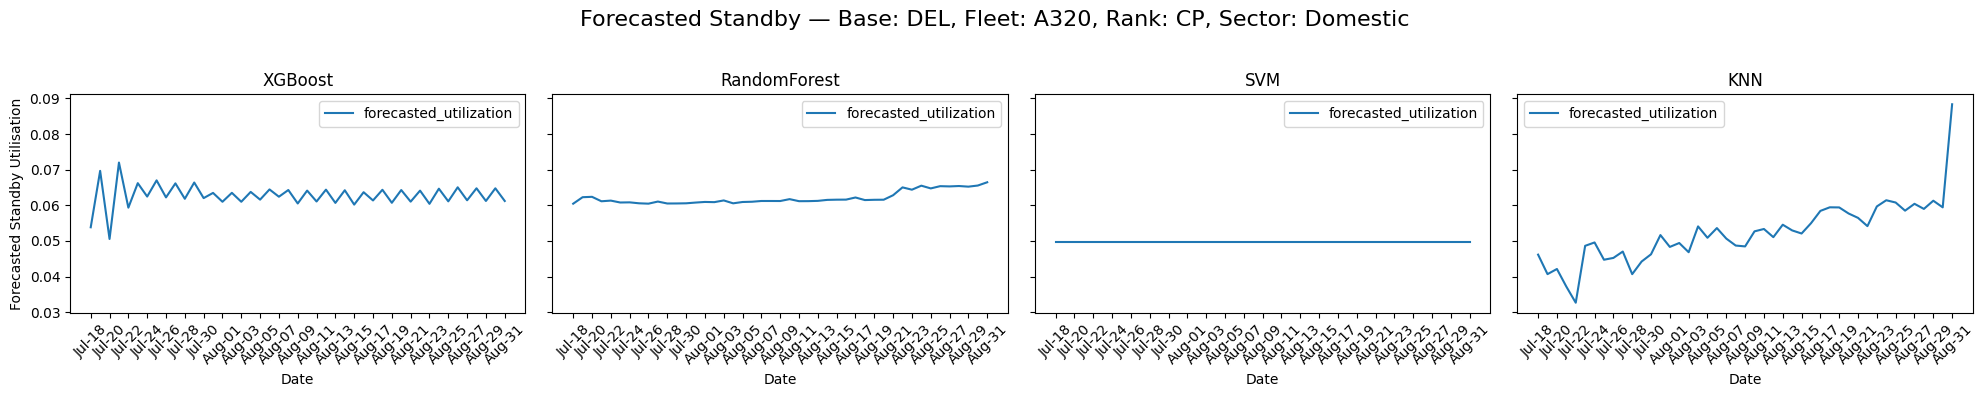

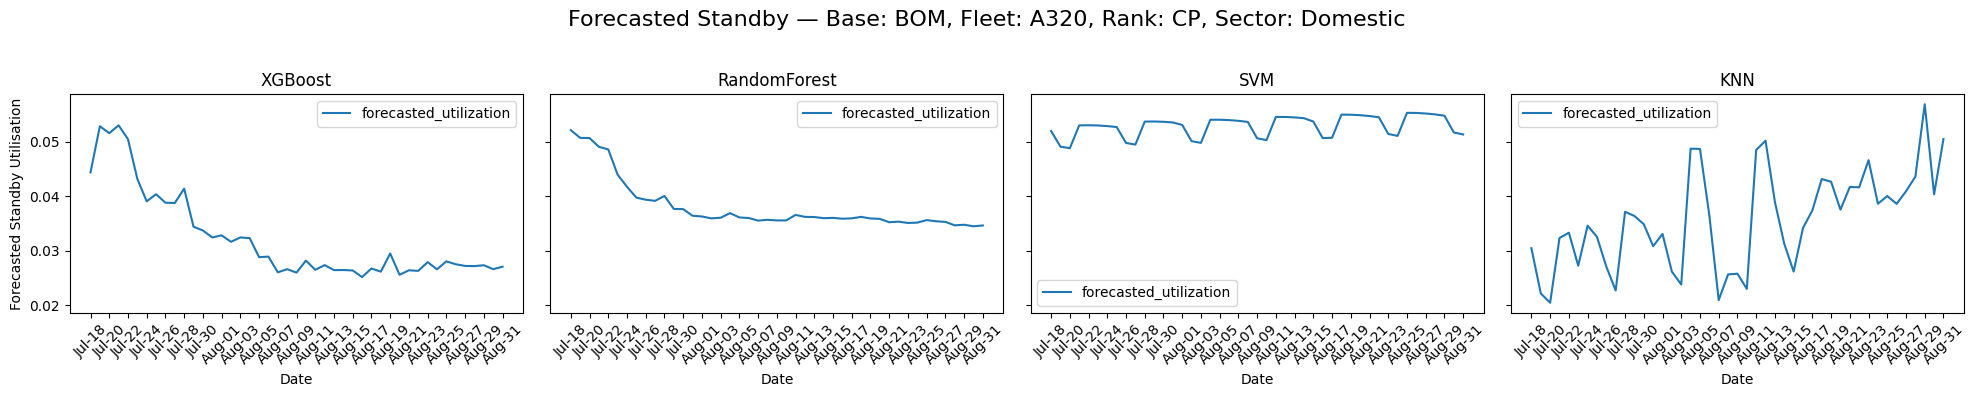

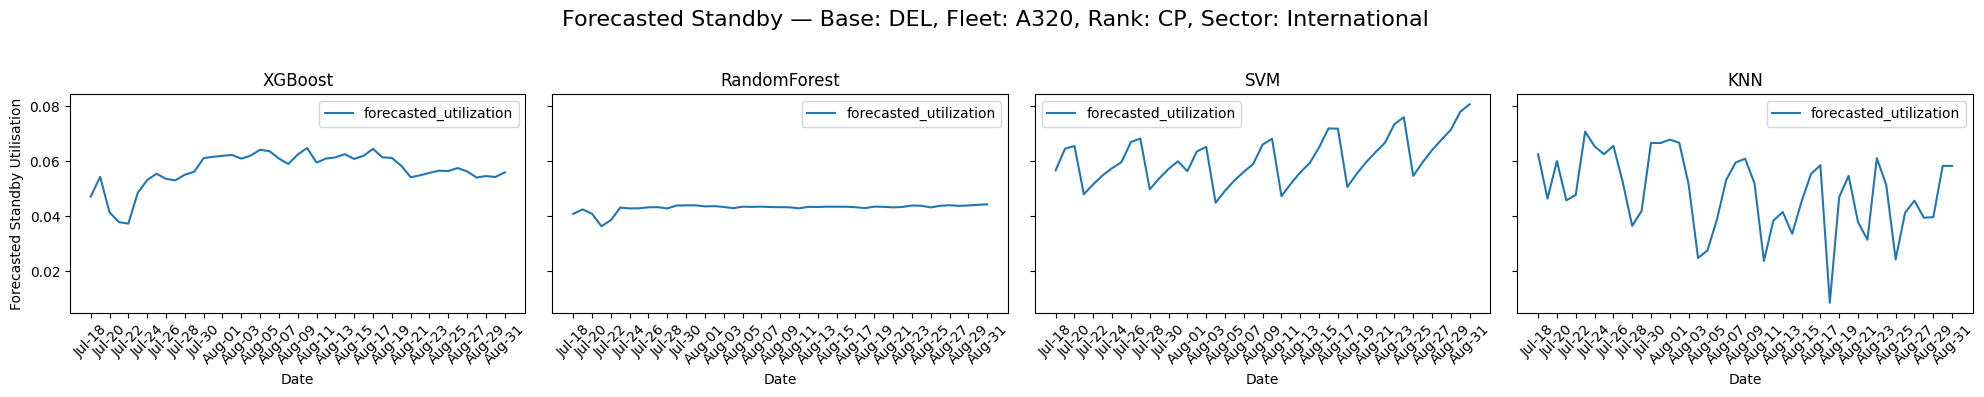

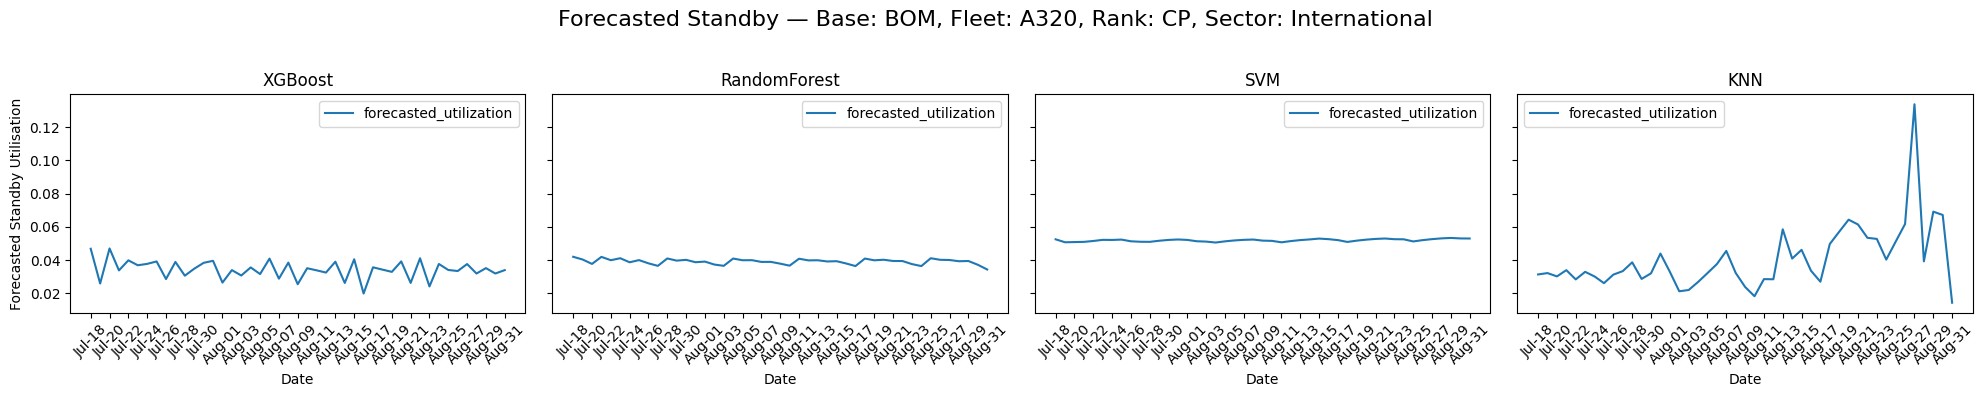

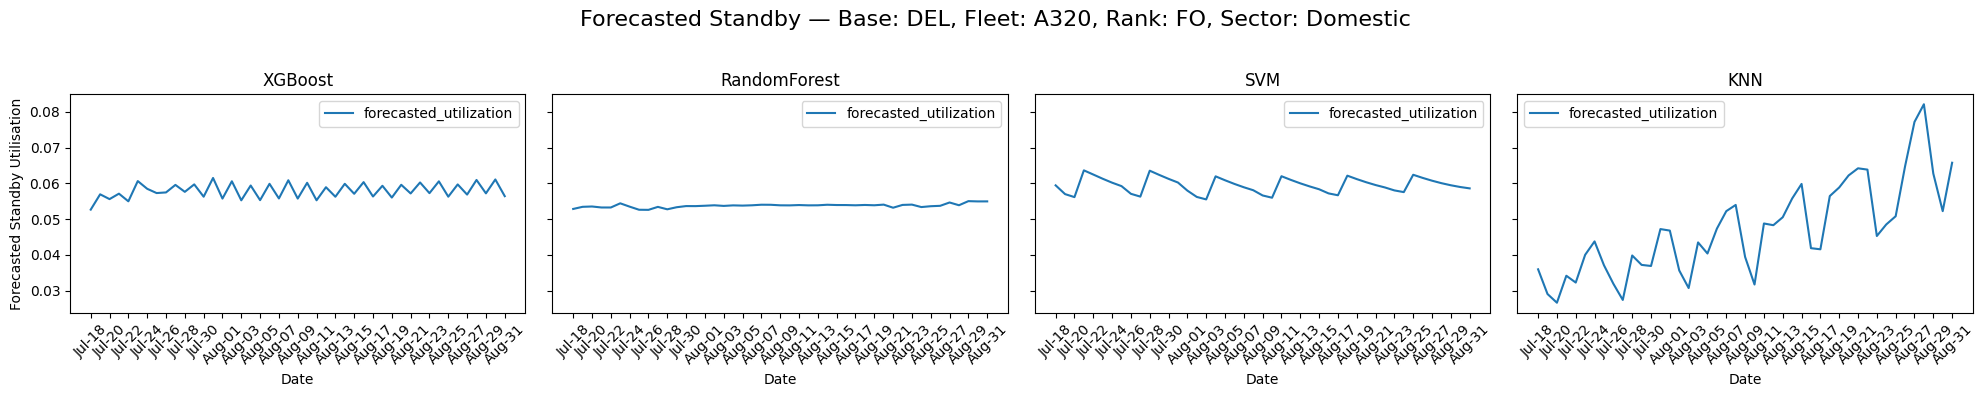

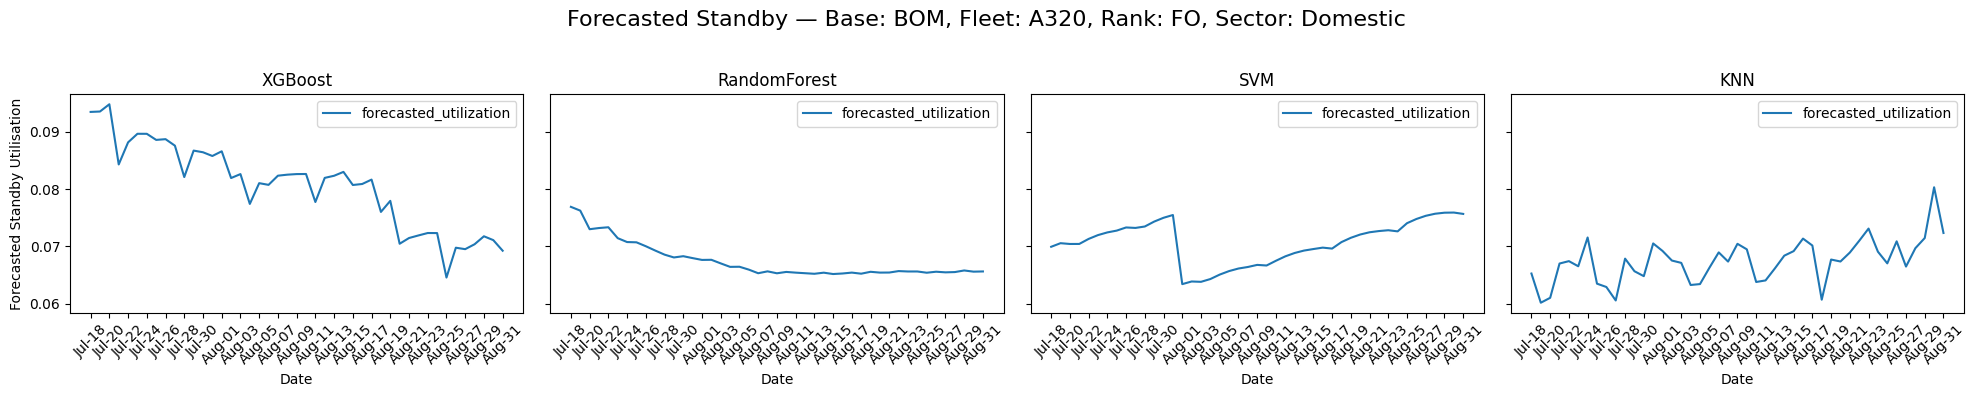

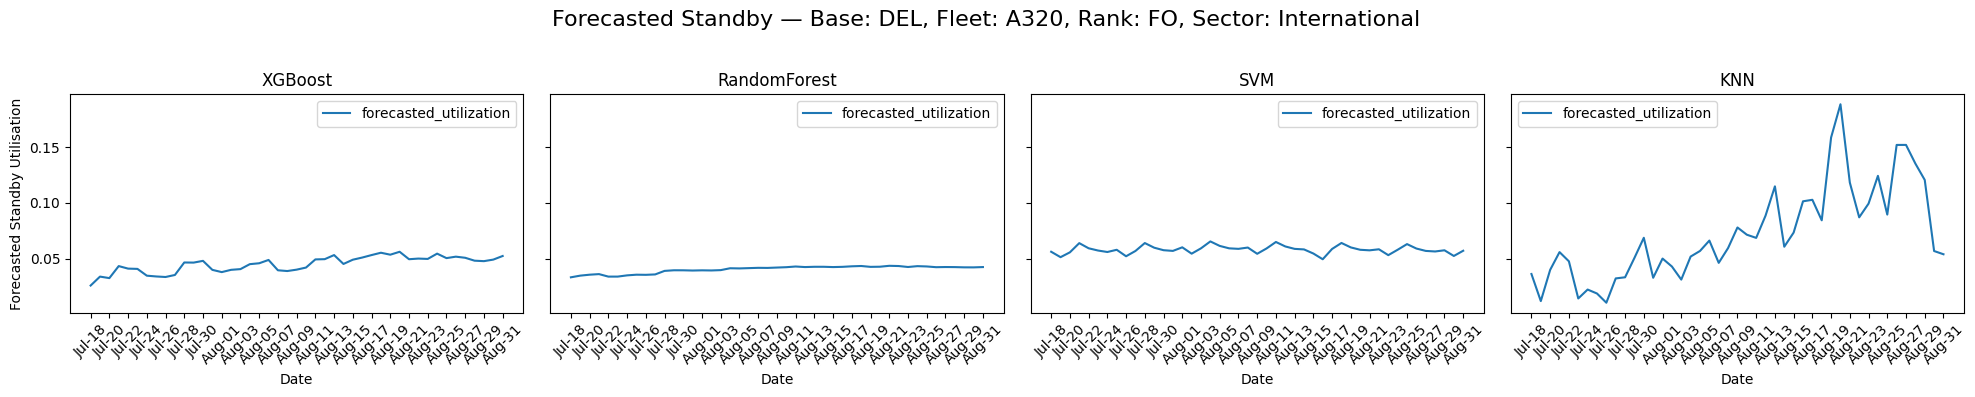

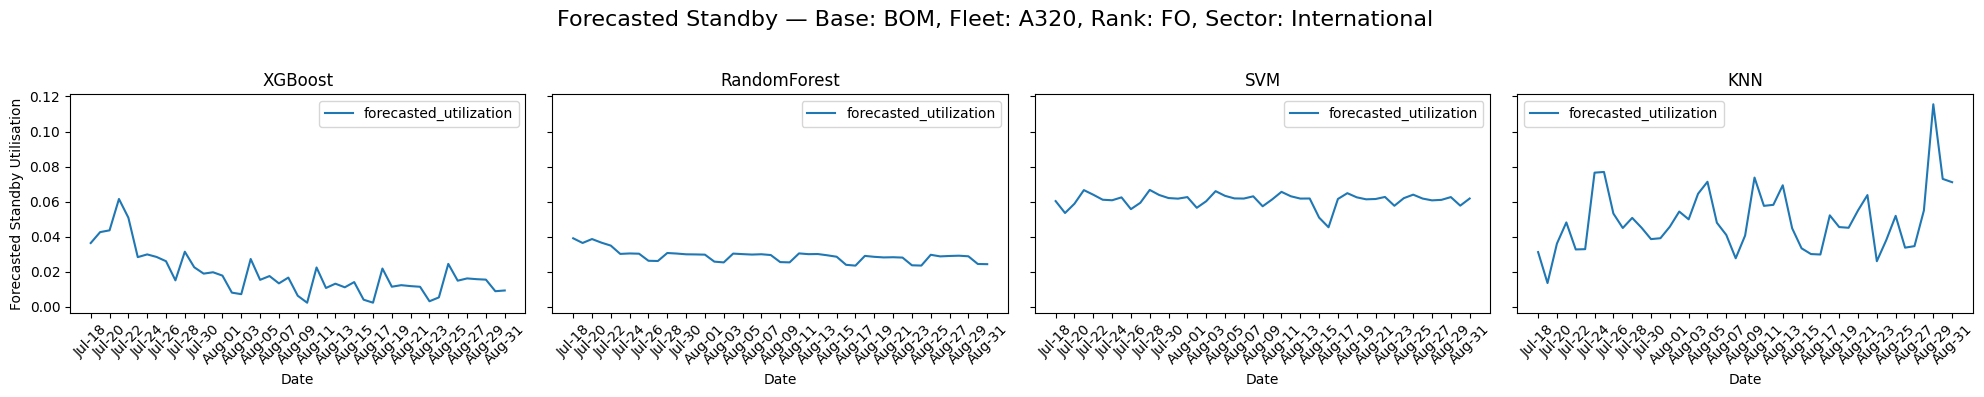

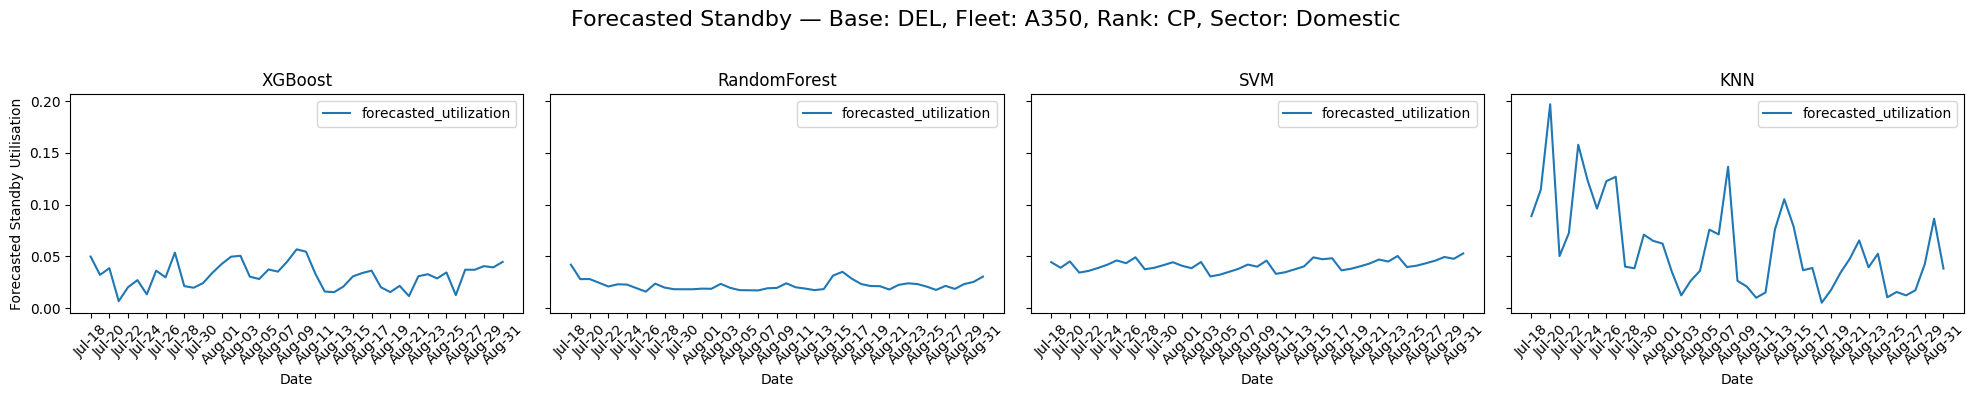

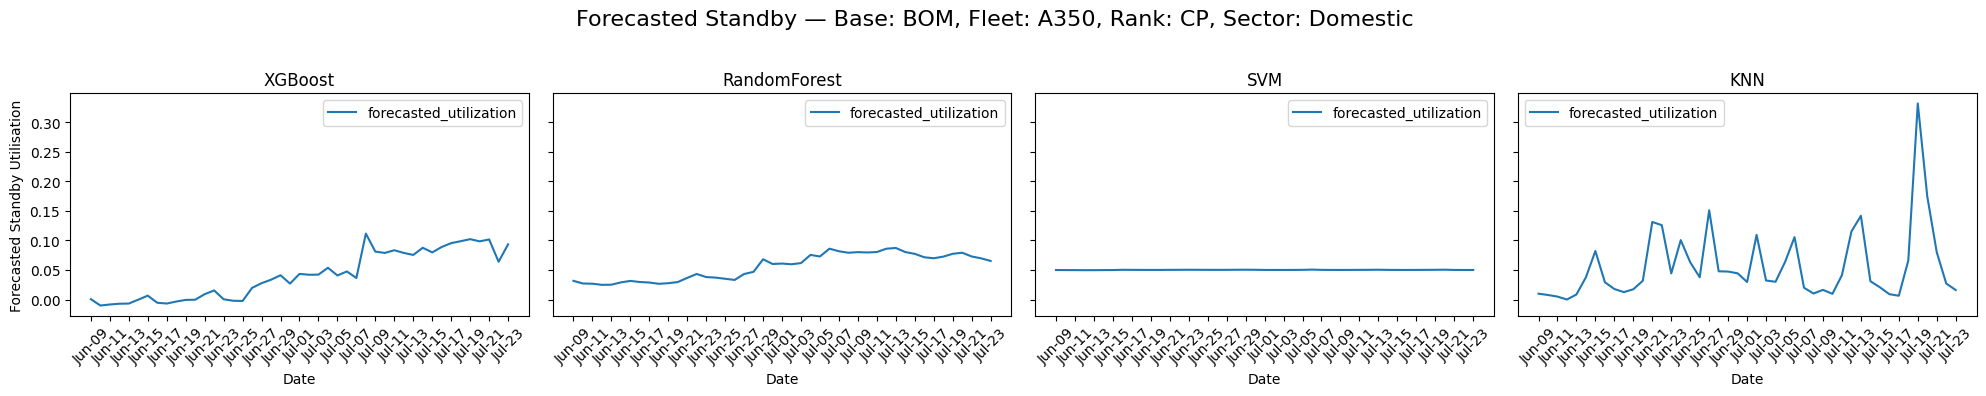

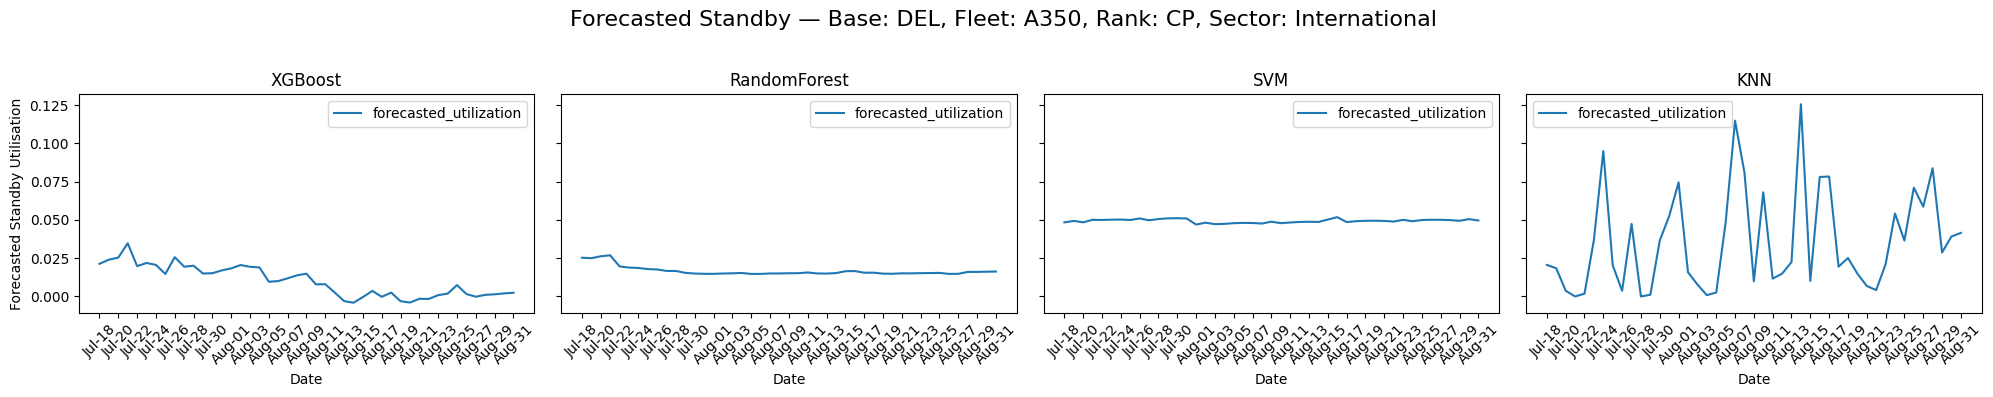

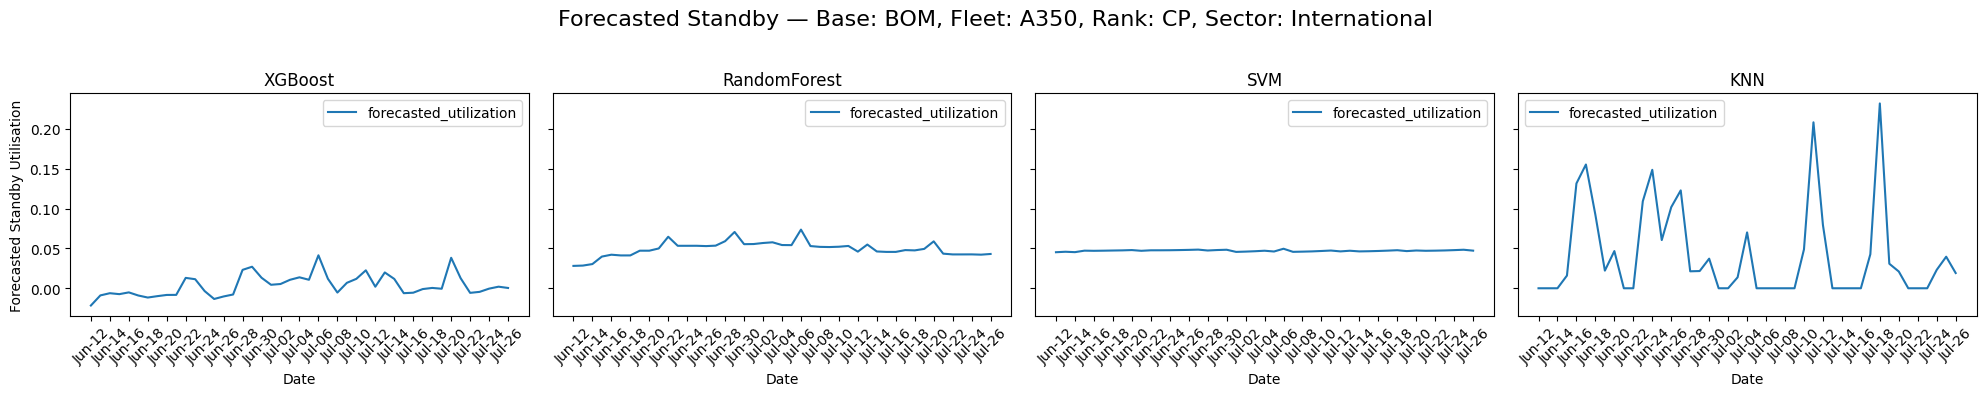

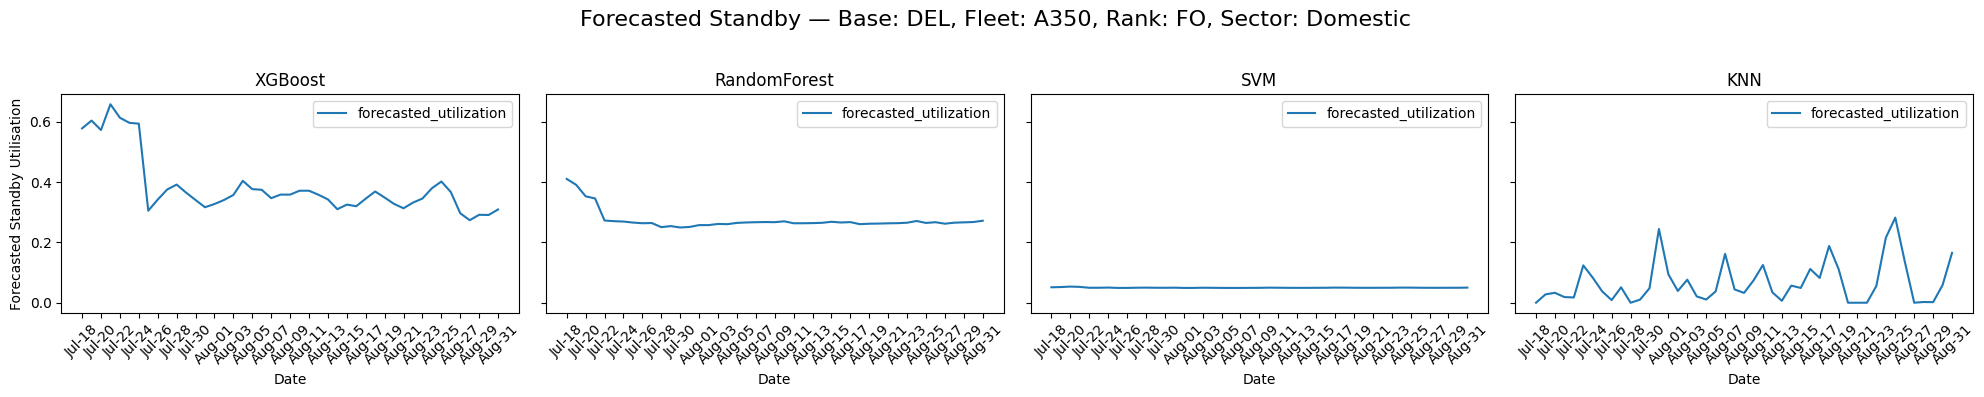

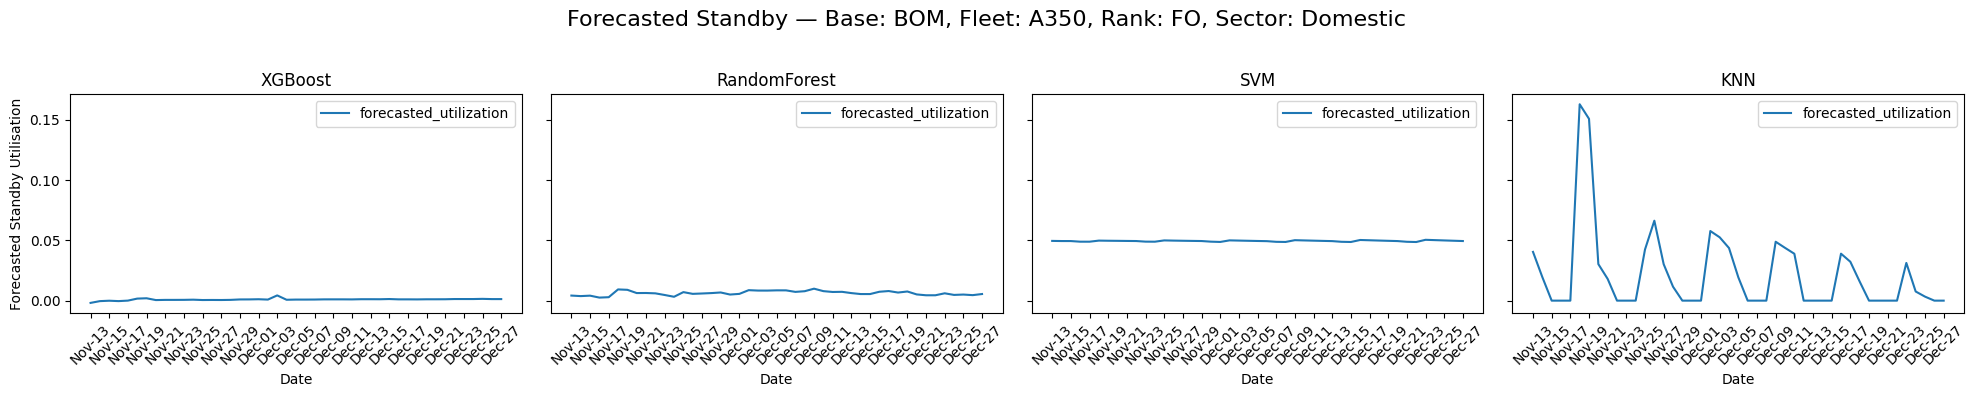

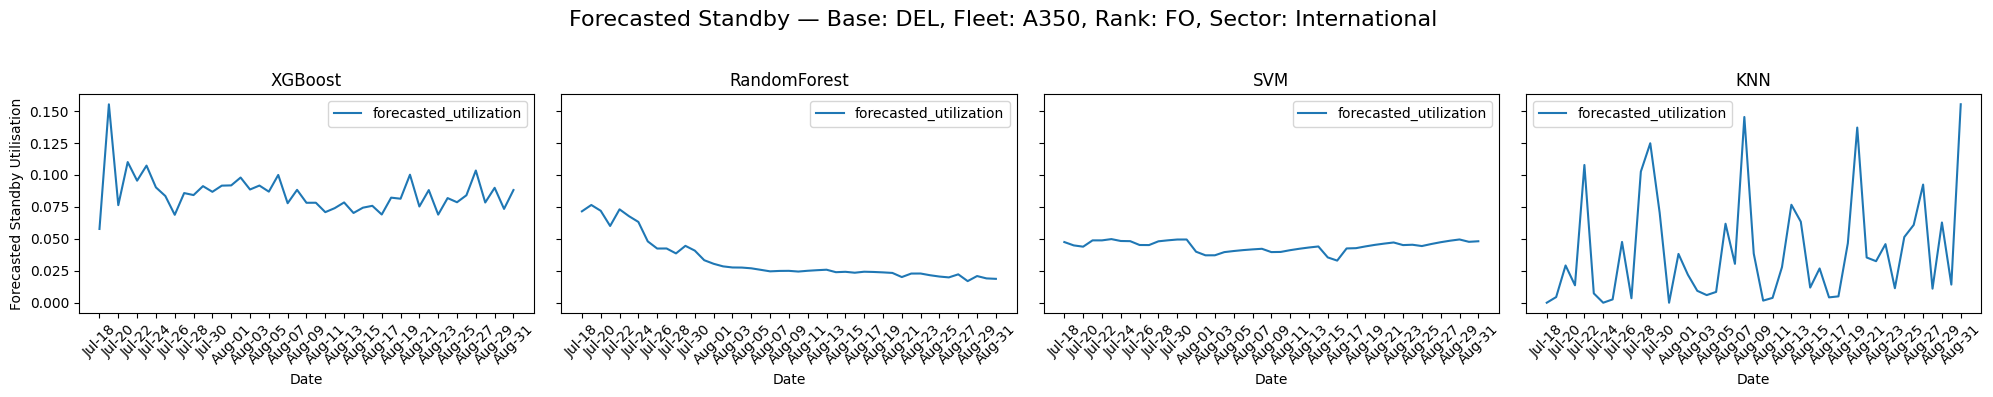

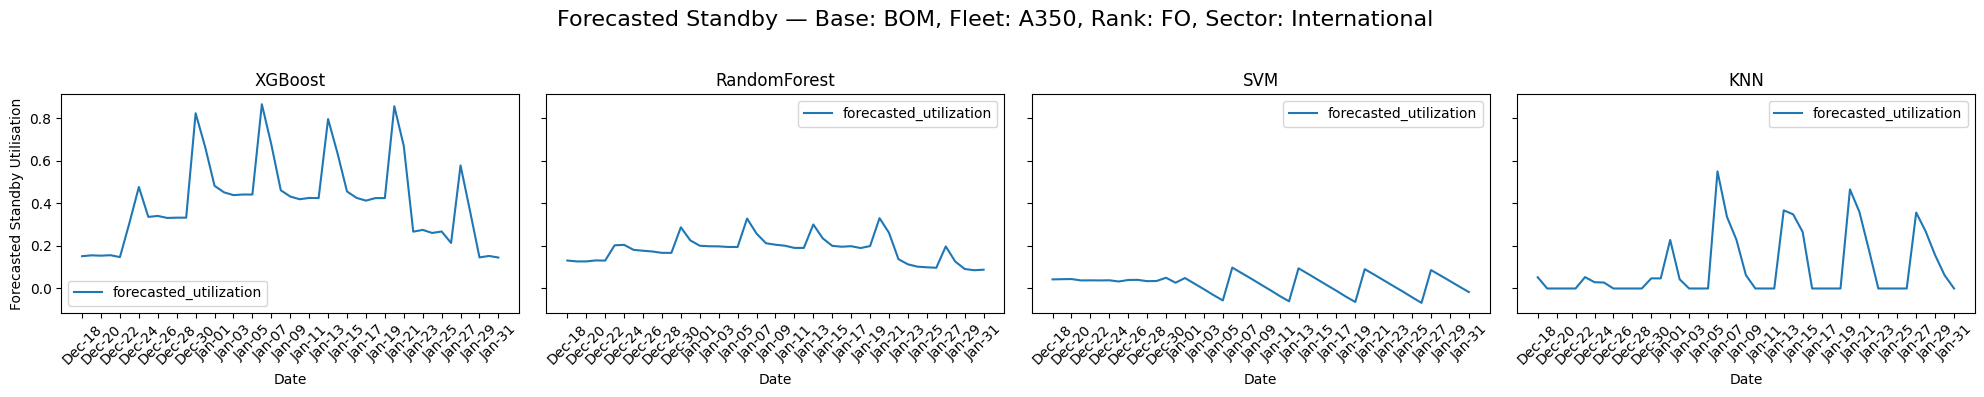

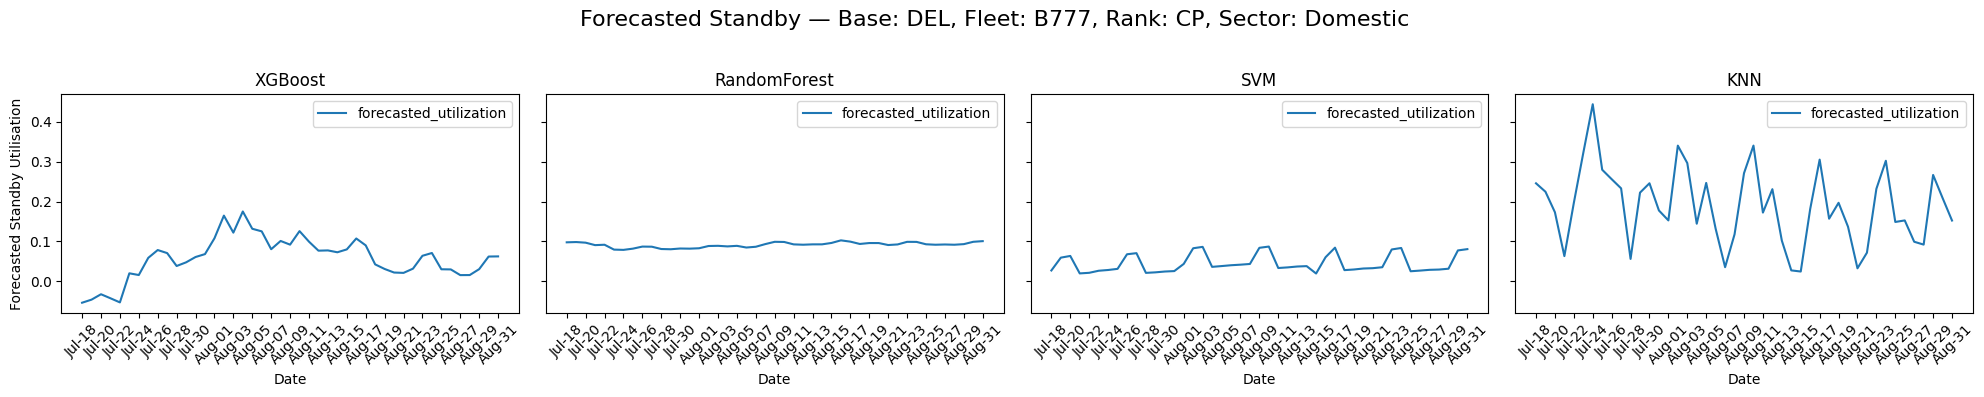

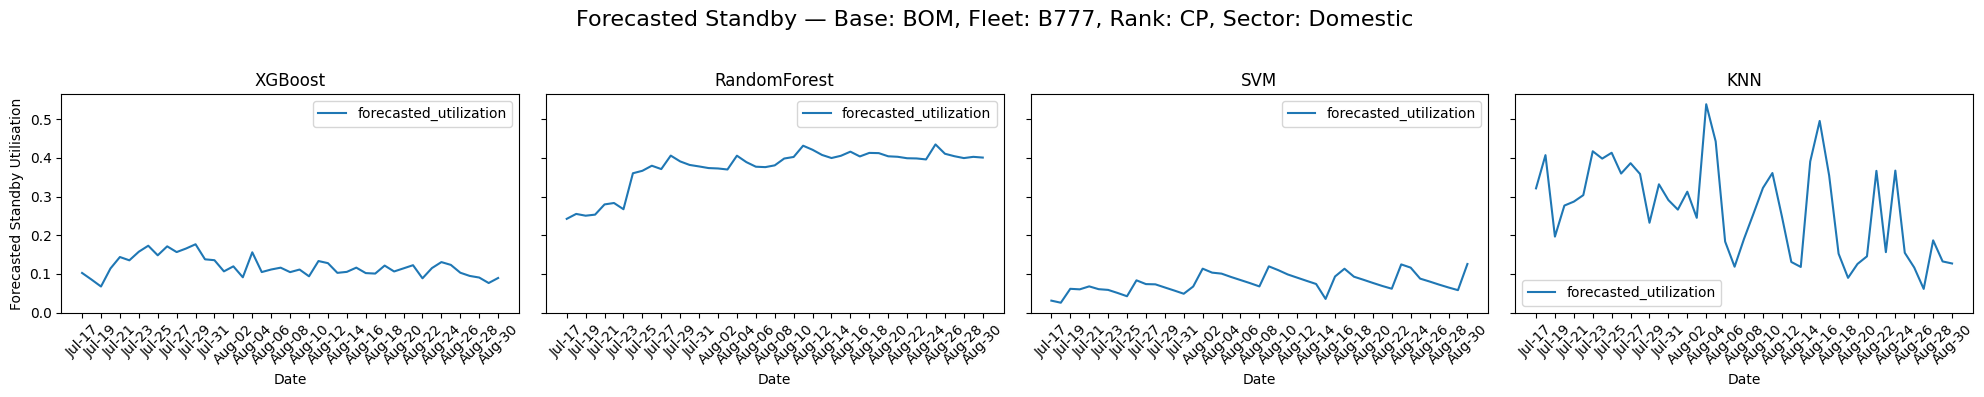

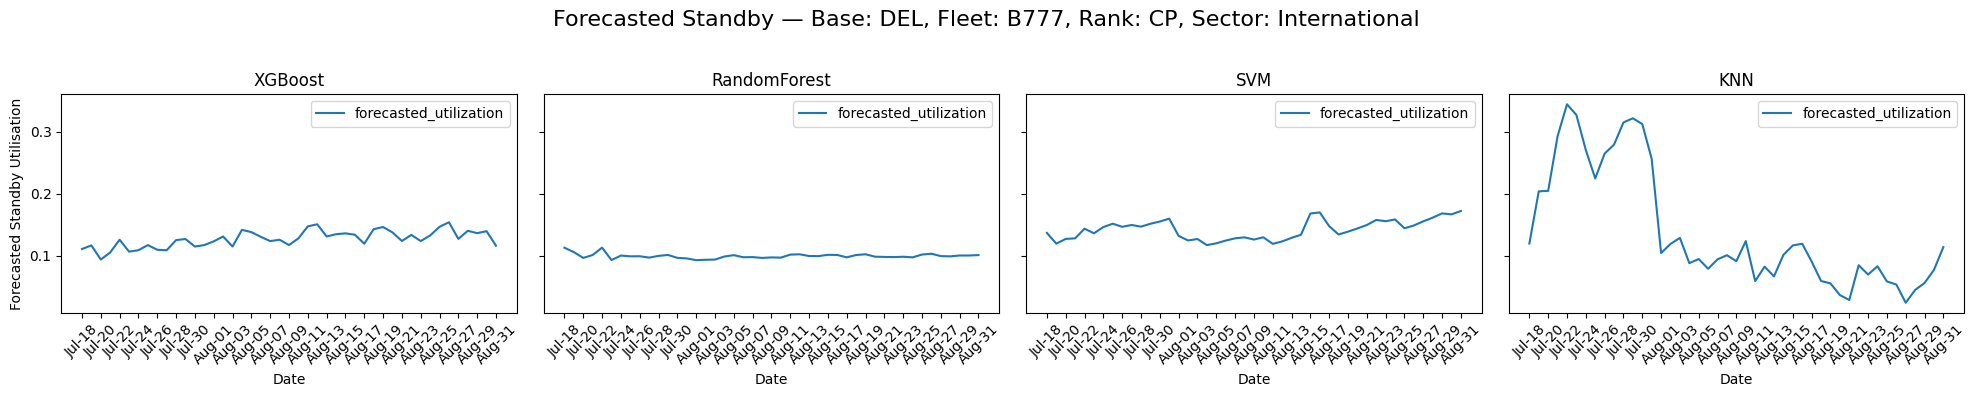

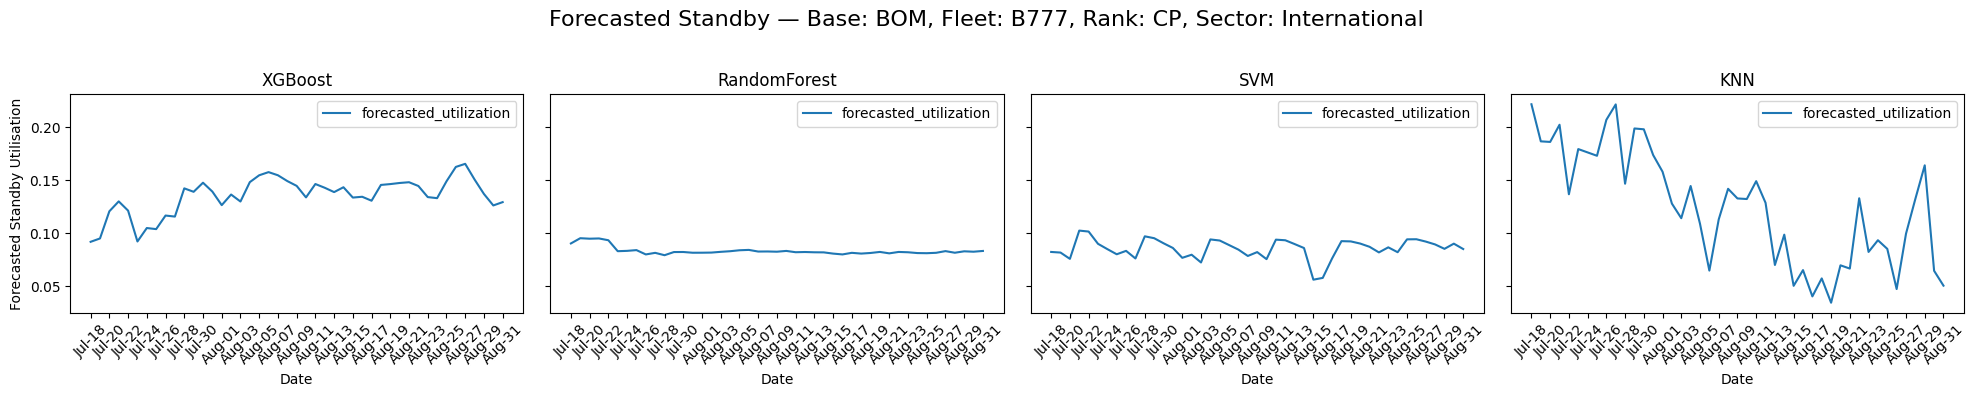

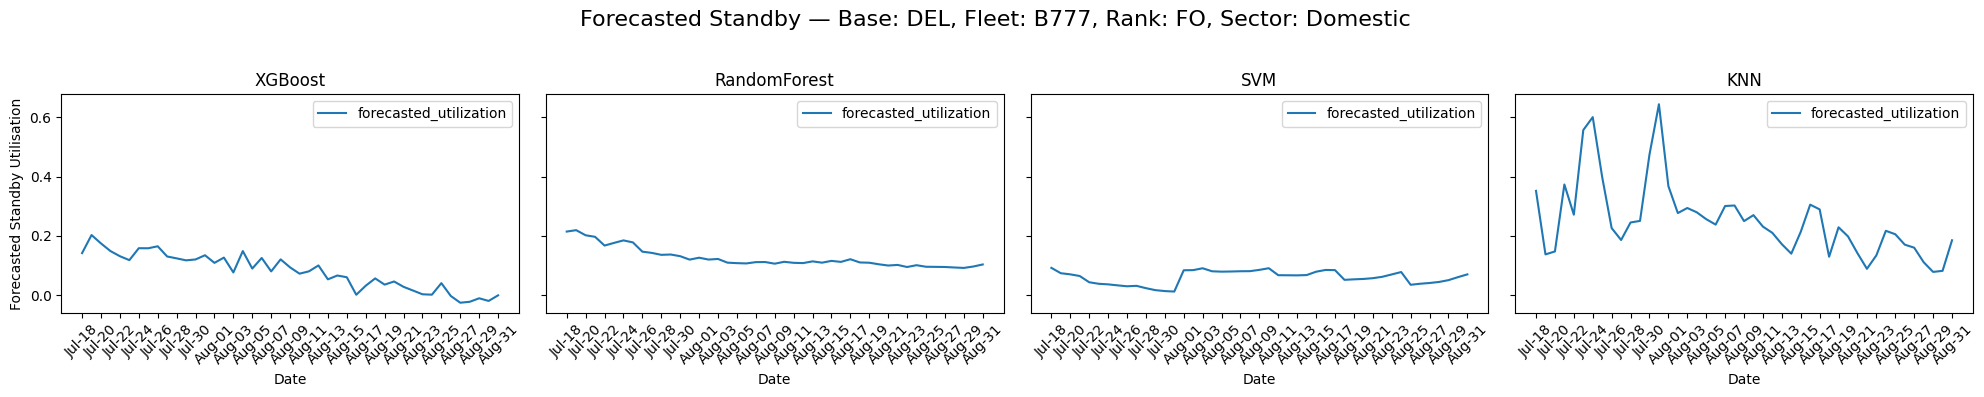

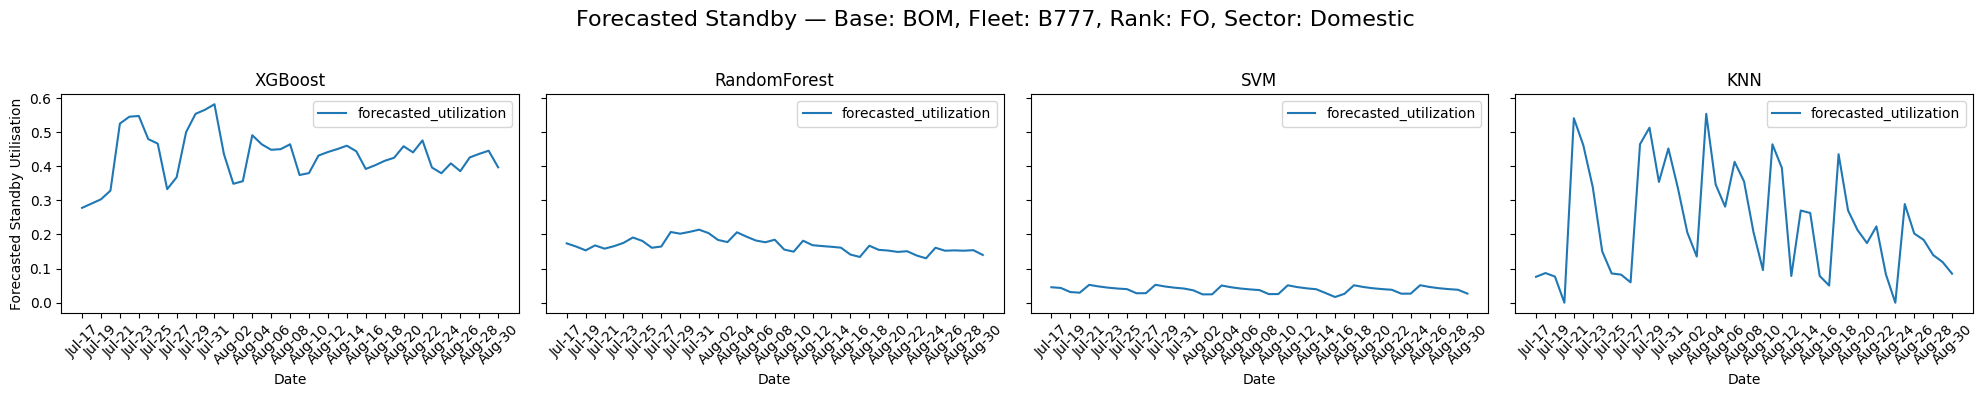

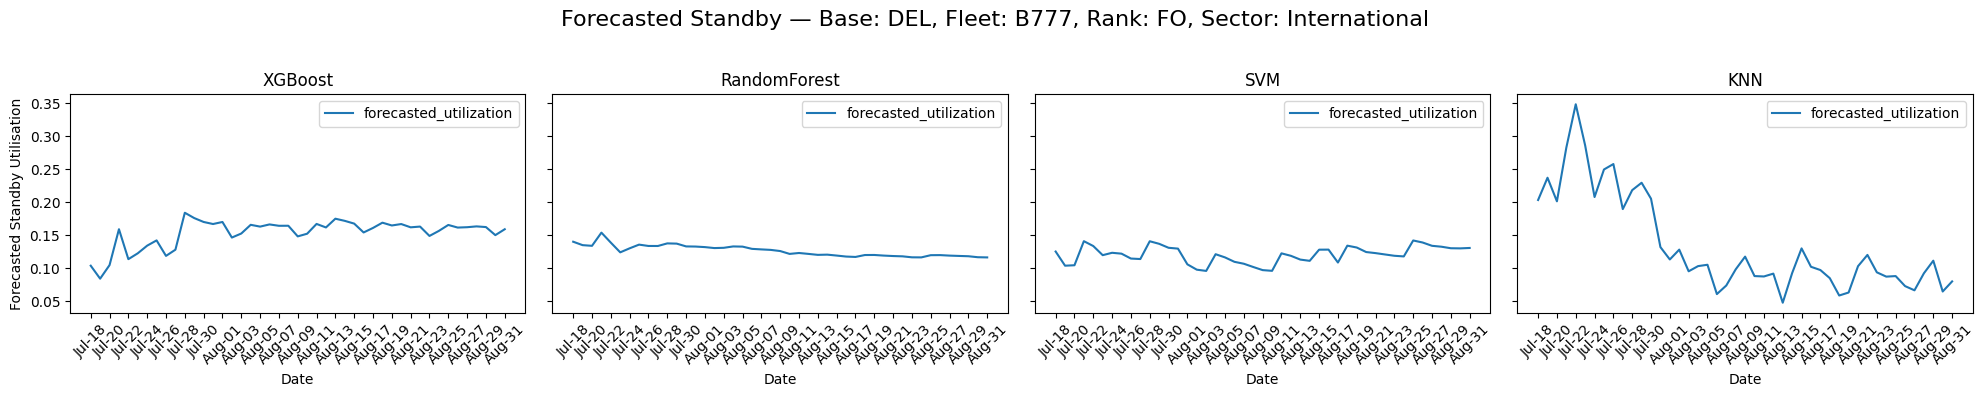

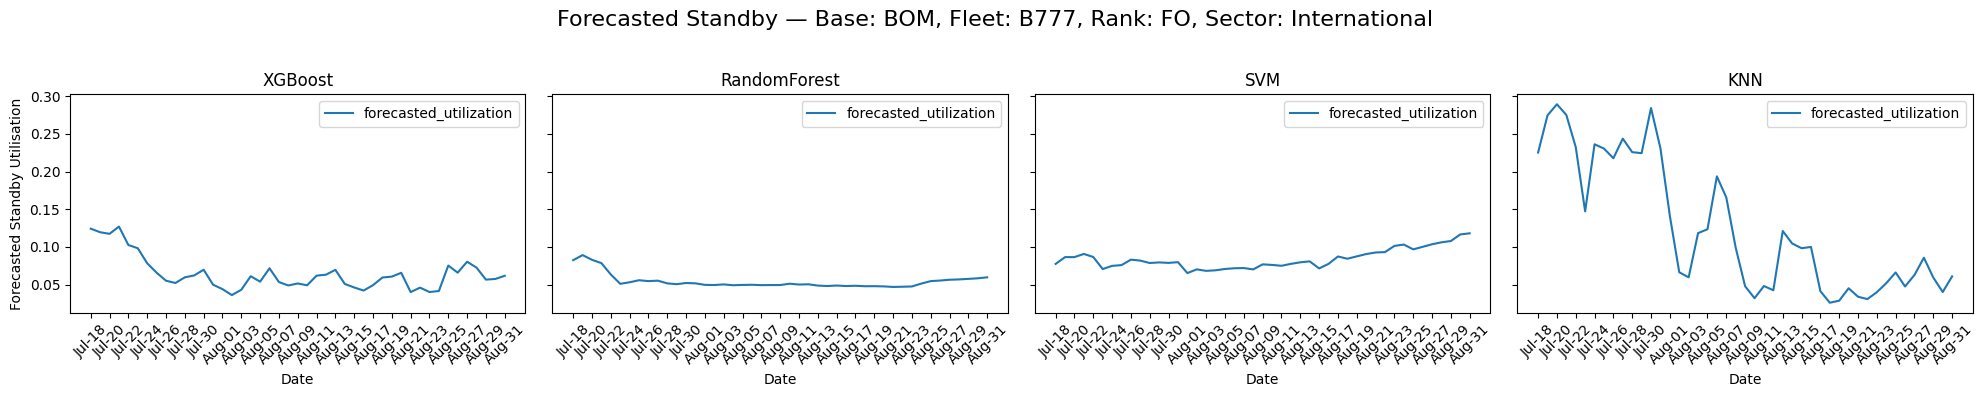

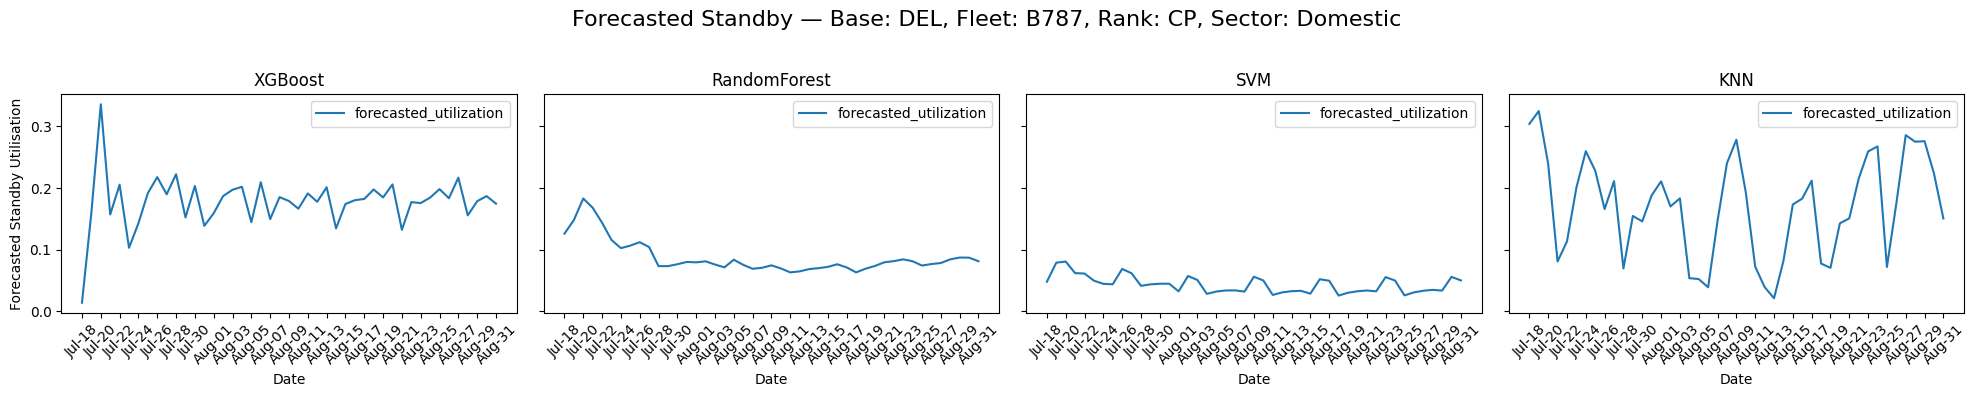

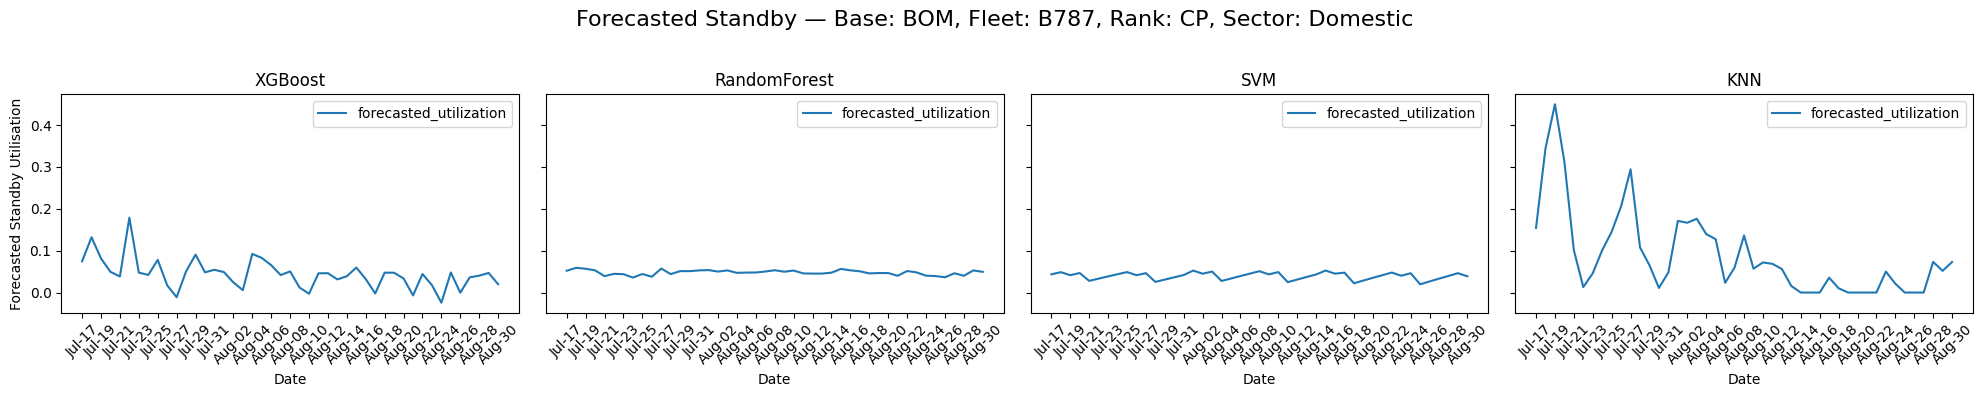

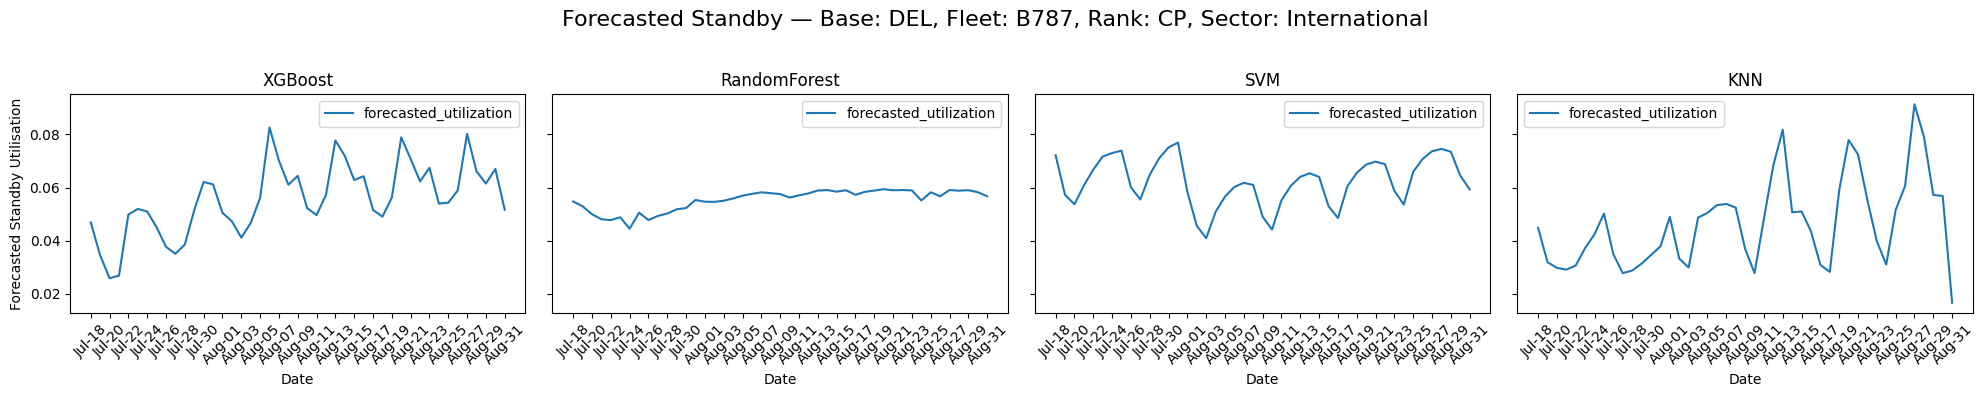

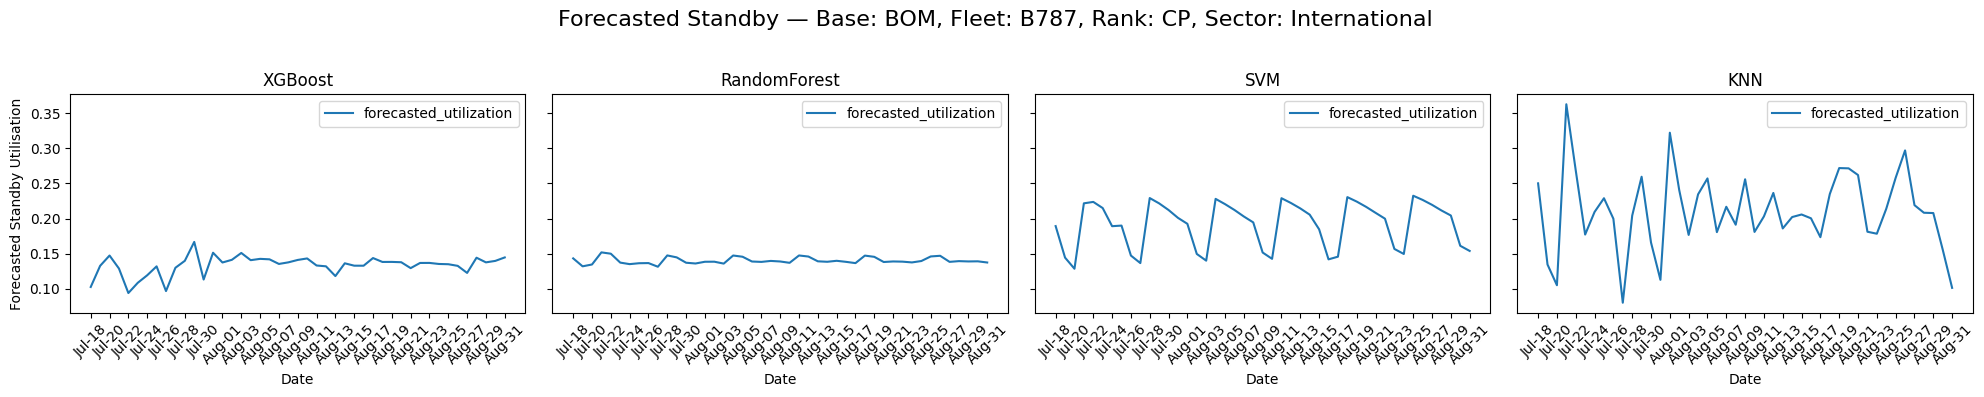

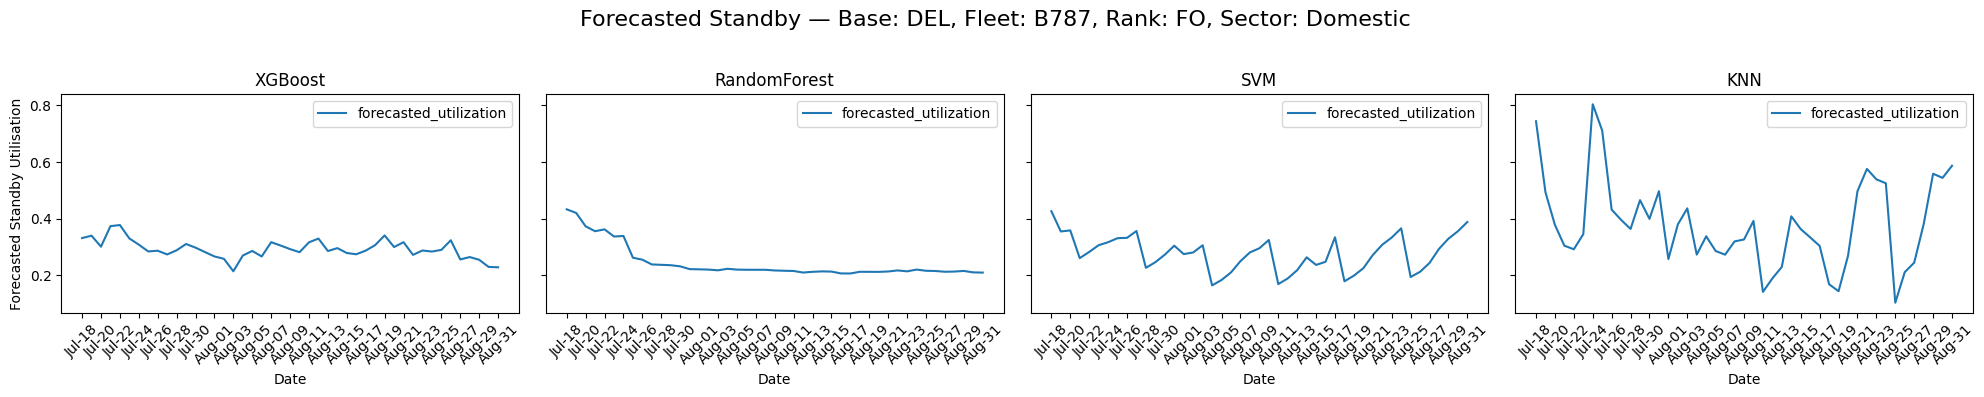

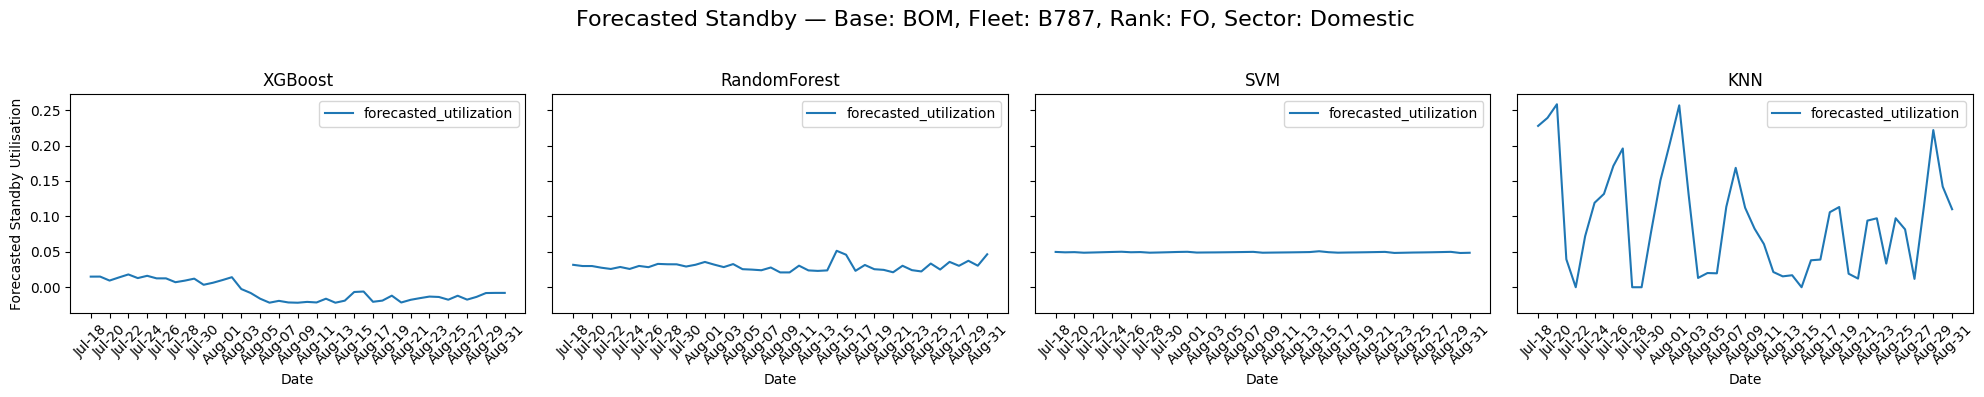

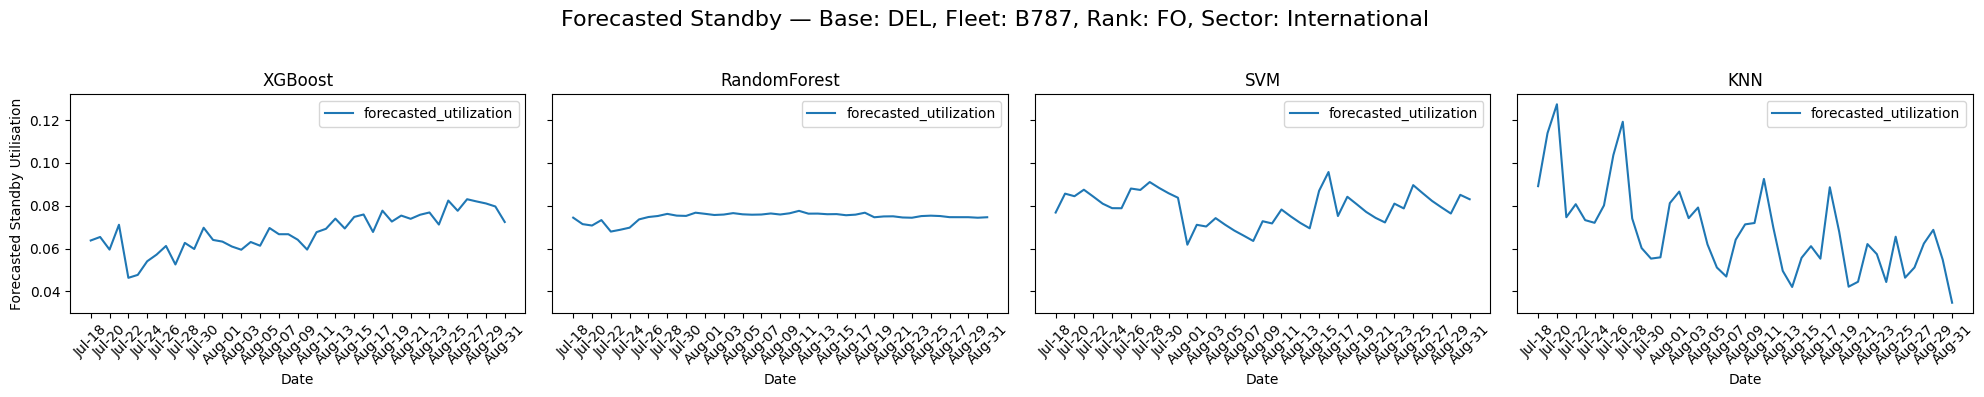

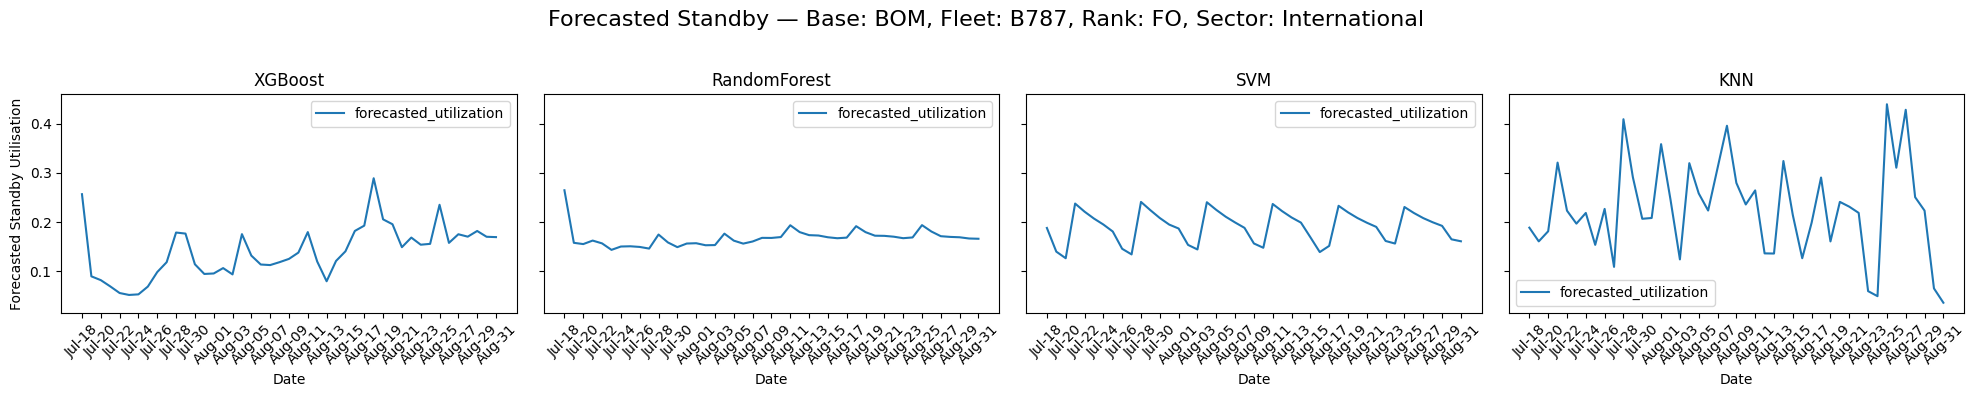

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_forecast_only(df):
    combinations = df[['base', 'fleet', 'rank', 'sector']].drop_duplicates()

    for _, row in combinations.iterrows():
        base = row['base']
        fleet = row['fleet']
        rank = row['rank']
        sector = row['sector']

        subset = df[(df['base'] == base) & (df['fleet'] == fleet) & (df['rank'] == rank) & (df['sector'] == sector)]
        models = subset['model'].unique()

        if len(models) == 0 or subset.empty:
            continue  # Skip empty combinations

        fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 4), sharey=True)
        fig.suptitle(f"Forecasted Standby — Base: {base}, Fleet: {fleet}, Rank: {rank}, Sector: {sector}", fontsize=16)

        if len(models) == 1:
            axes = [axes]  # Make iterable for one subplot

        for ax, model in zip(axes, models):
            model_data = subset[subset['model'] == model].sort_values('date')
            dates = model_data['date'].unique()
            formatted_dates = pd.to_datetime(dates).strftime('%b-%d')

            sns.lineplot(
                data=model_data.set_index('date')[['forecasted_utilization']],
                ax=ax
            )
            ax.set_title(f"{model}")
            ax.set_xlabel("Date")
            ax.set_ylabel("Forecasted Standby Utilisation")

            alternate_dates = dates[::2]  # Take every second date
            alternate_labels = pd.to_datetime(alternate_dates).strftime('%b-%d')
            ax.set_xticks(alternate_dates)
            ax.set_xticklabels(alternate_labels, rotation=45)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Example usage:
plot_forecast_only(forecast_output_df)

## Raw Model

## Model Output

In [64]:
forecast_output_df.head()

date  forecasted_utilization  actual_utilization base fleet    model  \
0 2025-07-17                0.054598            0.032143  DEL  A320  XGBoost   
1 2025-07-17                0.054598            0.038462  DEL  A320  XGBoost   
2 2025-07-17                0.054598            0.053292  DEL  A320  XGBoost   
3 2025-07-17                0.054598            0.072727  DEL  A320  XGBoost   
4 2025-07-18                0.054598            0.054545  DEL  A320  XGBoost   

  rank         sector  planned_fly  planned_standby  actual_standby_used  \
0   FO       Domestic        280.0              6.0                  9.0   
1   FO  International         52.0              2.0                  2.0   
2   CP       Domestic        319.0              9.0                 17.0   
3   CP  International         55.0              3.0                  4.0   
4   CP  International         55.0              3.0                  3.0   

   forecasted_standby  percentage_error  
0                  16         69.860317  
1                   3         41.954693  
2                  18          2.451464  
3                   4         24.927806  
4                   4          0.096258

In [18]:
forecast_output_df.loc[np.isinf(forecast_output_df["actual_utilization"]), "actual_utilization"] = 0

In [19]:
forecast_output_df_copy = forecast_output_df

In [20]:
forecast_output_df.loc[forecast_output_df['forecasted_utilization']<0 , 'forecasted_utilization'] = 0

## Plots

## Max of XG and RF graph

In [65]:
merged.columns

NameError: name 'merged' is not defined

In [42]:
# forecast_output_df['model'].unique()

merged['min_xgb_rf'] = merged[['forecasted_utilization_xgb', 'forecasted_utilization_rf']].min(axis=1)
merged['max_xgb_rf'] = merged[['forecasted_utilization_xgb', 'forecasted_utilization_rf']].max(axis=1)
# XGBoost error
merged['squared_error_xgb'] = (merged['forecasted_utilization_xgb'] - merged['actual_utilization']) ** 2

# RandomForest error
merged['squared_error_rf'] = (merged['forecasted_utilization_rf'] - merged['actual_utilization']) ** 2

# KNN error
merged['squared_error_knn'] = (merged['forecasted_utilization_knn'] - merged['actual_utilization']) ** 2

# SVM error
merged['squared_error_svm'] = (merged['forecasted_utilization_svm'] - merged['actual_utilization']) ** 2
merged['squared_error_max'] = (merged['max_xgb_rf'] - merged['actual_utilization']) ** 2
merged['squared_error_min'] = (merged['min_xgb_rf'] - merged['actual_utilization']) ** 2
merged['forecasted_standby_xgb'] = np.ceil(merged['forecasted_utilization_xgb'] * merged['planned_fly']).astype(int)
merged['forecasted_standby_rf'] = np.ceil(merged['forecasted_utilization_rf'] * merged['planned_fly']).astype(int)
merged['forecasted_standby_svm'] = np.ceil(merged['forecasted_utilization_svm'] * merged['planned_fly']).astype(int)
merged['forecasted_standby_knn'] = np.ceil(merged['forecasted_utilization_knn'] * merged['planned_fly']).astype(int)
merged

date base fleet model_xgb rank         sector  \
0    2025-07-17  DEL  A320   XGBoost   FO       Domestic   
1    2025-07-17  DEL  A320   XGBoost   FO  International   
2    2025-07-17  DEL  A320   XGBoost   CP       Domestic   
3    2025-07-17  DEL  A320   XGBoost   CP  International   
4    2025-07-18  DEL  A320   XGBoost   CP  International   
...         ...  ...   ...       ...  ...            ...   
1170 2025-08-30  BOM  B787   XGBoost   FO  International   
1171 2025-08-30  BOM  B787   XGBoost   FO       Domestic   
1172 2025-08-31  BOM  B787   XGBoost   FO  International   
1173 2025-08-31  BOM  B787   XGBoost   FO       Domestic   
1174 2025-08-31  BOM  B787   XGBoost   CP  International   

      forecasted_utilization_xgb  actual_utilization  planned_fly  \
0                       0.039758            0.032143        280.0   
1                       0.035329            0.038462         52.0   
2                       0.042110            0.053292        319.0   
3                       0.043779            0.072727         55.0   
4                       0.044556            0.054545         55.0   
...                          ...                 ...          ...   
1170                    0.127673            0.071429         14.0   
1171                    0.007761            0.000000          2.0   
1172                    0.011042            0.000000         18.0   
1173                    0.002014            0.000000          0.0   
1174                    0.002227            0.000000         40.0   

      planned_standby  actual_standby_used      model_rf  \
0                 6.0                  9.0  RandomForest   
1                 2.0                  2.0  RandomForest   
2                 9.0                 17.0  RandomForest   
3                 3.0                  4.0  RandomForest   
4                 3.0                  3.0  RandomForest   
...               ...                  ...           ...   
1170              0.0                  1.0  RandomForest   
1171              0.0                  0.0  RandomForest   
1172              0.0                  0.0  RandomForest   
1173              2.0                  0.0  RandomForest   
1174              2.0                  0.0  RandomForest   

      forecasted_utilization_rf model_x  forecasted_utilization_knn model_y  \
0                      0.035599     KNN                    0.036636     SVM   
1                      0.035174     KNN                    0.038943     SVM   
2                      0.040781     KNN                    0.054079     SVM   
3                      0.040283     KNN                    0.066647     SVM   
4                      0.042496     KNN                    0.048291     SVM   
...                         ...     ...                         ...     ...   
1170                   0.146090     KNN                    0.245516     SVM   
1171                   0.020253     KNN                    0.000000     SVM   
1172                   0.015581     KNN                    0.000000     SVM   
1173                   0.013226     KNN                    0.000000     SVM   
1174                   0.012797     KNN                    0.000000     SVM   

      forecasted_utilization_svm  min_xgb_rf  max_xgb_rf  squared_error_xgb  \
0                       0.035254    0.035599    0.039758           0.000058   
1                       0.039207    0.035174    0.035329           0.000010   
2                       0.055033    0.040781    0.042110           0.000125   
3                       0.058511    0.040283    0.043779           0.000838   
4                       0.052090    0.042496    0.044556           0.000100   
...                          ...         ...         ...                ...   
1170                    0.102940    0.127673    0.146090           0.003163   
1171                    0.000000    0.007761    0.020253           0.000060   
1172                    0.000000    0.011042    0.015581           0.000122   
1

## Error Summary

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

def group_error_summary(df, group_cols):
    summary_list = []

    grouped = df.groupby(group_cols)

    for group_keys, group_df in grouped:
        metrics = {'fleet': group_keys[0], 'base': group_keys[1], 'rank': group_keys[2] , 'sector': group_keys[3]}

        for model, col in {
            'xgb': 'forecasted_utilization_xgb',
            'rf': 'forecasted_utilization_rf',
            'knn': 'forecasted_utilization_knn',
            'svm': 'forecasted_utilization_svm'
        }.items():
            actual = group_df["actual_utilization"]
            forecast = group_df[col]

            
            abs_error = np.abs(group_df[col] - group_df['actual_utilization'])
            perc_error = abs_error / group_df['actual_utilization'].replace(0, np.nan)

            metrics[f'{model}_RMSE'] = np.sqrt(np.mean((group_df[col] - group_df['actual_utilization']) ** 2))
            metrics[f'{model}_MAP'] = np.mean(np.abs(group_df[col]))
            metrics[f'{model}_MAPE'] = np.mean(perc_error) * 100
            metrics[f'{model}_StdDev'] = np.std(abs_error)
            metrics[f'{model}_mae'] = mean_absolute_error(actual, forecast)
            metrics[f'{model}_r2'] = r2_score(actual, forecast)
            

        summary_list.append(metrics)

    return pd.DataFrame(summary_list)

# Run the summary function
error_summary_grouped = group_error_summary(merged, ['fleet', 'base', 'rank','sector'])

In [47]:
# error_summary_grouped

In [48]:
def rank_models(summary_df):
    model_scores = []

    for _, row in summary_df.iterrows():
        scores = {}
        for model in ['xgb', 'rf', 'knn', 'svm']:
            scores[model] = (
                row[f'{model}_RMSE'] +  # lower is better
                -row[f'{model}_MAPE'] +  # lower is better
                row[f'{model}_r2']       # higher is better
            )
        best_model = min(scores, key=scores.get)
        model_scores.append(best_model)

    summary_df['best_model'] = model_scores
    return summary_df

In [49]:
summary_df = rank_models(error_summary_grouped)

In [50]:
summary_df
# summary_df.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\final output\error summary and best model AFTER SICK RECTIFICATION jul17 to aug31.csv",index=False)

fleet base rank         sector  xgb_RMSE   xgb_MAP    xgb_MAPE  xgb_StdDev  \
0   A320  BOM   CP       Domestic  0.015409  0.041898   54.391988    0.009516   
1   A320  BOM   CP  International  0.018171  0.027240   52.614312    0.013514   
2   A320  BOM   FO       Domestic  0.016835  0.042352   37.333428    0.011030   
3   A320  BOM   FO  International  0.024181  0.027144   52.310462    0.017396   
4   A320  DEL   CP       Domestic  0.015516  0.042984   22.621356    0.011068   
5   A320  DEL   CP  International  0.018601  0.035049   66.955041    0.011351   
6   A320  DEL   FO       Domestic  0.014291  0.042880   25.322730    0.008233   
7   A320  DEL   FO  International  0.019958  0.034981   40.030024    0.014405   
8   A350  BOM   CP       Domestic  0.000000  0.000000         NaN    0.000000   
9   A350  BOM   CP  International  0.005309  0.002239         NaN    0.004814   
10  A350  DEL   CP       Domestic  0.116658  0.034496   53.971643    0.106391   
11  A350  DEL   CP  International  0.093478  0.099889  274.363926    0.065233   
12  A350  DEL   FO       Domestic  0.227496  0.086148   57.617968    0.188168   
13  A350  DEL   FO  International  0.058174  0.075529  114.181514    0.045031   
14  B777  BOM   CP       Domestic  0.645678  0.130563   67.468573    0.518696   
15  B777  BOM   CP  International  0.105294  0.190131  154.526039    0.044534   
16  B777  BOM   FO       Domestic  0.461776  0.122519   78.634779    0.364323   
17  B777  BOM   FO  International  0.099862  0.163501   75.594406    0.066567   
18  B777  DEL   CP       Domestic  0.281306  0.079837   54.242714    0.253250   
19  B777  DEL   CP  International  0.139387  0.236255  173.477489    0.070616   
20  B777  DEL   FO       Domestic  0.373199  0.152227   57.814740    0.273108   
21  B777  DEL   FO  International  0.133087  0.249563  129.471950    0.074928   
22  B787  BOM   CP       Domestic  0.099530  0.047395   51.890631    0.086107   
23  B787  BOM   CP  International  0.086328  0.212555   55.677427    0.052866   
24  B787  BOM   FO       Domestic  0.148832  0.101363   58.675374    0.098814   
25  B787  BOM   FO  International  0.178889  0.148712   38.743662    0.148809   
26  B787  DEL   CP       Domestic  0.190502  0.057591   53.812165    0.168965   
27  B787  DEL   CP  International  0.058149  0.092654  144.061022    0.037853   
28  B787  DEL   FO       Domestic  0.632116  0.075021   76.796069    0.482723   
29  B787  DEL   FO  International  0.049925  0.102078   83.856790    0.029223   

     xgb_mae    xgb_r2   rf_RMSE    rf_MAP     rf_MAPE  rf_StdDev    rf_mae  \
0   0.012119  0.345289  0.015389  0.037583   47.207696   0.009163  0.012365   
1   0.012147  0.457273  0.021225  0.025606   66.512684   0.015125  0.014891   
2   0.012719  0.474901  0.016921  0.038581   29.109501   0.011886  0.012044   
3   0.016797  0.368223  0.026877  0.024713   61.398740   0.018887  0.019122   
4   0.010874  0.100989  0.015165  0.043881   23.257084   0.010227  0.011198   
5   0.014736  0.393106  0.020295  0.033416   68.692232   0.012551  0.015949   
6   0.011681 -0.020633  0.013319  0.043262   22.113055   0.007934  0.010698   
7   0.013814  0.386939  0.021296  0.033548   42.845771   0.014911  0.015204   
8   0.000000       NaN  0.005206  0.005206         NaN   0.000000  0.005206   
9   0.002239  0.000000  0.000318  0.000294         NaN   0.000120  0.000294   
10  0.047855  0.509343  0.126454  0.032733   57.892072   0.114722  0.053193   
11  0.066954 -5.268096  0.084678  0.090992  252.708699   0.060416  0.059332   
12  0.127857  0.319545  0.237330  0.073969   63.091979   0.196122  0.133648   
13  0.036830  0.091500  0.048442  0.069167   99.487455   0.037109  0.031138   
14  0.384518 -0.046939  0.631549  0.132344   68.414209   0.509443  0.373258   
15  0.095412 -1.469180  0.127100  0.197499  166.773583   0.073908  0.103403   
16  0.283736  0.086308  0.468592  0.105412   81.252214   0.377713  0.277329   
17  0.074439  0.393741  0.109415  0.159623   89.392169   0.068886  0.

In [51]:
summary_df.groupby('best_model').size().sort_values(ascending=False)

best_model
svm    12
knn    11
xgb     5
rf      2
dtype: int64

In [52]:
def extract_best_forecast(df, summary_df, group_cols):
    # Merge best model info into the original dataframe
    df_with_best = df.merge(summary_df[group_cols + ['best_model']], on=group_cols, how='left')

    # Create a new column with the forecast from the best model
    def get_best_forecast(row):
        model = row['best_model']
        return row[f'forecasted_utilization_{model}']

    df_with_best['forecasted_utilization_best'] = df_with_best.apply(get_best_forecast, axis=1)

    # Include 'date' in the final output
    result_df = df_with_best[group_cols + ['date', 'actual_utilization', 'forecasted_utilization_best']]

    return result_df

# Run the function
best_forecast_df = extract_best_forecast(merged, summary_df, ['fleet', 'base', 'rank', 'sector'])

In [53]:
best_forecast_df.head()

fleet base rank         sector       date  actual_utilization  \
0  A320  DEL   FO       Domestic 2025-07-17            0.032143   
1  A320  DEL   FO  International 2025-07-17            0.038462   
2  A320  DEL   CP       Domestic 2025-07-17            0.053292   
3  A320  DEL   CP  International 2025-07-17            0.072727   
4  A320  DEL   CP  International 2025-07-18            0.054545   

   forecasted_utilization_best  
0                     0.036636  
1                     0.039207  
2                     0.054079  
3                     0.058511  
4                     0.052090

In [46]:
best_forecast_df.to_csv(r"C:\Users\AshishPandey\OneDrive - AIR INDIA LIMITED\Standby Utilization\final output\clean sheet best forecast result AFTER SICK RECTIFICATION jul17 to aug30 .csv",index=False)